In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata

In [164]:
#Load object
adata=sc.read_h5ad('Lung-data-stitched.h5ad')

In [3]:
#Visualize contents
adata

AnnData object with n_obs × n_vars = 49568 × 980
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1.5', 'seurat_clusters', 'cellid'
    var: 'SCT_features', 'features'
    obsm: 'X_umap'
    layers: 'SCT'

In [4]:
adata.var

SCT_features  features
AATK             AATK      AATK
ABL1             ABL1      ABL1
ABL2             ABL2      ABL2
ACE               ACE       ACE
ACE2             ACE2      ACE2
...               ...       ...
NegPrb19     NegPrb19  NegPrb19
NegPrb20     NegPrb20  NegPrb20
NegPrb21     NegPrb21  NegPrb21
NegPrb22     NegPrb22  NegPrb22
NegPrb23     NegPrb23  NegPrb23

[980 rows x 2 columns]

In [5]:
#Convert the clusters to string for visualization
adata.obs['seurat_clusters']=adata.obs['seurat_clusters'].astype(str)

In [6]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA fov  cell_ID  Area  AspectRatio  \
1-7               0       419.0           153   1        7  8525         1.38   
1-53              0       359.0           146   1       53  4727         1.14   
1-59              0       281.0           151   1       59  4907         0.82   
1-64              0       254.0           114   1       64  2950         1.25   
1-67              0       282.0            97   1       67  3854         0.86   
...             ...         ...           ...  ..      ...   ...          ...   
30-4709           0       304.0           132  30     4709  4163         1.13   
30-4714           0       397.0           131  30     4714  3058         1.18   
30-4716           0       482.0           165  30     4716  5310         0.86   
30-4725           0       415.0           165  30     4725  3656         1.08   
30-4743           0       299.0           159  30     4743  3242         1.94   

         CenterX_local_px  CenterY_local_px  CenterX_global_px  ...  Mean.CD3  \
1-7                   714              3604              714.0  ...        10   
1-53                 2788              3570             2788.0  ...         4   
1-59                 4963              3561             4963.0  ...         0   
1-64                 1439              3557             1439.0  ...         6   
1-67                 1213              3556             1213.0  ...        22   
...                   ...               ...                ...  ...       ...   
30-4709              5155               101            27039.0  ...         0   
30-4714              2356                76            24240.0  ...         0   
30-4716               629                68            22513.0  ...         0   
30-4725              1510                57            23394.0  ...         0   
30-4743              3490                27            25374.0  ...         0   

         Max.CD3  Mean.DAPI  Max.DAPI  percent.mt  nCount_SCT  nFeature_SCT  \
1-7          662       4781     22256    0.238663       418.0           153   
1-53         537      13918     43001    0.557103       384.0           146   
1-59         228       2507     16435    2.135231       358.0           151   
1-64         648      10377     26876    0.393701       367.0           114   
1-67         782      11727     35702    0.000000       366.0            97   
...          ...        ...       ...         ...         ...           ...   
30-4709       34       7631     20532    0.657895       369.0           132   
30-4714      109       4213     18672    1.007557       401.0           131   
30-4716      109       7897     25932    0.414938       443.0           165   
30-4725       28       6695     23049    0.481928       415.0           165   
30-4743       70      14618     33718    2.006689       356.0           159   

         SCT_snn_res.1.5  seurat_clusters  cellid  
1-7                    5                5       7  
1-53                  26               26      53  
1-59                  21               21      59  
1-64                   6                6      64  
1-67                  11               11      67  
...                  ...              ...     ...  
30-4709                4                4    4709  
30-4714                6                6    4714  
30-4716               22               22    4716  
30-4725                1                1    4725  
30-4743               20               20    4743  

[49568 rows x 29 columns]

In [7]:
#command to make figures nicer
sc.settings.set_figure_params(dpi=200, facecolor='white',figsize=(5,4))

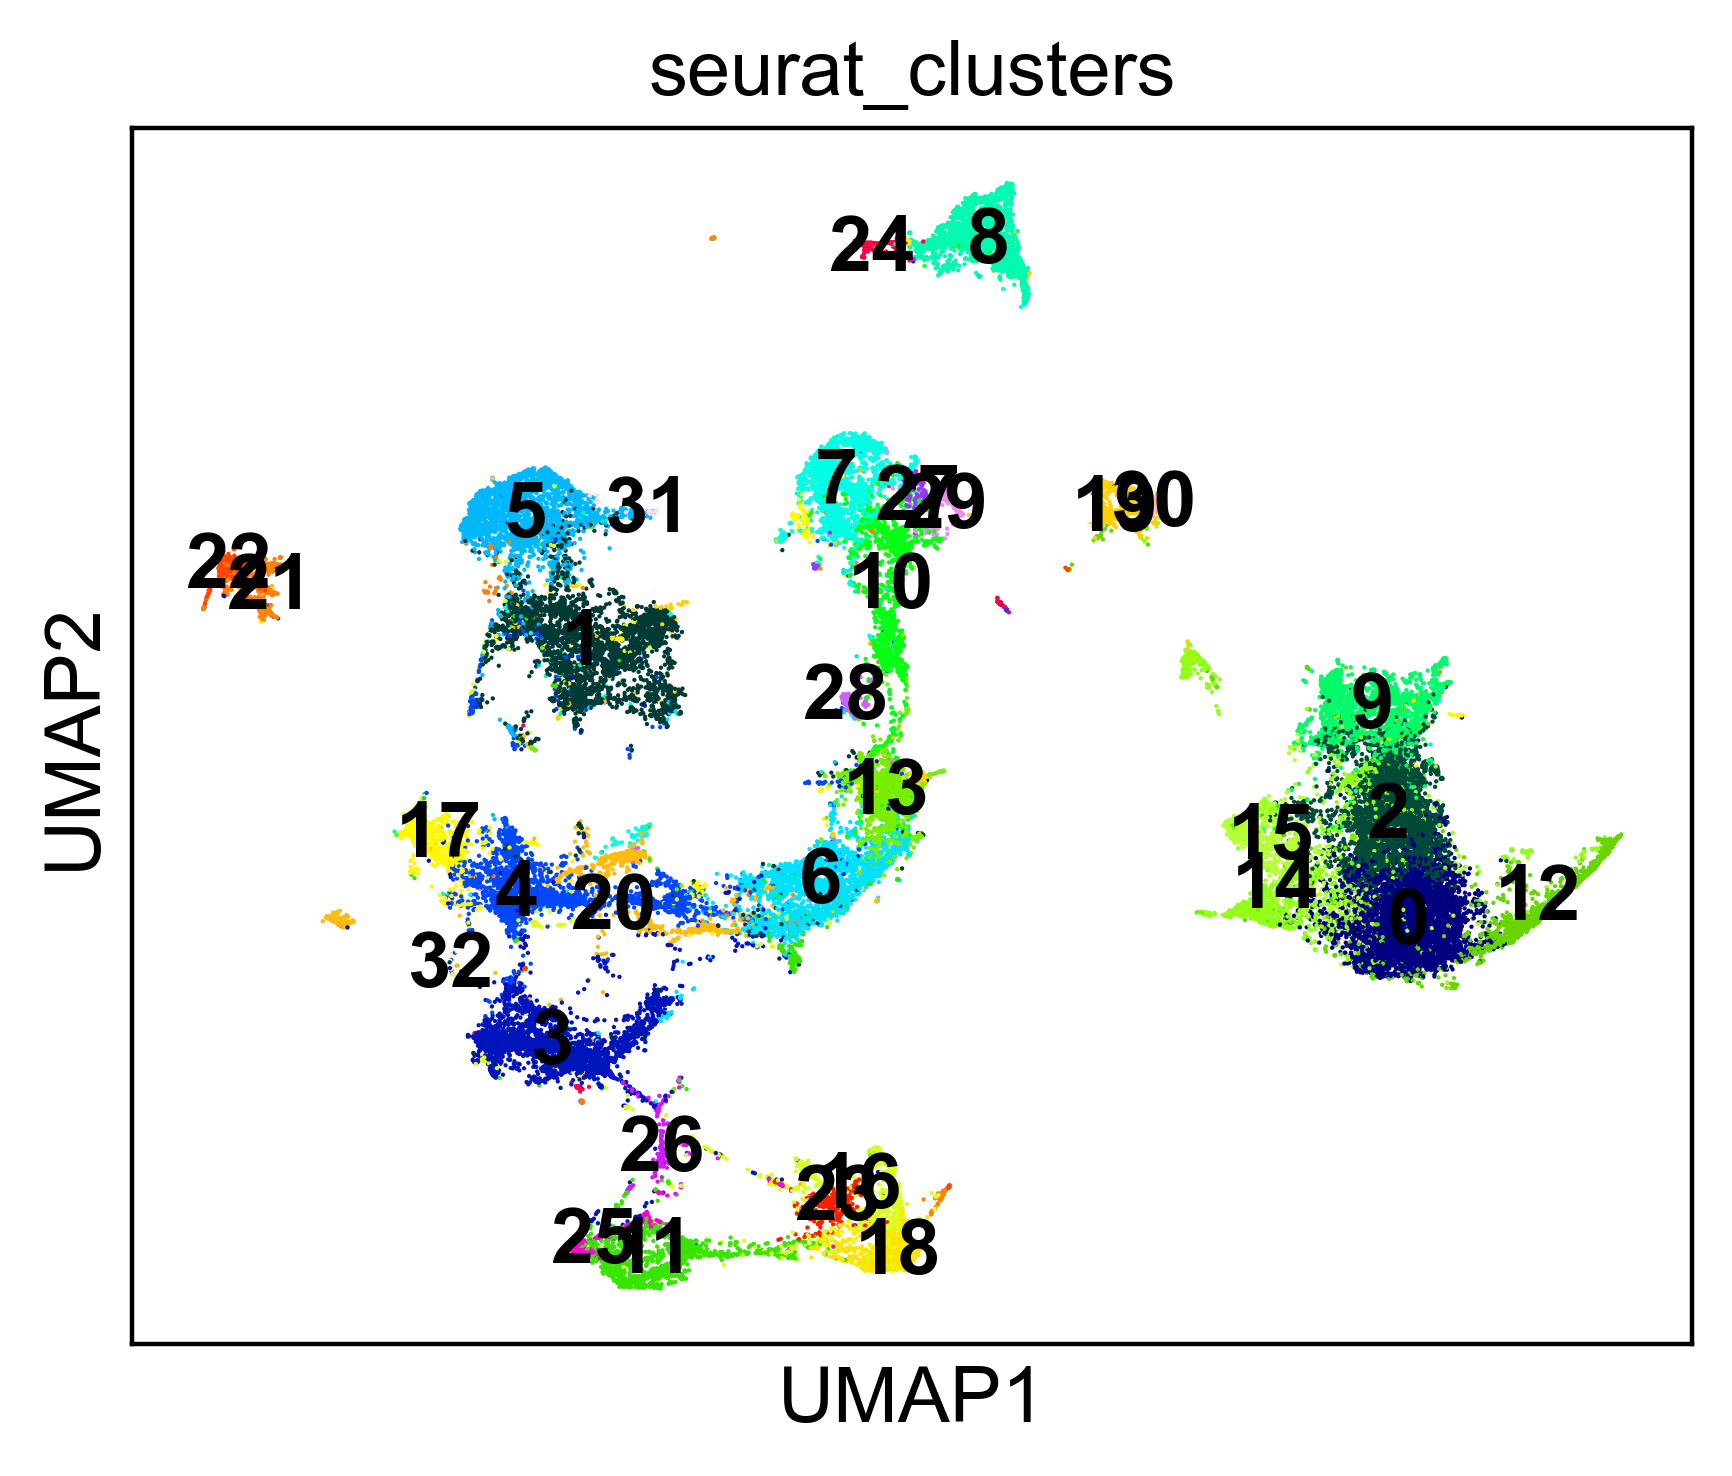

In [8]:
#Plot umap
sc.pl.umap(adata, color=['seurat_clusters'],legend_loc='on data',palette='gist_ncar')

In [9]:
#Save the number of cells per clusters in a dataframe
x=adata.obs['seurat_clusters'].value_counts()
x=pd.DataFrame(x)
x=x.sort_index()
x

seurat_clusters
0              4560
1              3733
2              3524
3              3256
4              3142
5              2974
6              2693
7              2268
8              2254
9              1999
10             1792
11             1739
12             1700
13             1669
14             1629
15             1325
16             1296
17             1224
18             1015
19              985
20              980
21              783
22              703
23              476
24              341
25              300
26              275
27              217
28              196
29              172
30              164
31               99
32               85

In [10]:
adata.obs['seurat_clusters']=adata.obs['seurat_clusters'].astype(int)

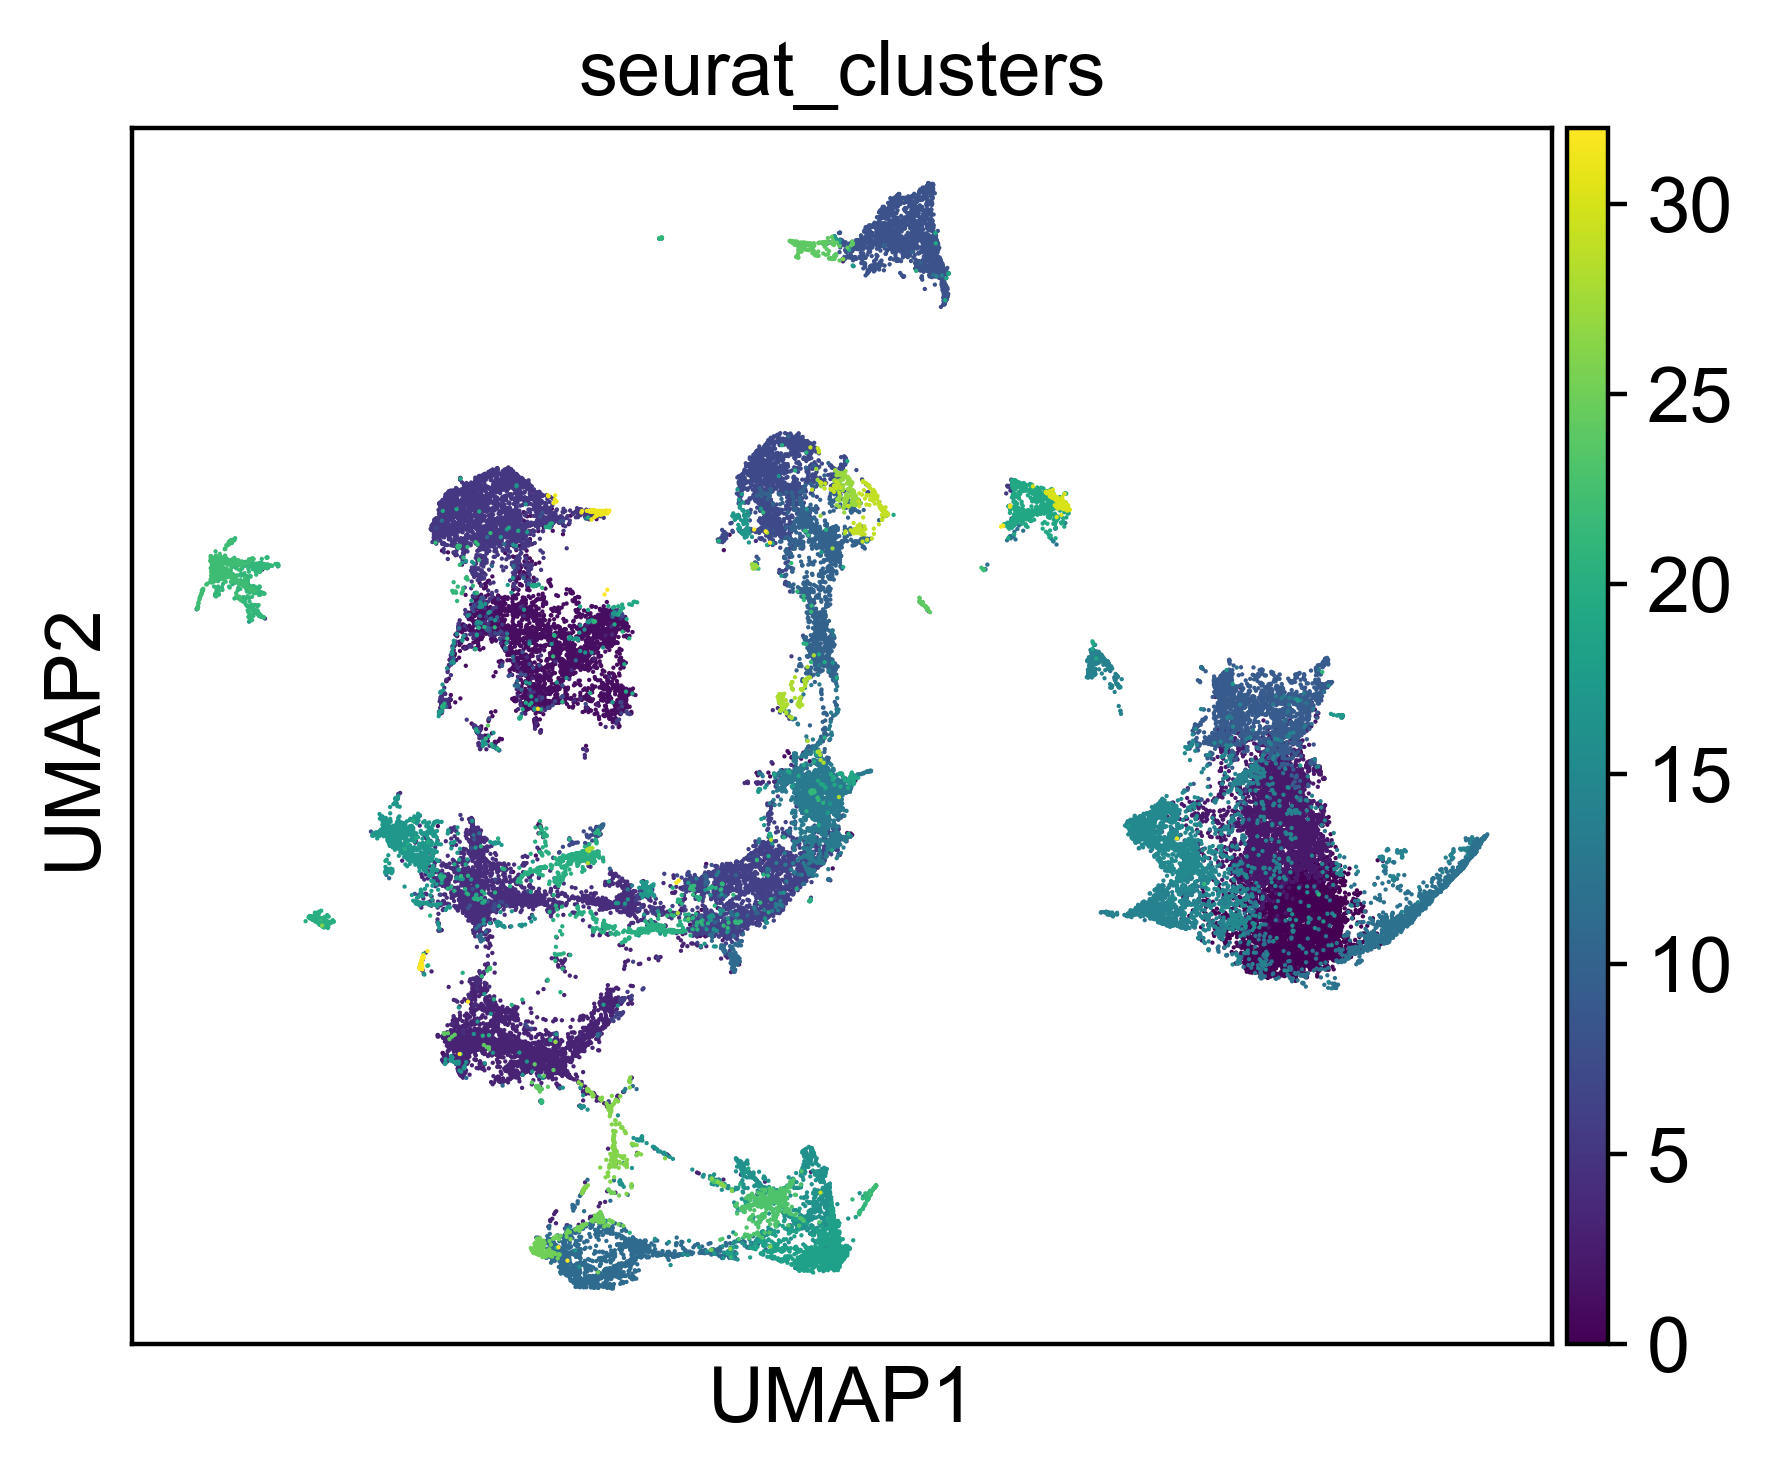

In [11]:
sc.pl.umap(adata, color=['seurat_clusters'],legend_loc='on data',palette='tab20')

In [12]:
#Obtain the matrix
df_data = anndata.AnnData.to_df(adata)
df_data

AATK  ABL1  ABL2  ACE  ACE2  ACKR1  ACKR3  ACKR4  ACTA2  ACTG2  ...  \
1-7       0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
1-53      0.0   0.0   0.0  0.0   0.0    2.0    0.0    0.0    0.0    0.0  ...   
1-59      0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
1-64      0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
1-67      0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
...       ...   ...   ...  ...   ...    ...    ...    ...    ...    ...  ...   
30-4709   0.0   2.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
30-4714   0.0   0.0   2.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
30-4716   0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
30-4725   1.0   0.0   0.0  1.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
30-4743   0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   

         NegPrb14  NegPrb15  NegPrb16  NegPrb17  NegPrb18  NegPrb19  NegPrb20  \
1-7           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1-53          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1-59          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1-64          0.0       0.0       1.0       0.0       0.0       0.0       0.0   
1-67          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...           ...       ...       ...       ...       ...       ...       ...   
30-4709       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
30-4714       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
30-4716       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
30-4725       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
30-4743       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

         NegPrb21  NegPrb22  NegPrb23  
1-7           0.0       0.0       0.0  
1-53          0.0       0.0       0.0  
1-59          0.0       0.0       0.0  
1-64          0.0       0.0       0.0  
1-67          0.0       0.0       0.0  
...           ...       ...       ...  
30-4709       0.0       0.0       0.0  
30-4714       0.0       0.0       0.0  
30-4716       0.0       0.0       0.0  
30-4725       0.0       0.0       0.0  
30-4743       0.0       0.0       0.0  

[49568 rows x 980 columns]

In [13]:
#Sum the transcripts in a cell
df_data['sum']=df_data.sum(axis=1)

In [14]:
#Save the sum in a different variable
k=df_data['sum']

In [15]:
#Save the clusters in the matrix
df_data['seurat_clusters']=adata.obs['seurat_clusters']

In [16]:
#Visualize
df_data

AATK  ABL1  ABL2  ACE  ACE2  ACKR1  ACKR3  ACKR4  ACTA2  ACTG2  ...  \
1-7       0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
1-53      0.0   0.0   0.0  0.0   0.0    2.0    0.0    0.0    0.0    0.0  ...   
1-59      0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
1-64      0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
1-67      0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
...       ...   ...   ...  ...   ...    ...    ...    ...    ...    ...  ...   
30-4709   0.0   2.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
30-4714   0.0   0.0   2.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
30-4716   0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
30-4725   1.0   0.0   0.0  1.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
30-4743   0.0   0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   

         NegPrb16  NegPrb17  NegPrb18  NegPrb19  NegPrb20  NegPrb21  NegPrb22  \
1-7           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1-53          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1-59          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1-64          1.0       0.0       0.0       0.0       0.0       0.0       0.0   
1-67          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...           ...       ...       ...       ...       ...       ...       ...   
30-4709       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
30-4714       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
30-4716       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
30-4725       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
30-4743       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

         NegPrb23    sum  seurat_clusters  
1-7           0.0  419.0                5  
1-53          0.0  359.0               26  
1-59          0.0  281.0               21  
1-64          0.0  254.0                6  
1-67          0.0  282.0               11  
...           ...    ...              ...  
30-4709       0.0  304.0                4  
30-4714       0.0  397.0                6  
30-4716       0.0  482.0               22  
30-4725       0.0  415.0                1  
30-4743       0.0  299.0               20  

[49568 rows x 982 columns]

# Cell match configuration

In [127]:
##Read the marker gene list
cm = pd.read_csv('Lung-blood-database.csv')

In [128]:
#Visualize
cm

Unnamed: 0                                           cellName cellMarker
0              0                                Natural killer cell      ITGAM
1              1                                Natural killer cell     FCGR3A
2              2                                Natural killer cell     FCGR3B
3              3                                Natural killer cell       CD19
4              4                                Natural killer cell        CD2
...          ...                                                ...        ...
4982        2712                      Multilymphoid progenitor cell     ZNF843
4983        2713                      Multilymphoid progenitor cell        ZP1
4984        2714                      Multilymphoid progenitor cell    ZSCAN30
4985        2715  Lymphoid-primed multipotent progenitor cell(LMPP)     ZSWIM1
4986        2716                      Multilymphoid progenitor cell     ZSWIM8

[4987 rows x 3 columns]

In [129]:
#Order by name
cm=cm.sort_values(by='cellName')
cm

Unnamed: 0                     cellName cellMarker
2596        2599  AXL+SIGLEC6+ dendritic cell     ATP2B4
2611        2614  AXL+SIGLEC6+ dendritic cell     ENTPD7
2612        2615  AXL+SIGLEC6+ dendritic cell      GGTA1
2613        2616  AXL+SIGLEC6+ dendritic cell       GNAQ
2614        2617  AXL+SIGLEC6+ dendritic cell     GPR146
...          ...                          ...        ...
84            86           Vascular stem cell      MKI67
83            85           Vascular stem cell        KIT
3332        3335                   γδ-T cells      TRDV2
3334        3337                   γδ-T cells      TRGC1
3333        3336                   γδ-T cells      TRGV9

[4987 rows x 3 columns]

In [130]:
#Remove duplicates
cm=cm.drop_duplicates('cellMarker')

In [131]:
#Visualize
cm

Unnamed: 0                     cellName cellMarker
2596        2599  AXL+SIGLEC6+ dendritic cell     ATP2B4
2611        2614  AXL+SIGLEC6+ dendritic cell     ENTPD7
2612        2615  AXL+SIGLEC6+ dendritic cell      GGTA1
2613        2616  AXL+SIGLEC6+ dendritic cell       GNAQ
2614        2617  AXL+SIGLEC6+ dendritic cell     GPR146
...          ...                          ...        ...
84            86           Vascular stem cell      MKI67
83            85           Vascular stem cell        KIT
3332        3335                   γδ-T cells      TRDV2
3334        3337                   γδ-T cells      TRGC1
3333        3336                   γδ-T cells      TRGV9

[4987 rows x 3 columns]

In [132]:
#Subset the marker gene list to keep only the genes that we have in the data
cm=cm[cm.cellMarker.isin(df_data.columns)]

In [133]:
#Visualize
cm

Unnamed: 0                     cellName cellMarker
2615        2618  AXL+SIGLEC6+ dendritic cell       IRF4
2623        2626  AXL+SIGLEC6+ dendritic cell      MYH11
2625        2628  AXL+SIGLEC6+ dendritic cell      NDRG1
2608        2611  AXL+SIGLEC6+ dendritic cell       CTSW
2597        2600  AXL+SIGLEC6+ dendritic cell        AXL
...          ...                          ...        ...
4108        4111               T helper cells        IL2
4124        4127               T memory cells      ITGB5
4139        4142           T regulatory cells      ITGB8
84            86           Vascular stem cell      MKI67
83            85           Vascular stem cell        KIT

[529 rows x 3 columns]

In [134]:
cm.cellName.value_counts()

CD1C-CD141- dendritic cell           40
SLC16A7+ cell                        30
Basal cell                           29
Plasmacytoid dendritic cell          24
Secretory cell                       24
                                     ..
Plasmablast                           1
Myofibroblast                         1
Naive B cells                         1
Effector CD4+ memory T (Tem) cell     1
CD8+ T cell                           1
Name: cellName, Length: 77, dtype: int64

In [135]:
#save the possible cell types
celltypes=pd.DataFrame(pd.unique(cm['cellName']),columns=['cell_types'])
celltypes=celltypes.reset_index(drop=True)
celltypes

cell_types
0   AXL+SIGLEC6+ dendritic cell
1         Activated CD4+ T cell
2           Airway goblet cells
3         Airway secretory cell
4          Alveolar macrophages
..                          ...
72                       T cell
73               T helper cells
74               T memory cells
75           T regulatory cells
76           Vascular stem cell

[77 rows x 1 columns]

In [136]:
#save the marker genes
unique_list=celltypes['cell_types'].unique()

In [137]:
#Visualize
cm

Unnamed: 0                     cellName cellMarker
2615        2618  AXL+SIGLEC6+ dendritic cell       IRF4
2623        2626  AXL+SIGLEC6+ dendritic cell      MYH11
2625        2628  AXL+SIGLEC6+ dendritic cell      NDRG1
2608        2611  AXL+SIGLEC6+ dendritic cell       CTSW
2597        2600  AXL+SIGLEC6+ dendritic cell        AXL
...          ...                          ...        ...
4108        4111               T helper cells        IL2
4124        4127               T memory cells      ITGB5
4139        4142           T regulatory cells      ITGB8
84            86           Vascular stem cell      MKI67
83            85           Vascular stem cell        KIT

[529 rows x 3 columns]

# Select clusters

In [138]:
#Count the number of cells per cluster
cl=df_data['seurat_clusters'].value_counts()
cl=pd.DataFrame(cl)

In [139]:
#Sort in cluster order
cl=cl.sort_index(ascending=True)

In [140]:
cl

seurat_clusters
0              4560
1              3733
2              3524
3              3256
4              3142
5              2974
6              2693
7              2268
8              2254
9              1999
10             1792
11             1739
12             1700
13             1669
14             1629
15             1325
16             1296
17             1224
18             1015
19              985
20              980
21              783
22              703
23              476
24              341
25              300
26              275
27              217
28              196
29              172
30              164
31               99
32               85

In [141]:
#Function for selecting cluster of interest
def select_cluster(data,c,markers):
    z=data['seurat_clusters']
    data=pd.DataFrame(columns=markers)
    for j in markers:
        a=df_data[j]
        data[j]=a
    data['seurat_clusters']=z
    data['sum']=k
    selected=data[data['seurat_clusters']==c]
    return selected

In [142]:
#Function for selecting cells that are not in the cluster of interest
def select_not_cluster(data,c,markers):
    #lon=cl.loc[x,'seurat_clusters']
    z=data['seurat_clusters']
    data=pd.DataFrame(columns=markers)
    for j in markers:
        a=df_data[j]
        data[j]=a
    data['seurat_clusters']=z
    data['sum']=k
    sel=data[data['seurat_clusters']!=c]
    #sel=sel.sample(n=lon)
    return sel

In [143]:
#Save the cluster numbers
clusters=df_data['seurat_clusters'].unique()

In [144]:
clusters=pd.DataFrame(clusters,columns=['clust'])
clusters

clust
0       5
1      26
2      21
3       6
4      11
5       8
6      16
7       7
8      25
9       3
10     10
11      1
12     24
13     23
14     12
15     18
16     17
17     14
18     22
19      4
20     20
21      0
22     19
23     27
24     31
25     28
26     13
27      9
28      2
29     15
30     32
31     29
32     30

In [145]:
clusters=clusters.sort_values(by='clust',ascending=True)
clusters

clust
21      0
11      1
28      2
9       3
19      4
0       5
3       6
7       7
5       8
27      9
10     10
4      11
14     12
26     13
17     14
29     15
6      16
16     17
15     18
22     19
20     20
2      21
18     22
13     23
12     24
8      25
1      26
23     27
25     28
31     29
32     30
24     31
30     32

In [146]:
#Create an empty dataset to save the AUC scores for each cell type and each cluster
auc=pd.DataFrame(index=clusters.clust,columns=unique_list)
auc

AXL+SIGLEC6+ dendritic cell Activated CD4+ T cell Airway goblet cells  \
clust                                                                         
0                             NaN                   NaN                 NaN   
1                             NaN                   NaN                 NaN   
2                             NaN                   NaN                 NaN   
3                             NaN                   NaN                 NaN   
4                             NaN                   NaN                 NaN   
5                             NaN                   NaN                 NaN   
6                             NaN                   NaN                 NaN   
7                             NaN                   NaN                 NaN   
8                             NaN                   NaN                 NaN   
9                             NaN                   NaN                 NaN   
10                            NaN                   NaN                 NaN   
11                            NaN                   NaN                 NaN   
12                            NaN                   NaN                 NaN   
13                            NaN                   NaN                 NaN   
14                            NaN                   NaN                 NaN   
15                            NaN                   NaN                 NaN   
16                            NaN                   NaN                 NaN   
17                            NaN                   NaN                 NaN   
18                            NaN                   NaN                 NaN   
19                            NaN                   NaN                 NaN   
20                            NaN                   NaN                 NaN   
21                            NaN                   NaN                 NaN   
22                            NaN                   NaN                 NaN   
23                            NaN                   NaN                 NaN   
24                            NaN                   NaN                 NaN   
25                            NaN                   NaN                 NaN   
26                            NaN                   NaN                 NaN   
27                            NaN                   NaN                 NaN   
28                            NaN                   NaN                 NaN   
29                            NaN                   NaN                 NaN   
30                            NaN                   NaN                 NaN   
31                            NaN                   NaN                 NaN   
32                            NaN                   NaN                 NaN   

      Airway secretory cell Alveolar macrophages Angiogenic T cell B cell  \
clust                                                                       
0                       NaN                  NaN               NaN    NaN   
1                       NaN                  NaN               NaN    NaN   
2                       NaN                  NaN               NaN    NaN   
3                       NaN                  NaN               NaN    NaN   
4                       NaN                  NaN               NaN    NaN   
5                       NaN                  NaN               NaN    NaN   
6                       NaN                  NaN               NaN    NaN   
7                       NaN                  NaN               NaN    NaN   
8                       NaN                  NaN               NaN    NaN   
9                       NaN                  NaN               NaN    NaN   
10                      NaN                  NaN               NaN    NaN   
11                      NaN                  NaN               NaN    NaN   
12                      NaN                  NaN               NaN    NaN   
13                      NaN                  NaN               NaN    NaN   
14      

In [147]:
#load required libraries
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import top_k_accuracy_score
from sklearn import preprocessing

In [148]:
#Make sure the clusters are saved as int
adata.obs['seurat_clusters']=adata.obs['seurat_clusters'].astype(int)
clusters.clust=clusters.clust.astype(int)

In [149]:
#Defining the cell type
for x in clusters.clust:
    print('Cluster: ',x)
    for y in unique_list:
        #Create the meta-gene dataframe
        print('Cell type: ', y)
        a=cm[cm['cellName']==y]
        b=list(a['cellMarker'])
        b=adata.var.features[adata.var.features.isin(b)]
        b=list(b)
        c=len(b)
        d=pd.DataFrame(columns=b)
        
        #Selecting cells that belong to the clusters and cells that do not belong to that cluster and label them
        ct=select_cluster(df_data,x,b)
        ctn=select_not_cluster(df_data,x,b)
        ct['label']=1
        ctn['label']=0
        ct=pd.concat([ct,ctn])
        for z in b:
            if z in ct.columns:
                d[y] =ct.loc[:,z]
        d=d.dropna(axis=1, how='all')
        #Calculate score
        d['sum']=d.sum(axis=1)
        d['sumall']=ct['sum']
        print('Calculating score')
        d['score']=np.log(d['sum']/d['sumall']*10e4+1)
        d['score']=d['score'].fillna(0)
        d['label']=ct['label']
        #Calculate AUC
        d=d.sort_values('score')
        print('Calculating roc')
        a = metrics.roc_auc_score(d['label'], d['score'])
        print('Score: ',a)
        auc.loc[x,y]=a
        print(' ')
    print(' ')
    print(' ')
    

Cluster:  0
Cell type:  AXL+SIGLEC6+ dendritic cell
Calculating score
Calculating roc
Score:  0.49967079195667363
 
Cell type:  Activated CD4+ T cell
Calculating score
Calculating roc
Score:  0.6750709084466855
 
Cell type:  Airway goblet cells
Calculating score
Calculating roc
Score:  0.6254103315356022
 
Cell type:  Airway secretory cell
Calculating score
Calculating roc
Score:  0.711823758135006
 
Cell type:  Alveolar macrophages
Calculating score
Calculating roc
Score:  0.48942778593747077
 
Cell type:  Angiogenic T cell
Calculating score
Calculating roc
Score:  0.3867887034507706
 
Cell type:  B cell
Calculating score
Calculating roc
Score:  0.49611347115288656
 
Cell type:  B cells memory
Calculating score
Calculating roc
Score:  0.5002337425588277
 
Cell type:  B cells naive
Calculating score
Calculating roc
Score:  0.4837933538910821
 
Cell type:  Basal cell
Calculating score
Calculating roc
Score:  0.441699377712968
 
Cell type:  Basophil
Calculating score
Calculating roc
Scor

Calculating score
Calculating roc
Score:  0.4662858870982
 
Cell type:  CD141+CLEC9A+ dendritic cell
Calculating score
Calculating roc
Score:  0.4141167357691876
 
Cell type:  CD1C+_A dendritic cell
Calculating score
Calculating roc
Score:  0.5168007654846695
 
Cell type:  CD1C+_B dendritic cell
Calculating score
Calculating roc
Score:  0.5878104561631361
 
Cell type:  CD1C-CD141- dendritic cell
Calculating score
Calculating roc
Score:  0.6798948119004181
 
Cell type:  CD8+ NKT-like cells
Calculating score
Calculating roc
Score:  0.4952251450165225
 
Cell type:  CD8+ T cell
Calculating score
Calculating roc
Score:  0.5033570520237176
 
Cell type:  Cancer cell
Calculating score
Calculating roc
Score:  0.3298158341815357
 
Cell type:  Cancer stem cell
Calculating score
Calculating roc
Score:  0.48256559513560493
 
Cell type:  Ciliated cell
Calculating score
Calculating roc
Score:  0.4114375014373732
 
Cell type:  Circulating fetal cell
Calculating score
Calculating roc
Score:  0.45271006

Calculating score
Calculating roc
Score:  0.5603754806757903
 
Cell type:  Clara cell
Calculating score
Calculating roc
Score:  0.6343366190913868
 
Cell type:  Dendritic cell
Calculating score
Calculating roc
Score:  0.5114023959316021
 
Cell type:  Effector CD4+ memory T (Tem) cell
Calculating score
Calculating roc
Score:  0.47368658424833926
 
Cell type:  Effector CD8+ memory T (Tem) cell
Calculating score
Calculating roc
Score:  0.3766729574711688
 
Cell type:  Endothelial cell
Calculating score
Calculating roc
Score:  0.46579444231451717
 
Cell type:  Endothelial progenitor cell
Calculating score
Calculating roc
Score:  0.4010621601299098
 
Cell type:  Eosinophil
Calculating score
Calculating roc
Score:  0.5939757932524887
 
Cell type:  FOXN4+ cell
Calculating score
Calculating roc
Score:  0.5364412603263266
 
Cell type:  FOXP3+ natural regulatory T (Treg) cell
Calculating score
Calculating roc
Score:  0.4539827656830445
 
Cell type:  Fibroblast
Calculating score
Calculating roc
S

Calculating score
Calculating roc
Score:  0.48348453754854903
 
Cell type:  Granulocyte
Calculating score
Calculating roc
Score:  0.4945238460863461
 
Cell type:  Granulocyte-monocyte progenitor
Calculating score
Calculating roc
Score:  0.49138933032146453
 
Cell type:  ISG expressing immune cells
Calculating score
Calculating roc
Score:  0.4811242976013985
 
Cell type:  Idiopathic pulmonary fibrosis cell
Calculating score
Calculating roc
Score:  0.49298642900328205
 
Cell type:  Immature transitional B cell
Calculating score
Calculating roc
Score:  0.49560537984434594
 
Cell type:  Immune system cells
Calculating score
Calculating roc
Score:  0.5152426551213583
 
Cell type:  Ionocyte cell
Calculating score
Calculating roc
Score:  0.500785950850189
 
Cell type:  Lymphocyte
Calculating score
Calculating roc
Score:  0.5057247614778599
 
Cell type:  Lymphoid cell
Calculating score
Calculating roc
Score:  0.5064925979564734
 
Cell type:  Lymphoid-primed multipotent progenitor cell(LMPP)
Ca

Calculating roc
Score:  0.5271231929484408
 
Cell type:  M1 macrophage
Calculating score
Calculating roc
Score:  0.4949223246604255
 
Cell type:  Macrophage
Calculating score
Calculating roc
Score:  0.5060422672736306
 
Cell type:  Mast cells
Calculating score
Calculating roc
Score:  0.4800156874770807
 
Cell type:  Megakaryocyte
Calculating score
Calculating roc
Score:  0.5114826136323719
 
Cell type:  Memory B cell
Calculating score
Calculating roc
Score:  0.5726070595552664
 
Cell type:  Mesothelial cells
Calculating score
Calculating roc
Score:  0.49655875226635976
 
Cell type:  Monocyte
Calculating score
Calculating roc
Score:  0.5030464831776944
 
Cell type:  Multilymphoid progenitor cell
Calculating score
Calculating roc
Score:  0.4732974301615436
 
Cell type:  Myeloid cell
Calculating score
Calculating roc
Score:  0.48887866231369126
 
Cell type:  Myofibroblast
Calculating score
Calculating roc
Score:  0.5184411937131191
 
Cell type:  NK cells
Calculating score
Calculating roc


Calculating score
Calculating roc
Score:  0.496610697730043
 
Cell type:  Naive B cells
Calculating score
Calculating roc
Score:  0.4143180352108856
 
Cell type:  Naive CD4+ T cell
Calculating score
Calculating roc
Score:  0.47639415547989866
 
Cell type:  Natural killer T cells
Calculating score
Calculating roc
Score:  0.5016915137440886
 
Cell type:  Natural killer cell
Calculating score
Calculating roc
Score:  0.4987955810756796
 
Cell type:  Neutrophil
Calculating score
Calculating roc
Score:  0.488330222908249
 
Cell type:  Non-classical monocytes
Calculating score
Calculating roc
Score:  0.7009482808165972
 
Cell type:  Nuocytes
Calculating score
Calculating roc
Score:  0.46334548156103234
 
Cell type:  Plasma cells
Calculating score
Calculating roc
Score:  0.46508741727210795
 
Cell type:  Plasmablast
Calculating score
Calculating roc
Score:  0.49841084927161583
 
Cell type:  Plasmacytoid dendritic cell
Calculating score
Calculating roc
Score:  0.3963805846315577
 
Cell type:  P

Calculating roc
Score:  0.5084772392622849
 
Cell type:  Pulmonary alveolar type II cells
Calculating score
Calculating roc
Score:  0.46066219284564924
 
Cell type:  Red pulp macrophages
Calculating score
Calculating roc
Score:  0.3580039113751701
 
Cell type:  Regulatory T (Treg) cell
Calculating score
Calculating roc
Score:  0.47265145884391635
 
Cell type:  SLC16A7+ cell
Calculating score
Calculating roc
Score:  0.5327774308701572
 
Cell type:  Secretory cell
Calculating score
Calculating roc
Score:  0.44267667582621617
 
Cell type:  T cell
Calculating score
Calculating roc
Score:  0.4852020457977472
 
Cell type:  T helper cells
Calculating score
Calculating roc
Score:  0.4684580962990469
 
Cell type:  T memory cells
Calculating score
Calculating roc
Score:  0.6102031320708009
 
Cell type:  T regulatory cells
Calculating score
Calculating roc
Score:  0.4399550835499443
 
Cell type:  Vascular stem cell
Calculating score
Calculating roc
Score:  0.4838048669389776
 
 
 
Cluster:  7
Cel

Calculating score
Calculating roc
Score:  0.49647670930289994
 
Cell type:  Activated CD4+ T cell
Calculating score
Calculating roc
Score:  0.44424911761139374
 
Cell type:  Airway goblet cells
Calculating score
Calculating roc
Score:  0.4490156410912405
 
Cell type:  Airway secretory cell
Calculating score
Calculating roc
Score:  0.5772534633258167
 
Cell type:  Alveolar macrophages
Calculating score
Calculating roc
Score:  0.4968414495556672
 
Cell type:  Angiogenic T cell
Calculating score
Calculating roc
Score:  0.3671207600610005
 
Cell type:  B cell
Calculating score
Calculating roc
Score:  0.5045162931753233
 
Cell type:  B cells memory
Calculating score
Calculating roc
Score:  0.4912598959868595
 
Cell type:  B cells naive
Calculating score
Calculating roc
Score:  0.4858251274434212
 
Cell type:  Basal cell
Calculating score
Calculating roc
Score:  0.3435159435692875
 
Cell type:  Basophil
Calculating score
Calculating roc
Score:  0.49919686443031075
 
Cell type:  Brush cell (T

Calculating score
Calculating roc
Score:  0.5166347389886159
 
Cell type:  CD141+CLEC9A+ dendritic cell
Calculating score
Calculating roc
Score:  0.6109671802833663
 
Cell type:  CD1C+_A dendritic cell
Calculating score
Calculating roc
Score:  0.4866578005099167
 
Cell type:  CD1C+_B dendritic cell
Calculating score
Calculating roc
Score:  0.43881456379138717
 
Cell type:  CD1C-CD141- dendritic cell
Calculating score
Calculating roc
Score:  0.43130608483623345
 
Cell type:  CD8+ NKT-like cells
Calculating score
Calculating roc
Score:  0.49011031930226495
 
Cell type:  CD8+ T cell
Calculating score
Calculating roc
Score:  0.48624017173715406
 
Cell type:  Cancer cell
Calculating score
Calculating roc
Score:  0.8072108433287046
 
Cell type:  Cancer stem cell
Calculating score
Calculating roc
Score:  0.4855281863219234
 
Cell type:  Ciliated cell
Calculating score
Calculating roc
Score:  0.6543120095859069
 
Cell type:  Circulating fetal cell
Calculating score
Calculating roc
Score:  0.54

Calculating score
Calculating roc
Score:  0.4690279958351025
 
Cell type:  Clara cell
Calculating score
Calculating roc
Score:  0.45411846966461045
 
Cell type:  Dendritic cell
Calculating score
Calculating roc
Score:  0.4953775111139933
 
Cell type:  Effector CD4+ memory T (Tem) cell
Calculating score
Calculating roc
Score:  0.47788247358581115
 
Cell type:  Effector CD8+ memory T (Tem) cell
Calculating score
Calculating roc
Score:  0.6788387544964296
 
Cell type:  Endothelial cell
Calculating score
Calculating roc
Score:  0.6961962862592396
 
Cell type:  Endothelial progenitor cell
Calculating score
Calculating roc
Score:  0.4218044746390896
 
Cell type:  Eosinophil
Calculating score
Calculating roc
Score:  0.4420425726025769
 
Cell type:  FOXN4+ cell
Calculating score
Calculating roc
Score:  0.4927721958892241
 
Cell type:  FOXP3+ natural regulatory T (Treg) cell
Calculating score
Calculating roc
Score:  0.46204488132116545
 
Cell type:  Fibroblast
Calculating score
Calculating roc


Calculating score
Calculating roc
Score:  0.453980108429937
 
Cell type:  Granulocyte
Calculating score
Calculating roc
Score:  0.4775673546420663
 
Cell type:  Granulocyte-monocyte progenitor
Calculating score
Calculating roc
Score:  0.49439418011965686
 
Cell type:  ISG expressing immune cells
Calculating score
Calculating roc
Score:  0.4893598385786647
 
Cell type:  Idiopathic pulmonary fibrosis cell
Calculating score
Calculating roc
Score:  0.48604720590825345
 
Cell type:  Immature transitional B cell
Calculating score
Calculating roc
Score:  0.5850113840601229
 
Cell type:  Immune system cells
Calculating score
Calculating roc
Score:  0.5169170212489431
 
Cell type:  Ionocyte cell
Calculating score
Calculating roc
Score:  0.49189574402800773
 
Cell type:  Lymphocyte
Calculating score
Calculating roc
Score:  0.4976383423931271
 
Cell type:  Lymphoid cell
Calculating score
Calculating roc
Score:  0.4884494888832148
 
Cell type:  Lymphoid-primed multipotent progenitor cell(LMPP)
Cal

Calculating roc
Score:  0.48743423704402794
 
Cell type:  M1 macrophage
Calculating score
Calculating roc
Score:  0.5071525186911064
 
Cell type:  Macrophage
Calculating score
Calculating roc
Score:  0.4995963224848726
 
Cell type:  Mast cells
Calculating score
Calculating roc
Score:  0.4790767441346055
 
Cell type:  Megakaryocyte
Calculating score
Calculating roc
Score:  0.46710716111463385
 
Cell type:  Memory B cell
Calculating score
Calculating roc
Score:  0.4659215784584077
 
Cell type:  Mesothelial cells
Calculating score
Calculating roc
Score:  0.49924855239162597
 
Cell type:  Monocyte
Calculating score
Calculating roc
Score:  0.4455883090262928
 
Cell type:  Multilymphoid progenitor cell
Calculating score
Calculating roc
Score:  0.5156010769813064
 
Cell type:  Myeloid cell
Calculating score
Calculating roc
Score:  0.5019631867537689
 
Cell type:  Myofibroblast
Calculating score
Calculating roc
Score:  0.350803803597147
 
Cell type:  NK cells
Calculating score
Calculating roc


Calculating score
Calculating roc
Score:  0.5018572007498652
 
Cell type:  Naive B cells
Calculating score
Calculating roc
Score:  0.41065704948290244
 
Cell type:  Naive CD4+ T cell
Calculating score
Calculating roc
Score:  0.4638892844116236
 
Cell type:  Natural killer T cells
Calculating score
Calculating roc
Score:  0.4979597323012068
 
Cell type:  Natural killer cell
Calculating score
Calculating roc
Score:  0.49859612605318376
 
Cell type:  Neutrophil
Calculating score
Calculating roc
Score:  0.4840648758245064
 
Cell type:  Non-classical monocytes
Calculating score
Calculating roc
Score:  0.474016339128602
 
Cell type:  Nuocytes
Calculating score
Calculating roc
Score:  0.46569386044989736
 
Cell type:  Plasma cells
Calculating score
Calculating roc
Score:  0.4865963408550728
 
Cell type:  Plasmablast
Calculating score
Calculating roc
Score:  0.49012247172628853
 
Cell type:  Plasmacytoid dendritic cell
Calculating score
Calculating roc
Score:  0.80214979764879
 
Cell type:  Pl

Calculating roc
Score:  0.6243658636626035
 
Cell type:  Pulmonary alveolar type II cells
Calculating score
Calculating roc
Score:  0.5028285703423157
 
Cell type:  Red pulp macrophages
Calculating score
Calculating roc
Score:  0.6304259937150791
 
Cell type:  Regulatory T (Treg) cell
Calculating score
Calculating roc
Score:  0.5223463850257523
 
Cell type:  SLC16A7+ cell
Calculating score
Calculating roc
Score:  0.49290701321101604
 
Cell type:  Secretory cell
Calculating score
Calculating roc
Score:  0.5258324309754656
 
Cell type:  T cell
Calculating score
Calculating roc
Score:  0.49750523195972235
 
Cell type:  T helper cells
Calculating score
Calculating roc
Score:  0.5389258558851729
 
Cell type:  T memory cells
Calculating score
Calculating roc
Score:  0.6276198070468391
 
Cell type:  T regulatory cells
Calculating score
Calculating roc
Score:  0.6722058192660969
 
Cell type:  Vascular stem cell
Calculating score
Calculating roc
Score:  0.49838685163520746
 
 
 
Cluster:  15
Ce

Calculating score
Calculating roc
Score:  0.5023593956520049
 
Cell type:  Activated CD4+ T cell
Calculating score
Calculating roc
Score:  0.407182329326205
 
Cell type:  Airway goblet cells
Calculating score
Calculating roc
Score:  0.4450892921080953
 
Cell type:  Airway secretory cell
Calculating score
Calculating roc
Score:  0.4021020639984532
 
Cell type:  Alveolar macrophages
Calculating score
Calculating roc
Score:  0.49741999394122605
 
Cell type:  Angiogenic T cell
Calculating score
Calculating roc
Score:  0.5402268047294754
 
Cell type:  B cell
Calculating score
Calculating roc
Score:  0.4933493910663647
 
Cell type:  B cells memory
Calculating score
Calculating roc
Score:  0.49652512434680846
 
Cell type:  B cells naive
Calculating score
Calculating roc
Score:  0.5008246975344447
 
Cell type:  Basal cell
Calculating score
Calculating roc
Score:  0.557747529304108
 
Cell type:  Basophil
Calculating score
Calculating roc
Score:  0.4829405967777246
 
Cell type:  Brush cell (Tuft

Calculating score
Calculating roc
Score:  0.45994219903058586
 
Cell type:  CD141+CLEC9A+ dendritic cell
Calculating score
Calculating roc
Score:  0.4130035214000101
 
Cell type:  CD1C+_A dendritic cell
Calculating score
Calculating roc
Score:  0.4834491985676725
 
Cell type:  CD1C+_B dendritic cell
Calculating score
Calculating roc
Score:  0.47691605618611277
 
Cell type:  CD1C-CD141- dendritic cell
Calculating score
Calculating roc
Score:  0.5183645830291409
 
Cell type:  CD8+ NKT-like cells
Calculating score
Calculating roc
Score:  0.6761785127339038
 
Cell type:  CD8+ T cell
Calculating score
Calculating roc
Score:  0.6294550259496485
 
Cell type:  Cancer cell
Calculating score
Calculating roc
Score:  0.3593627140028056
 
Cell type:  Cancer stem cell
Calculating score
Calculating roc
Score:  0.4932382823019991
 
Cell type:  Ciliated cell
Calculating score
Calculating roc
Score:  0.4449933851650318
 
Cell type:  Circulating fetal cell
Calculating score
Calculating roc
Score:  0.4697

Calculating score
Calculating roc
Score:  0.4482456782030586
 
Cell type:  Clara cell
Calculating score
Calculating roc
Score:  0.4108159596861243
 
Cell type:  Dendritic cell
Calculating score
Calculating roc
Score:  0.4890857170047987
 
Cell type:  Effector CD4+ memory T (Tem) cell
Calculating score
Calculating roc
Score:  0.4728061630685639
 
Cell type:  Effector CD8+ memory T (Tem) cell
Calculating score
Calculating roc
Score:  0.4443116500895522
 
Cell type:  Endothelial cell
Calculating score
Calculating roc
Score:  0.4660267145983076
 
Cell type:  Endothelial progenitor cell
Calculating score
Calculating roc
Score:  0.4640989852235012
 
Cell type:  Eosinophil
Calculating score
Calculating roc
Score:  0.579191009489503
 
Cell type:  FOXN4+ cell
Calculating score
Calculating roc
Score:  0.47659302581232904
 
Cell type:  FOXP3+ natural regulatory T (Treg) cell
Calculating score
Calculating roc
Score:  0.4745353789911568
 
Cell type:  Fibroblast
Calculating score
Calculating roc
Sco

Calculating roc
Score:  0.42268217319442125
 
Cell type:  Gamma delta T cells
Calculating score
Calculating roc
Score:  0.4943847730990692
 
Cell type:  Granulocyte
Calculating score
Calculating roc
Score:  0.4911042079748185
 
Cell type:  Granulocyte-monocyte progenitor
Calculating score
Calculating roc
Score:  0.5207101646447113
 
Cell type:  ISG expressing immune cells
Calculating score
Calculating roc
Score:  0.5143225612853026
 
Cell type:  Idiopathic pulmonary fibrosis cell
Calculating score
Calculating roc
Score:  0.5040243652314721
 
Cell type:  Immature transitional B cell
Calculating score
Calculating roc
Score:  0.4896575132138198
 
Cell type:  Immune system cells
Calculating score
Calculating roc
Score:  0.4988088833479907
 
Cell type:  Ionocyte cell
Calculating score
Calculating roc
Score:  0.4939591683122013
 
Cell type:  Lymphocyte
Calculating score
Calculating roc
Score:  0.5401528348942012
 
Cell type:  Lymphoid cell
Calculating score
Calculating roc
Score:  0.51164853

Calculating roc
Score:  0.4811195613093348
 
Cell type:  M1 macrophage
Calculating score
Calculating roc
Score:  0.4947158889488124
 
Cell type:  Macrophage
Calculating score
Calculating roc
Score:  0.49672584395575964
 
Cell type:  Mast cells
Calculating score
Calculating roc
Score:  0.48045309751462945
 
Cell type:  Megakaryocyte
Calculating score
Calculating roc
Score:  0.5242364999840391
 
Cell type:  Memory B cell
Calculating score
Calculating roc
Score:  0.5189882485471343
 
Cell type:  Mesothelial cells
Calculating score
Calculating roc
Score:  0.4958484962273376
 
Cell type:  Monocyte
Calculating score
Calculating roc
Score:  0.4867727691224675
 
Cell type:  Multilymphoid progenitor cell
Calculating score
Calculating roc
Score:  0.4795031695068741
 
Cell type:  Myeloid cell
Calculating score
Calculating roc
Score:  0.4818521160007595
 
Cell type:  Myofibroblast
Calculating score
Calculating roc
Score:  0.6341226333704635
 
Cell type:  NK cells
Calculating score
Calculating roc


Calculating score
Calculating roc
Score:  0.5076571282418191
 
Cell type:  Naive B cells
Calculating score
Calculating roc
Score:  0.49801845117321536
 
Cell type:  Naive CD4+ T cell
Calculating score
Calculating roc
Score:  0.5085423033873836
 
Cell type:  Natural killer T cells
Calculating score
Calculating roc
Score:  0.497873432978203
 
Cell type:  Natural killer cell
Calculating score
Calculating roc
Score:  0.500129232298886
 
Cell type:  Neutrophil
Calculating score
Calculating roc
Score:  0.5071688780665183
 
Cell type:  Non-classical monocytes
Calculating score
Calculating roc
Score:  0.534342426454544
 
Cell type:  Nuocytes
Calculating score
Calculating roc
Score:  0.4863269400454021
 
Cell type:  Plasma cells
Calculating score
Calculating roc
Score:  0.5586060818109958
 
Cell type:  Plasmablast
Calculating score
Calculating roc
Score:  0.5122521591401582
 
Cell type:  Plasmacytoid dendritic cell
Calculating score
Calculating roc
Score:  0.5033539924376919
 
Cell type:  Plate

Calculating roc
Score:  0.4456354990867369
 
Cell type:  Pulmonary alveolar type II cells
Calculating score
Calculating roc
Score:  0.5104750379853106
 
Cell type:  Red pulp macrophages
Calculating score
Calculating roc
Score:  0.3804786432967188
 
Cell type:  Regulatory T (Treg) cell
Calculating score
Calculating roc
Score:  0.5175122215981296
 
Cell type:  SLC16A7+ cell
Calculating score
Calculating roc
Score:  0.48244666009452986
 
Cell type:  Secretory cell
Calculating score
Calculating roc
Score:  0.42468444792086185
 
Cell type:  T cell
Calculating score
Calculating roc
Score:  0.5072169979734861
 
Cell type:  T helper cells
Calculating score
Calculating roc
Score:  0.474057375539978
 
Cell type:  T memory cells
Calculating score
Calculating roc
Score:  0.4113179996736735
 
Cell type:  T regulatory cells
Calculating score
Calculating roc
Score:  0.4562713860683024
 
Cell type:  Vascular stem cell
Calculating score
Calculating roc
Score:  0.4921107286178616
 
 
 
Cluster:  23
Cell

Calculating score
Calculating roc
Score:  0.5028617499861644
 
Cell type:  Activated CD4+ T cell
Calculating score
Calculating roc
Score:  0.44595817913863284
 
Cell type:  Airway goblet cells
Calculating score
Calculating roc
Score:  0.47993826195206635
 
Cell type:  Airway secretory cell
Calculating score
Calculating roc
Score:  0.42812249816175674
 
Cell type:  Alveolar macrophages
Calculating score
Calculating roc
Score:  0.4911361615383208
 
Cell type:  Angiogenic T cell
Calculating score
Calculating roc
Score:  0.6352808853020184
 
Cell type:  B cell
Calculating score
Calculating roc
Score:  0.5043134305036211
 
Cell type:  B cells memory
Calculating score
Calculating roc
Score:  0.5258935101478238
 
Cell type:  B cells naive
Calculating score
Calculating roc
Score:  0.4988969050970824
 
Cell type:  Basal cell
Calculating score
Calculating roc
Score:  0.3807995361961615
 
Cell type:  Basophil
Calculating score
Calculating roc
Score:  0.4736925537430374
 
Cell type:  Brush cell (T

Calculating score
Calculating roc
Score:  0.46622425644772814
 
Cell type:  CD141+CLEC9A+ dendritic cell
Calculating score
Calculating roc
Score:  0.41853468106411196
 
Cell type:  CD1C+_A dendritic cell
Calculating score
Calculating roc
Score:  0.48013020621904684
 
Cell type:  CD1C+_B dendritic cell
Calculating score
Calculating roc
Score:  0.45898203025628537
 
Cell type:  CD1C-CD141- dendritic cell
Calculating score
Calculating roc
Score:  0.45906176422830236
 
Cell type:  CD8+ NKT-like cells
Calculating score
Calculating roc
Score:  0.48984787285865067
 
Cell type:  CD8+ T cell
Calculating score
Calculating roc
Score:  0.49136342724148196
 
Cell type:  Cancer cell
Calculating score
Calculating roc
Score:  0.33319341831073584
 
Cell type:  Cancer stem cell
Calculating score
Calculating roc
Score:  0.4957024167140267
 
Cell type:  Ciliated cell
Calculating score
Calculating roc
Score:  0.44707355687261513
 
Cell type:  Circulating fetal cell
Calculating score
Calculating roc
Score: 

Calculating score
Calculating roc
Score:  0.45343631679216845
 
Cell type:  Clara cell
Calculating score
Calculating roc
Score:  0.42029441761046654
 
Cell type:  Dendritic cell
Calculating score
Calculating roc
Score:  0.4847292719047329
 
Cell type:  Effector CD4+ memory T (Tem) cell
Calculating score
Calculating roc
Score:  0.4854655741272502
 
Cell type:  Effector CD8+ memory T (Tem) cell
Calculating score
Calculating roc
Score:  0.5536340583118017
 
Cell type:  Endothelial cell
Calculating score
Calculating roc
Score:  0.4604382329779445
 
Cell type:  Endothelial progenitor cell
Calculating score
Calculating roc
Score:  0.4975134953699861
 
Cell type:  Eosinophil
Calculating score
Calculating roc
Score:  0.5471082930823665
 
Cell type:  FOXN4+ cell
Calculating score
Calculating roc
Score:  0.4774371061352986
 
Cell type:  FOXP3+ natural regulatory T (Treg) cell
Calculating score
Calculating roc
Score:  0.5009226093323227
 
Cell type:  Fibroblast
Calculating score
Calculating roc
S

Score:  0.8584871727184756
 
Cell type:  Gamma delta T cells
Calculating score
Calculating roc
Score:  0.4735276329148664
 
Cell type:  Granulocyte
Calculating score
Calculating roc
Score:  0.4769675363172505
 
Cell type:  Granulocyte-monocyte progenitor
Calculating score
Calculating roc
Score:  0.49028743318691365
 
Cell type:  ISG expressing immune cells
Calculating score
Calculating roc
Score:  0.4955299978046845
 
Cell type:  Idiopathic pulmonary fibrosis cell
Calculating score
Calculating roc
Score:  0.5032065052305189
 
Cell type:  Immature transitional B cell
Calculating score
Calculating roc
Score:  0.46492920504461266
 
Cell type:  Immune system cells
Calculating score
Calculating roc
Score:  0.4918212126115878
 
Cell type:  Ionocyte cell
Calculating score
Calculating roc
Score:  0.49472372594432423
 
Cell type:  Lymphocyte
Calculating score
Calculating roc
Score:  0.4858261151404213
 
Cell type:  Lymphoid cell
Calculating score
Calculating roc
Score:  0.5084000464275139
 
Cel

Calculating roc
Score:  0.44201538672667484
 
Cell type:  M1 macrophage
Calculating score
Calculating roc
Score:  0.4800690550869947
 
Cell type:  Macrophage
Calculating score
Calculating roc
Score:  0.49103453663730745
 
Cell type:  Mast cells
Calculating score
Calculating roc
Score:  0.4688889906201483
 
Cell type:  Megakaryocyte
Calculating score
Calculating roc
Score:  0.5239321180145071
 
Cell type:  Memory B cell
Calculating score
Calculating roc
Score:  0.46926948390147594
 
Cell type:  Mesothelial cells
Calculating score
Calculating roc
Score:  0.5039110100412199
 
Cell type:  Monocyte
Calculating score
Calculating roc
Score:  0.5092161115033391
 
Cell type:  Multilymphoid progenitor cell
Calculating score
Calculating roc
Score:  0.4322980822807937
 
Cell type:  Myeloid cell
Calculating score
Calculating roc
Score:  0.5004875522274048
 
Cell type:  Myofibroblast
Calculating score
Calculating roc
Score:  0.6935593710059572
 
Cell type:  NK cells
Calculating score
Calculating roc

Calculating score
Calculating roc
Score:  0.4894330489051934
 
Cell type:  Naive B cells
Calculating score
Calculating roc
Score:  0.4319768854271224
 
Cell type:  Naive CD4+ T cell
Calculating score
Calculating roc
Score:  0.5146529377202185
 
Cell type:  Natural killer T cells
Calculating score
Calculating roc
Score:  0.5039823509859568
 
Cell type:  Natural killer cell
Calculating score
Calculating roc
Score:  0.488991964795191
 
Cell type:  Neutrophil
Calculating score
Calculating roc
Score:  0.4798374244595646
 
Cell type:  Non-classical monocytes
Calculating score
Calculating roc
Score:  0.4587892673731231
 
Cell type:  Nuocytes
Calculating score
Calculating roc
Score:  0.45855086420706315
 
Cell type:  Plasma cells
Calculating score
Calculating roc
Score:  0.4292046762095415
 
Cell type:  Plasmablast
Calculating score
Calculating roc
Score:  0.4790657773814658
 
Cell type:  Plasmacytoid dendritic cell
Calculating score
Calculating roc
Score:  0.48529503848348515
 
Cell type:  Pl

Score:  0.4680663015337951
 
Cell type:  Pulmonary alveolar type II cells
Calculating score
Calculating roc
Score:  0.45724845030816114
 
Cell type:  Red pulp macrophages
Calculating score
Calculating roc
Score:  0.41668659938664
 
Cell type:  Regulatory T (Treg) cell
Calculating score
Calculating roc
Score:  0.4706177514015849
 
Cell type:  SLC16A7+ cell
Calculating score
Calculating roc
Score:  0.4925038162210624
 
Cell type:  Secretory cell
Calculating score
Calculating roc
Score:  0.39530675160103557
 
Cell type:  T cell
Calculating score
Calculating roc
Score:  0.48308292159615795
 
Cell type:  T helper cells
Calculating score
Calculating roc
Score:  0.45441590589090247
 
Cell type:  T memory cells
Calculating score
Calculating roc
Score:  0.3916207411861586
 
Cell type:  T regulatory cells
Calculating score
Calculating roc
Score:  0.4564070179959755
 
Cell type:  Vascular stem cell
Calculating score
Calculating roc
Score:  0.49459619641739294
 
 
 
Cluster:  31
Cell type:  AXL+SI

Calculating score
Calculating roc
Score:  0.5220129075820454
 
Cell type:  Activated CD4+ T cell
Calculating score
Calculating roc
Score:  0.35062855811443266
 
Cell type:  Airway goblet cells
Calculating score
Calculating roc
Score:  0.43050102768508736
 
Cell type:  Airway secretory cell
Calculating score
Calculating roc
Score:  0.4141981024974709
 
Cell type:  Alveolar macrophages
Calculating score
Calculating roc
Score:  0.4809698161341209
 
Cell type:  Angiogenic T cell
Calculating score
Calculating roc
Score:  0.7935873401560369
 
Cell type:  B cell
Calculating score
Calculating roc
Score:  0.48859430035983836
 
Cell type:  B cells memory
Calculating score
Calculating roc
Score:  0.5141002673526619
 
Cell type:  B cells naive
Calculating score
Calculating roc
Score:  0.5045655608402648
 
Cell type:  Basal cell
Calculating score
Calculating roc
Score:  0.4855215873306459
 
Cell type:  Basophil
Calculating score
Calculating roc
Score:  0.4805677766933623
 
Cell type:  Brush cell (T

In [150]:
#Visualize the scores
auc

AXL+SIGLEC6+ dendritic cell Activated CD4+ T cell Airway goblet cells  \
clust                                                                         
0                        0.499671              0.675071             0.62541   
1                        0.500098              0.377795            0.454955   
2                        0.499738               0.67424            0.620643   
3                        0.500111              0.399637            0.442454   
4                        0.496189              0.413052             0.46745   
5                        0.494228              0.356376            0.438136   
6                        0.527603              0.492913            0.426262   
7                        0.491828              0.533465            0.453175   
8                        0.496477              0.444249            0.449016   
9                        0.498058              0.627228             0.59711   
10                       0.493739              0.585172            0.464452   
11                       0.496978               0.38981            0.431933   
12                       0.501071              0.619776            0.635711   
13                       0.504838              0.571372            0.446011   
14                       0.497407               0.67705            0.600895   
15                       0.503499              0.716794            0.635346   
16                       0.502359              0.407182            0.445089   
17                       0.494765               0.42126            0.509228   
18                       0.501162              0.324797            0.441932   
19                        0.50582              0.343623            0.456752   
20                       0.501117               0.46669            0.445792   
21                       0.498911              0.427224            0.455173   
22                        0.49817              0.360094            0.444377   
23                       0.497116              0.334929            0.453305   
24                       0.502862              0.445958            0.479938   
25                       0.495036              0.351712             0.41654   
26                       0.494188                0.3655            0.442244   
27                        0.48891              0.601069            0.451637   
28                        0.49164              0.533576            0.434955   
29                        0.48097              0.495908            0.463267   
30                       0.490695              0.313668            0.482543   
31                       0.514444               0.42125            0.445846   
32                       0.522013              0.350629            0.430501   

      Airway secretory cell Alveolar macrophages Angiogenic T cell    B cell  \
clust                                                                          
0                  0.711824             0.489428          0.386789  0.496113   
1                  0.397464             0.567251          0.648765  0.496952   
2                  0.776415              0.48703          0.436099  0.497244   
3                  0.401376             0.486705          0.781994  0.498929   
4                  0.390663              0.48724          0.686982  0.499034   
5                  0.403993             0.530645          0.522151  0.500636   
6                  0.387446             0.488555          0.385269  0.508758   
7                  0.398162             0.490417          0.401536  0.495064   
8                  0.577253             0.496841          0.367121  0.504516   
9                  0.781686             0.489877          0.484728  0.497359   
10                 0.396593             0.491877          0.443598  0.498036   
11                 0.383436              0.49957          0.530647  0.498416   
12                 0.634304             0.490373          0.364529  0.497406   
13                 0.417133             

In [151]:
#Search for the maximum value in each cluster
b=auc.max(axis=1)

In [152]:
#Visualized
b

clust
0     0.859621
1     0.697066
2     0.845606
3     0.781994
4     0.736800
5     0.768652
6     0.929152
7     0.918745
8     0.704931
9     0.807211
10    0.813681
11    0.740123
12    0.819744
13    0.923911
14    0.831670
15    0.892193
16    0.707963
17    0.733373
18    0.905860
19    0.621399
20    0.723199
21    0.981590
22    0.999702
23    0.878228
24    0.686696
25    0.849137
26    0.637468
27    0.858487
28    0.881587
29    0.801344
30    0.669138
31    0.819442
32    0.858557
dtype: float64

In [153]:
#Create a dataframe
b=pd.DataFrame(b,columns=['max'])

In [154]:
#Visualize
b

max
clust          
0      0.859621
1      0.697066
2      0.845606
3      0.781994
4      0.736800
5      0.768652
6      0.929152
7      0.918745
8      0.704931
9      0.807211
10     0.813681
11     0.740123
12     0.819744
13     0.923911
14     0.831670
15     0.892193
16     0.707963
17     0.733373
18     0.905860
19     0.621399
20     0.723199
21     0.981590
22     0.999702
23     0.878228
24     0.686696
25     0.849137
26     0.637468
27     0.858487
28     0.881587
29     0.801344
30     0.669138
31     0.819442
32     0.858557

In [155]:
auc['celltype']='nan'

In [156]:
#Find the cell type whose that max value belongs to

In [157]:
for x in b.index:
    a=b.loc[x,'max']
    print(a)
    for y in auc.columns:
        print(y)
        d=auc.loc[x,y]
        if a==d:
            print(d)
            auc.loc[x,'celltype']=y

0.8596212013575754
AXL+SIGLEC6+ dendritic cell
Activated CD4+ T cell
Airway goblet cells
Airway secretory cell
Alveolar macrophages
Angiogenic T cell
B cell
B cells memory
B cells naive
Basal cell
Basophil
Brush cell (Tuft cell)
CD141+CLEC9A+ dendritic cell
CD1C+_A dendritic cell
CD1C+_B dendritic cell
CD1C-CD141- dendritic cell
CD8+ NKT-like cells
CD8+ T cell
Cancer cell
0.8596212013575754
Cancer stem cell
Ciliated cell
Circulating fetal cell
Clara cell
Dendritic cell
Effector CD4+ memory T (Tem) cell
Effector CD8+ memory T (Tem) cell
Endothelial cell
Endothelial progenitor cell
Eosinophil
FOXN4+ cell
FOXP3+ natural regulatory T (Treg) cell
Fibroblast
Gamma delta T cells
Granulocyte
Granulocyte-monocyte progenitor
ISG expressing immune cells
Idiopathic pulmonary fibrosis cell
Immature transitional B cell
Immune system cells
Ionocyte cell
Lymphocyte
Lymphoid cell
Lymphoid-primed multipotent progenitor cell(LMPP)
M1 macrophage
Macrophage
Mast cells
Megakaryocyte
Memory B cell
Mesothelia

Plasmacytoid dendritic cell
Platelet
Pro-B cells
Pulmonary alveolar type I cells
Pulmonary alveolar type II cells
Red pulp macrophages
Regulatory T (Treg) cell
SLC16A7+ cell
Secretory cell
T cell
T helper cells
T memory cells
T regulatory cells
Vascular stem cell
celltype
0.8782282896047688
AXL+SIGLEC6+ dendritic cell
Activated CD4+ T cell
Airway goblet cells
Airway secretory cell
Alveolar macrophages
Angiogenic T cell
B cell
B cells memory
B cells naive
Basal cell
Basophil
Brush cell (Tuft cell)
CD141+CLEC9A+ dendritic cell
CD1C+_A dendritic cell
CD1C+_B dendritic cell
CD1C-CD141- dendritic cell
CD8+ NKT-like cells
CD8+ T cell
Cancer cell
Cancer stem cell
Ciliated cell
Circulating fetal cell
Clara cell
Dendritic cell
Effector CD4+ memory T (Tem) cell
Effector CD8+ memory T (Tem) cell
Endothelial cell
Endothelial progenitor cell
Eosinophil
FOXN4+ cell
FOXP3+ natural regulatory T (Treg) cell
Fibroblast
Gamma delta T cells
Granulocyte
Granulocyte-monocyte progenitor
ISG expressing immune

In [158]:
#Visualize
b['celltype']=auc['celltype']
b

max                           celltype
clust                                             
0      0.859621                        Cancer cell
1      0.697066                           Monocyte
2      0.845606                        Cancer cell
3      0.781994                  Angiogenic T cell
4      0.736800        Endothelial progenitor cell
5      0.768652         CD1C-CD141- dendritic cell
6      0.929152                      Myofibroblast
7      0.918745                   Endothelial cell
8      0.704931                         Neutrophil
9      0.807211                        Cancer cell
10     0.813681                         Fibroblast
11     0.740123                     Secretory cell
12     0.819744                        Cancer cell
13     0.923911                      Myofibroblast
14     0.831670                        Cancer cell
15     0.892193                        Cancer cell
16     0.707963                     Secretory cell
17     0.733373        Endothelial progenitor cell
18     0.905860                     Secretory cell
19     0.621399                      Naive B cells
20     0.723199                         Fibroblast
21     0.981590                         Mast cells
22     0.999702                         Mast cells
23     0.878228                     Secretory cell
24     0.686696                       Plasma cells
25     0.849137                     Secretory cell
26     0.637468                      Memory B cell
27     0.858487                         Fibroblast
28     0.881587        Plasmacytoid dendritic cell
29     0.801344                         Fibroblast
30     0.669138                      Naive B cells
31     0.819442  Effector CD8+ memory T (Tem) cell
32     0.858557                      Lymphoid cell

In [159]:
#Check how many cell types we get
len(b.celltype.unique())

17

In [160]:
auc['celltype']=b.celltype

In [161]:
#Save scores in a file
auc.to_csv('auc.csv')

In [162]:
#Map back the cell types to each file

In [165]:
for x in adata.obs.index:
    print(x)
    k=adata.obs.loc[x,'seurat_clusters']
    k=int(k)
    print(k)
    c=b.loc[k,'celltype']
    print(c)
    adata.obs.loc[x,'cell_types']=c

1-7
5
CD1C-CD141- dendritic cell
1-53
26
Memory B cell
1-59
21
Mast cells
1-64
6
Myofibroblast
1-67
11
Secretory cell
1-70
11
Secretory cell
1-77
11
Secretory cell
1-81
8
Neutrophil
1-85
6
Myofibroblast
1-88
16
Secretory cell
1-90
7
Endothelial cell
1-102
7
Endothelial cell
1-105
25
Secretory cell
1-107
3
Angiogenic T cell
1-112
10
Fibroblast
1-113
1
Monocyte
1-116
7
Endothelial cell
1-120
3
Angiogenic T cell
1-123
1
Monocyte
1-124
5
CD1C-CD141- dendritic cell
1-126
16
Secretory cell
1-128
11
Secretory cell
1-129
8
Neutrophil
1-137
11
Secretory cell
1-146
8
Neutrophil
1-148
7
Endothelial cell
1-150
7
Endothelial cell
1-153
5
CD1C-CD141- dendritic cell
1-158
7
Endothelial cell
1-160
10
Fibroblast
1-162
7
Endothelial cell
1-169
1
Monocyte
1-170
1
Monocyte
1-172
7
Endothelial cell
1-177
7
Endothelial cell
1-188
21
Mast cells
1-189
7
Endothelial cell
1-190
7
Endothelial cell
1-192
7
Endothelial cell
1-194
8
Neutrophil
1-202
1
Monocyte
1-203
7
Endothelial cell
1-206
24
Plasma cells
1-208
23

1-1790
12
Cancer cell
1-1794
7
Endothelial cell
1-1795
10
Fibroblast
1-1805
12
Cancer cell
1-1810
1
Monocyte
1-1813
7
Endothelial cell
1-1815
5
CD1C-CD141- dendritic cell
1-1816
5
CD1C-CD141- dendritic cell
1-1818
10
Fibroblast
1-1830
11
Secretory cell
1-1836
3
Angiogenic T cell
1-1851
5
CD1C-CD141- dendritic cell
1-1852
1
Monocyte
1-1854
5
CD1C-CD141- dendritic cell
1-1856
5
CD1C-CD141- dendritic cell
1-1859
10
Fibroblast
1-1866
5
CD1C-CD141- dendritic cell
1-1867
7
Endothelial cell
1-1877
21
Mast cells
1-1881
19
Naive B cells
1-1883
7
Endothelial cell
1-1884
5
CD1C-CD141- dendritic cell
1-1885
1
Monocyte
1-1889
7
Endothelial cell
1-1893
4
Endothelial progenitor cell
1-1894
27
Fibroblast
1-1895
5
CD1C-CD141- dendritic cell
1-1896
5
CD1C-CD141- dendritic cell
1-1898
5
CD1C-CD141- dendritic cell
1-1902
12
Cancer cell
1-1906
11
Secretory cell
1-1907
5
CD1C-CD141- dendritic cell
1-1912
12
Cancer cell
1-1916
7
Endothelial cell
1-1920
5
CD1C-CD141- dendritic cell
1-1923
5
CD1C-CD141- dendri

2-564
4
Endothelial progenitor cell
2-566
0
Cancer cell
2-569
15
Cancer cell
2-570
9
Cancer cell
2-571
15
Cancer cell
2-572
25
Secretory cell
2-574
15
Cancer cell
2-575
0
Cancer cell
2-576
0
Cancer cell
2-577
0
Cancer cell
2-578
12
Cancer cell
2-579
8
Neutrophil
2-580
2
Cancer cell
2-581
15
Cancer cell
2-582
2
Cancer cell
2-583
8
Neutrophil
2-584
23
Secretory cell
2-585
7
Endothelial cell
2-586
8
Neutrophil
2-589
2
Cancer cell
2-591
0
Cancer cell
2-592
15
Cancer cell
2-593
0
Cancer cell
2-594
0
Cancer cell
2-595
25
Secretory cell
2-597
23
Secretory cell
2-598
0
Cancer cell
2-600
12
Cancer cell
2-602
15
Cancer cell
2-603
15
Cancer cell
2-604
0
Cancer cell
2-605
12
Cancer cell
2-606
0
Cancer cell
2-608
12
Cancer cell
2-609
7
Endothelial cell
2-611
12
Cancer cell
2-612
0
Cancer cell
2-613
8
Neutrophil
2-614
0
Cancer cell
2-616
6
Myofibroblast
2-617
18
Secretory cell
2-618
1
Monocyte
2-620
2
Cancer cell
2-621
15
Cancer cell
2-622
0
Cancer cell
2-623
0
Cancer cell
2-624
0
Cancer cell
2-625


2-1434
3
Angiogenic T cell
2-1435
1
Monocyte
2-1437
8
Neutrophil
2-1438
6
Myofibroblast
2-1439
3
Angiogenic T cell
2-1442
15
Cancer cell
2-1443
2
Cancer cell
2-1444
7
Endothelial cell
2-1446
3
Angiogenic T cell
2-1447
6
Myofibroblast
2-1448
3
Angiogenic T cell
2-1450
4
Endothelial progenitor cell
2-1451
9
Cancer cell
2-1454
4
Endothelial progenitor cell
2-1455
15
Cancer cell
2-1456
5
CD1C-CD141- dendritic cell
2-1459
6
Myofibroblast
2-1460
23
Secretory cell
2-1461
11
Secretory cell
2-1462
4
Endothelial progenitor cell
2-1463
6
Myofibroblast
2-1464
16
Secretory cell
2-1469
6
Myofibroblast
2-1471
11
Secretory cell
2-1473
8
Neutrophil
2-1477
12
Cancer cell
2-1480
21
Mast cells
2-1481
4
Endothelial progenitor cell
2-1482
10
Fibroblast
2-1484
3
Angiogenic T cell
2-1486
10
Fibroblast
2-1487
26
Memory B cell
2-1489
22
Mast cells
2-1494
12
Cancer cell
2-1497
16
Secretory cell
2-1498
18
Secretory cell
2-1499
2
Cancer cell
2-1502
8
Neutrophil
2-1504
6
Myofibroblast
2-1505
2
Cancer cell
2-1508
4


2-2581
24
Plasma cells
2-2585
3
Angiogenic T cell
2-2588
1
Monocyte
2-2590
24
Plasma cells
2-2592
24
Plasma cells
2-2593
1
Monocyte
2-2594
25
Secretory cell
2-2597
8
Neutrophil
2-2600
4
Endothelial progenitor cell
2-2601
20
Fibroblast
2-2602
4
Endothelial progenitor cell
2-2603
6
Myofibroblast
2-2613
3
Angiogenic T cell
2-2616
4
Endothelial progenitor cell
2-2617
3
Angiogenic T cell
2-2621
24
Plasma cells
2-2622
8
Neutrophil
2-2627
4
Endothelial progenitor cell
2-2629
8
Neutrophil
2-2632
3
Angiogenic T cell
2-2633
1
Monocyte
2-2634
24
Plasma cells
2-2635
24
Plasma cells
2-2636
3
Angiogenic T cell
2-2637
24
Plasma cells
2-2638
24
Plasma cells
2-2640
4
Endothelial progenitor cell
2-2643
8
Neutrophil
2-2646
4
Endothelial progenitor cell
2-2647
24
Plasma cells
2-2649
24
Plasma cells
2-2652
3
Angiogenic T cell
2-2653
20
Fibroblast
2-2654
8
Neutrophil
2-2657
3
Angiogenic T cell
2-2658
24
Plasma cells
2-2661
24
Plasma cells
2-2664
16
Secretory cell
2-2665
4
Endothelial progenitor cell
2-2668


2-3526
20
Fibroblast
2-3528
6
Myofibroblast
2-3529
20
Fibroblast
2-3532
6
Myofibroblast
2-3536
1
Monocyte
2-3543
3
Angiogenic T cell
2-3545
3
Angiogenic T cell
2-3551
14
Cancer cell
2-3554
13
Myofibroblast
2-3555
3
Angiogenic T cell
2-3557
21
Mast cells
2-3566
7
Endothelial cell
2-3568
6
Myofibroblast
2-3574
6
Myofibroblast
2-3577
7
Endothelial cell
2-3578
17
Endothelial progenitor cell
2-3579
6
Myofibroblast
2-3584
3
Angiogenic T cell
2-3585
7
Endothelial cell
2-3589
16
Secretory cell
2-3591
19
Naive B cells
2-3592
6
Myofibroblast
2-3595
6
Myofibroblast
2-3596
7
Endothelial cell
2-3598
4
Endothelial progenitor cell
2-3613
3
Angiogenic T cell
2-3614
3
Angiogenic T cell
2-3615
4
Endothelial progenitor cell
2-3616
4
Endothelial progenitor cell
2-3618
32
Lymphoid cell
2-3621
20
Fibroblast
2-3622
20
Fibroblast
2-3623
7
Endothelial cell
2-3624
3
Angiogenic T cell
2-3625
1
Monocyte
2-3627
13
Myofibroblast
2-3628
20
Fibroblast
2-3634
20
Fibroblast
2-3641
1
Monocyte
2-3642
4
Endothelial progen

Cancer cell
3-632
2
Cancer cell
3-635
12
Cancer cell
3-636
2
Cancer cell
3-637
5
CD1C-CD141- dendritic cell
3-638
0
Cancer cell
3-639
9
Cancer cell
3-640
5
CD1C-CD141- dendritic cell
3-642
0
Cancer cell
3-643
0
Cancer cell
3-644
9
Cancer cell
3-647
0
Cancer cell
3-650
3
Angiogenic T cell
3-651
23
Secretory cell
3-653
5
CD1C-CD141- dendritic cell
3-654
14
Cancer cell
3-657
8
Neutrophil
3-658
9
Cancer cell
3-659
8
Neutrophil
3-661
0
Cancer cell
3-662
0
Cancer cell
3-663
0
Cancer cell
3-664
9
Cancer cell
3-666
10
Fibroblast
3-667
0
Cancer cell
3-668
0
Cancer cell
3-669
0
Cancer cell
3-670
10
Fibroblast
3-671
0
Cancer cell
3-673
12
Cancer cell
3-675
5
CD1C-CD141- dendritic cell
3-676
18
Secretory cell
3-677
2
Cancer cell
3-678
0
Cancer cell
3-681
0
Cancer cell
3-685
8
Neutrophil
3-687
2
Cancer cell
3-689
26
Memory B cell
3-690
8
Neutrophil
3-692
0
Cancer cell
3-693
8
Neutrophil
3-694
8
Neutrophil
3-696
8
Neutrophil
3-697
0
Cancer cell
3-701
13
Myofibroblast
3-703
22
Mast cells
3-704
0
Canc

11
Secretory cell
3-1542
5
CD1C-CD141- dendritic cell
3-1546
4
Endothelial progenitor cell
3-1547
0
Cancer cell
3-1551
14
Cancer cell
3-1552
4
Endothelial progenitor cell
3-1558
13
Myofibroblast
3-1562
4
Endothelial progenitor cell
3-1564
19
Naive B cells
3-1566
11
Secretory cell
3-1567
19
Naive B cells
3-1574
8
Neutrophil
3-1576
12
Cancer cell
3-1577
12
Cancer cell
3-1581
11
Secretory cell
3-1582
0
Cancer cell
3-1583
8
Neutrophil
3-1586
13
Myofibroblast
3-1587
2
Cancer cell
3-1588
2
Cancer cell
3-1590
4
Endothelial progenitor cell
3-1592
19
Naive B cells
3-1593
2
Cancer cell
3-1595
12
Cancer cell
3-1596
13
Myofibroblast
3-1597
22
Mast cells
3-1601
10
Fibroblast
3-1603
9
Cancer cell
3-1605
19
Naive B cells
3-1609
5
CD1C-CD141- dendritic cell
3-1616
0
Cancer cell
3-1618
5
CD1C-CD141- dendritic cell
3-1619
12
Cancer cell
3-1620
18
Secretory cell
3-1622
12
Cancer cell
3-1625
10
Fibroblast
3-1627
3
Angiogenic T cell
3-1630
12
Cancer cell
3-1631
13
Myofibroblast
3-1634
12
Cancer cell
3-1635

3-2530
0
Cancer cell
3-2533
10
Fibroblast
3-2534
0
Cancer cell
3-2535
0
Cancer cell
3-2537
13
Myofibroblast
3-2539
0
Cancer cell
3-2540
0
Cancer cell
3-2541
17
Endothelial progenitor cell
3-2542
12
Cancer cell
3-2543
0
Cancer cell
3-2545
13
Myofibroblast
3-2547
0
Cancer cell
3-2548
10
Fibroblast
3-2549
13
Myofibroblast
3-2550
0
Cancer cell
3-2551
0
Cancer cell
3-2553
0
Cancer cell
3-2554
13
Myofibroblast
3-2556
1
Monocyte
3-2557
21
Mast cells
3-2558
0
Cancer cell
3-2561
13
Myofibroblast
3-2562
2
Cancer cell
3-2563
1
Monocyte
3-2565
13
Myofibroblast
3-2566
0
Cancer cell
3-2567
2
Cancer cell
3-2569
0
Cancer cell
3-2573
2
Cancer cell
3-2575
26
Memory B cell
3-2579
5
CD1C-CD141- dendritic cell
3-2580
14
Cancer cell
3-2581
14
Cancer cell
3-2584
12
Cancer cell
3-2585
14
Cancer cell
3-2589
0
Cancer cell
3-2594
0
Cancer cell
3-2595
7
Endothelial cell
3-2596
14
Cancer cell
3-2597
10
Fibroblast
3-2598
0
Cancer cell
3-2599
0
Cancer cell
3-2601
0
Cancer cell
3-2602
2
Cancer cell
3-2603
0
Cancer ce

4-551
1
Monocyte
4-552
8
Neutrophil
4-554
5
CD1C-CD141- dendritic cell
4-555
19
Naive B cells
4-556
1
Monocyte
4-559
1
Monocyte
4-560
8
Neutrophil
4-561
3
Angiogenic T cell
4-562
20
Fibroblast
4-566
3
Angiogenic T cell
4-567
5
CD1C-CD141- dendritic cell
4-570
4
Endothelial progenitor cell
4-572
7
Endothelial cell
4-574
5
CD1C-CD141- dendritic cell
4-577
3
Angiogenic T cell
4-578
3
Angiogenic T cell
4-579
22
Mast cells
4-580
19
Naive B cells
4-581
4
Endothelial progenitor cell
4-582
1
Monocyte
4-583
3
Angiogenic T cell
4-584
8
Neutrophil
4-585
4
Endothelial progenitor cell
4-586
1
Monocyte
4-587
3
Angiogenic T cell
4-589
6
Myofibroblast
4-590
4
Endothelial progenitor cell
4-592
5
CD1C-CD141- dendritic cell
4-594
7
Endothelial cell
4-595
4
Endothelial progenitor cell
4-596
3
Angiogenic T cell
4-597
7
Endothelial cell
4-598
3
Angiogenic T cell
4-599
5
CD1C-CD141- dendritic cell
4-605
5
CD1C-CD141- dendritic cell
4-607
17
Endothelial progenitor cell
4-608
7
Endothelial cell
4-613
25
Secret

4-1429
8
Neutrophil
4-1430
24
Plasma cells
4-1431
6
Myofibroblast
4-1433
22
Mast cells
4-1434
1
Monocyte
4-1435
5
CD1C-CD141- dendritic cell
4-1437
8
Neutrophil
4-1439
1
Monocyte
4-1441
7
Endothelial cell
4-1443
10
Fibroblast
4-1444
22
Mast cells
4-1447
21
Mast cells
4-1448
19
Naive B cells
4-1450
9
Cancer cell
4-1452
8
Neutrophil
4-1453
4
Endothelial progenitor cell
4-1455
8
Neutrophil
4-1457
24
Plasma cells
4-1458
1
Monocyte
4-1459
1
Monocyte
4-1462
17
Endothelial progenitor cell
4-1463
1
Monocyte
4-1468
9
Cancer cell
4-1470
8
Neutrophil
4-1471
9
Cancer cell
4-1472
9
Cancer cell
4-1473
24
Plasma cells
4-1474
28
Plasmacytoid dendritic cell
4-1475
21
Mast cells
4-1476
8
Neutrophil
4-1478
9
Cancer cell
4-1481
9
Cancer cell
4-1483
10
Fibroblast
4-1484
5
CD1C-CD141- dendritic cell
4-1486
1
Monocyte
4-1488
19
Naive B cells
4-1491
19
Naive B cells
4-1492
5
CD1C-CD141- dendritic cell
4-1494
8
Neutrophil
4-1495
13
Myofibroblast
4-1496
8
Neutrophil
4-1498
5
CD1C-CD141- dendritic cell
4-1499
3


4-2231
12
Cancer cell
4-2232
2
Cancer cell
4-2233
9
Cancer cell
4-2234
7
Endothelial cell
4-2235
0
Cancer cell
4-2236
14
Cancer cell
4-2238
2
Cancer cell
4-2240
8
Neutrophil
4-2241
19
Naive B cells
4-2242
2
Cancer cell
4-2243
9
Cancer cell
4-2244
13
Myofibroblast
4-2245
19
Naive B cells
4-2246
9
Cancer cell
4-2247
2
Cancer cell
4-2248
9
Cancer cell
4-2249
9
Cancer cell
4-2250
12
Cancer cell
4-2251
9
Cancer cell
4-2252
5
CD1C-CD141- dendritic cell
4-2253
2
Cancer cell
4-2254
2
Cancer cell
4-2255
19
Naive B cells
4-2256
9
Cancer cell
4-2257
9
Cancer cell
4-2258
0
Cancer cell
4-2259
9
Cancer cell
4-2261
9
Cancer cell
4-2262
2
Cancer cell
4-2263
14
Cancer cell
4-2265
9
Cancer cell
4-2266
2
Cancer cell
4-2268
4
Endothelial progenitor cell
4-2269
2
Cancer cell
4-2270
9
Cancer cell
4-2272
9
Cancer cell
4-2273
2
Cancer cell
4-2275
2
Cancer cell
4-2276
0
Cancer cell
4-2277
9
Cancer cell
4-2278
14
Cancer cell
4-2279
0
Cancer cell
4-2280
19
Naive B cells
4-2281
9
Cancer cell
4-2282
2
Cancer cell


9
Cancer cell
4-3197
15
Cancer cell
4-3201
10
Fibroblast
4-3202
9
Cancer cell
4-3205
13
Myofibroblast
4-3206
10
Fibroblast
4-3207
2
Cancer cell
4-3208
17
Endothelial progenitor cell
4-3209
10
Fibroblast
4-3210
5
CD1C-CD141- dendritic cell
4-3212
2
Cancer cell
4-3215
9
Cancer cell
4-3216
2
Cancer cell
4-3218
2
Cancer cell
4-3220
9
Cancer cell
4-3221
2
Cancer cell
4-3222
2
Cancer cell
4-3224
2
Cancer cell
4-3227
10
Fibroblast
4-3228
13
Myofibroblast
4-3229
9
Cancer cell
4-3232
2
Cancer cell
4-3235
0
Cancer cell
4-3236
2
Cancer cell
4-3237
2
Cancer cell
4-3238
9
Cancer cell
4-3241
9
Cancer cell
4-3242
9
Cancer cell
4-3243
2
Cancer cell
4-3244
2
Cancer cell
4-3245
0
Cancer cell
4-3246
9
Cancer cell
4-3247
2
Cancer cell
4-3249
9
Cancer cell
4-3250
9
Cancer cell
4-3251
2
Cancer cell
4-3255
9
Cancer cell
4-3256
9
Cancer cell
4-3257
2
Cancer cell
4-3258
2
Cancer cell
4-3259
2
Cancer cell
4-3260
2
Cancer cell
4-3261
2
Cancer cell
4-3262
9
Cancer cell
4-3263
9
Cancer cell
4-3264
9
Cancer cell
4-

5-398
1
Monocyte
5-401
0
Cancer cell
5-402
8
Neutrophil
5-404
5
CD1C-CD141- dendritic cell
5-405
7
Endothelial cell
5-406
7
Endothelial cell
5-407
13
Myofibroblast
5-408
4
Endothelial progenitor cell
5-410
2
Cancer cell
5-411
0
Cancer cell
5-412
1
Monocyte
5-413
1
Monocyte
5-416
29
Fibroblast
5-417
22
Mast cells
5-418
6
Myofibroblast
5-420
4
Endothelial progenitor cell
5-422
4
Endothelial progenitor cell
5-423
3
Angiogenic T cell
5-424
9
Cancer cell
5-425
0
Cancer cell
5-427
4
Endothelial progenitor cell
5-429
9
Cancer cell
5-430
14
Cancer cell
5-432
5
CD1C-CD141- dendritic cell
5-433
15
Cancer cell
5-436
0
Cancer cell
5-437
14
Cancer cell
5-438
0
Cancer cell
5-439
8
Neutrophil
5-440
6
Myofibroblast
5-441
17
Endothelial progenitor cell
5-443
4
Endothelial progenitor cell
5-444
5
CD1C-CD141- dendritic cell
5-446
0
Cancer cell
5-447
1
Monocyte
5-449
10
Fibroblast
5-451
20
Fibroblast
5-452
16
Secretory cell
5-453
6
Myofibroblast
5-454
1
Monocyte
5-456
14
Cancer cell
5-458
17
Endothelial p

Neutrophil
5-1185
1
Monocyte
5-1187
7
Endothelial cell
5-1188
7
Endothelial cell
5-1189
0
Cancer cell
5-1190
17
Endothelial progenitor cell
5-1191
24
Plasma cells
5-1192
8
Neutrophil
5-1193
10
Fibroblast
5-1194
10
Fibroblast
5-1197
4
Endothelial progenitor cell
5-1198
17
Endothelial progenitor cell
5-1199
1
Monocyte
5-1201
4
Endothelial progenitor cell
5-1202
7
Endothelial cell
5-1205
17
Endothelial progenitor cell
5-1206
24
Plasma cells
5-1208
2
Cancer cell
5-1210
1
Monocyte
5-1211
0
Cancer cell
5-1212
4
Endothelial progenitor cell
5-1213
4
Endothelial progenitor cell
5-1216
8
Neutrophil
5-1217
10
Fibroblast
5-1218
8
Neutrophil
5-1219
0
Cancer cell
5-1221
8
Neutrophil
5-1223
24
Plasma cells
5-1224
8
Neutrophil
5-1225
22
Mast cells
5-1227
2
Cancer cell
5-1228
24
Plasma cells
5-1229
4
Endothelial progenitor cell
5-1230
3
Angiogenic T cell
5-1231
0
Cancer cell
5-1232
24
Plasma cells
5-1233
7
Endothelial cell
5-1234
1
Monocyte
5-1235
17
Endothelial progenitor cell
5-1236
7
Endothelial cel

6
Myofibroblast
5-2056
12
Cancer cell
5-2057
0
Cancer cell
5-2064
5
CD1C-CD141- dendritic cell
5-2069
8
Neutrophil
5-2070
12
Cancer cell
5-2071
17
Endothelial progenitor cell
5-2074
4
Endothelial progenitor cell
5-2076
1
Monocyte
5-2077
5
CD1C-CD141- dendritic cell
5-2078
14
Cancer cell
5-2079
5
CD1C-CD141- dendritic cell
5-2080
10
Fibroblast
5-2081
12
Cancer cell
5-2084
13
Myofibroblast
5-2085
5
CD1C-CD141- dendritic cell
5-2086
6
Myofibroblast
5-2087
0
Cancer cell
5-2089
26
Memory B cell
5-2090
5
CD1C-CD141- dendritic cell
5-2091
5
CD1C-CD141- dendritic cell
5-2092
5
CD1C-CD141- dendritic cell
5-2093
8
Neutrophil
5-2096
1
Monocyte
5-2097
0
Cancer cell
5-2098
1
Monocyte
5-2100
6
Myofibroblast
5-2103
12
Cancer cell
5-2104
14
Cancer cell
5-2105
8
Neutrophil
5-2108
32
Lymphoid cell
5-2109
21
Mast cells
5-2110
12
Cancer cell
5-2111
10
Fibroblast
5-2112
7
Endothelial cell
5-2116
0
Cancer cell
5-2118
11
Secretory cell
5-2119
5
CD1C-CD141- dendritic cell
5-2120
5
CD1C-CD141- dendritic cell
5

5-3063
2
Cancer cell
5-3064
2
Cancer cell
5-3065
2
Cancer cell
5-3066
1
Monocyte
5-3067
2
Cancer cell
5-3068
2
Cancer cell
5-3069
0
Cancer cell
5-3070
1
Monocyte
5-3071
13
Myofibroblast
5-3072
1
Monocyte
5-3073
2
Cancer cell
5-3075
8
Neutrophil
5-3076
4
Endothelial progenitor cell
5-3077
2
Cancer cell
5-3078
7
Endothelial cell
5-3079
2
Cancer cell
5-3080
1
Monocyte
5-3082
8
Neutrophil
5-3084
0
Cancer cell
5-3085
12
Cancer cell
5-3086
13
Myofibroblast
5-3087
3
Angiogenic T cell
5-3089
0
Cancer cell
5-3091
0
Cancer cell
5-3092
8
Neutrophil
5-3094
0
Cancer cell
5-3095
11
Secretory cell
5-3096
7
Endothelial cell
5-3098
8
Neutrophil
5-3099
12
Cancer cell
5-3103
15
Cancer cell
5-3104
20
Fibroblast
5-3105
15
Cancer cell
5-3106
1
Monocyte
5-3107
22
Mast cells
5-3108
20
Fibroblast
5-3109
3
Angiogenic T cell
5-3110
0
Cancer cell
5-3115
2
Cancer cell
5-3116
2
Cancer cell
5-3119
2
Cancer cell
5-3120
9
Cancer cell
5-3121
0
Cancer cell
5-3122
2
Cancer cell
5-3123
0
Cancer cell
5-3124
0
Cancer cell
5

6-377
4
Endothelial progenitor cell
6-378
4
Endothelial progenitor cell
6-379
8
Neutrophil
6-381
15
Cancer cell
6-382
4
Endothelial progenitor cell
6-383
8
Neutrophil
6-385
0
Cancer cell
6-386
25
Secretory cell
6-389
1
Monocyte
6-391
4
Endothelial progenitor cell
6-392
8
Neutrophil
6-393
16
Secretory cell
6-394
3
Angiogenic T cell
6-395
3
Angiogenic T cell
6-396
4
Endothelial progenitor cell
6-397
4
Endothelial progenitor cell
6-398
4
Endothelial progenitor cell
6-399
3
Angiogenic T cell
6-400
4
Endothelial progenitor cell
6-401
3
Angiogenic T cell
6-403
3
Angiogenic T cell
6-404
20
Fibroblast
6-407
3
Angiogenic T cell
6-408
3
Angiogenic T cell
6-409
5
CD1C-CD141- dendritic cell
6-410
4
Endothelial progenitor cell
6-413
15
Cancer cell
6-414
0
Cancer cell
6-415
8
Neutrophil
6-416
3
Angiogenic T cell
6-417
4
Endothelial progenitor cell
6-418
3
Angiogenic T cell
6-419
11
Secretory cell
6-420
17
Endothelial progenitor cell
6-422
3
Angiogenic T cell
6-423
8
Neutrophil
6-425
5
CD1C-CD141- de

6-1085
4
Endothelial progenitor cell
6-1086
14
Cancer cell
6-1087
1
Monocyte
6-1088
3
Angiogenic T cell
6-1089
14
Cancer cell
6-1090
11
Secretory cell
6-1091
7
Endothelial cell
6-1092
3
Angiogenic T cell
6-1093
3
Angiogenic T cell
6-1094
4
Endothelial progenitor cell
6-1095
3
Angiogenic T cell
6-1096
3
Angiogenic T cell
6-1098
24
Plasma cells
6-1099
3
Angiogenic T cell
6-1100
17
Endothelial progenitor cell
6-1101
6
Myofibroblast
6-1102
6
Myofibroblast
6-1104
4
Endothelial progenitor cell
6-1105
18
Secretory cell
6-1106
11
Secretory cell
6-1109
12
Cancer cell
6-1110
3
Angiogenic T cell
6-1112
4
Endothelial progenitor cell
6-1113
20
Fibroblast
6-1114
12
Cancer cell
6-1116
4
Endothelial progenitor cell
6-1117
4
Endothelial progenitor cell
6-1119
4
Endothelial progenitor cell
6-1120
3
Angiogenic T cell
6-1121
21
Mast cells
6-1122
23
Secretory cell
6-1123
7
Endothelial cell
6-1124
24
Plasma cells
6-1125
3
Angiogenic T cell
6-1126
3
Angiogenic T cell
6-1127
20
Fibroblast
6-1128
5
CD1C-CD141-

3
Angiogenic T cell
6-1894
3
Angiogenic T cell
6-1898
4
Endothelial progenitor cell
6-1899
4
Endothelial progenitor cell
6-1900
32
Lymphoid cell
6-1901
11
Secretory cell
6-1902
3
Angiogenic T cell
6-1913
3
Angiogenic T cell
6-1914
3
Angiogenic T cell
6-1915
17
Endothelial progenitor cell
6-1917
11
Secretory cell
6-1918
24
Plasma cells
6-1919
3
Angiogenic T cell
6-1920
32
Lymphoid cell
6-1921
4
Endothelial progenitor cell
6-1922
24
Plasma cells
6-1923
24
Plasma cells
6-1924
11
Secretory cell
6-1926
4
Endothelial progenitor cell
6-1927
4
Endothelial progenitor cell
6-1929
3
Angiogenic T cell
6-1931
4
Endothelial progenitor cell
6-1932
8
Neutrophil
6-1933
7
Endothelial cell
6-1935
4
Endothelial progenitor cell
6-1936
4
Endothelial progenitor cell
6-1937
7
Endothelial cell
6-1938
8
Neutrophil
6-1939
32
Lymphoid cell
6-1943
17
Endothelial progenitor cell
6-1944
24
Plasma cells
6-1945
8
Neutrophil
6-1946
23
Secretory cell
6-1947
3
Angiogenic T cell
6-1948
4
Endothelial progenitor cell
6-1949

Angiogenic T cell
6-2669
26
Memory B cell
6-2671
4
Endothelial progenitor cell
6-2674
20
Fibroblast
6-2675
4
Endothelial progenitor cell
6-2676
20
Fibroblast
6-2677
4
Endothelial progenitor cell
6-2678
8
Neutrophil
6-2683
4
Endothelial progenitor cell
6-2684
18
Secretory cell
6-2685
20
Fibroblast
6-2686
4
Endothelial progenitor cell
6-2688
4
Endothelial progenitor cell
6-2689
17
Endothelial progenitor cell
6-2690
3
Angiogenic T cell
6-2692
4
Endothelial progenitor cell
6-2693
20
Fibroblast
6-2694
1
Monocyte
6-2695
20
Fibroblast
6-2697
16
Secretory cell
6-2698
3
Angiogenic T cell
6-2700
4
Endothelial progenitor cell
6-2702
3
Angiogenic T cell
6-2705
4
Endothelial progenitor cell
6-2706
5
CD1C-CD141- dendritic cell
6-2707
8
Neutrophil
6-2708
11
Secretory cell
6-2709
1
Monocyte
6-2711
6
Myofibroblast
6-2714
8
Neutrophil
6-2715
4
Endothelial progenitor cell
6-2716
8
Neutrophil
6-2718
5
CD1C-CD141- dendritic cell
6-2720
25
Secretory cell
6-2723
4
Endothelial progenitor cell
6-2727
25
Secret

Secretory cell
6-3479
4
Endothelial progenitor cell
6-3480
4
Endothelial progenitor cell
6-3481
3
Angiogenic T cell
6-3482
4
Endothelial progenitor cell
6-3484
16
Secretory cell
6-3489
4
Endothelial progenitor cell
6-3490
7
Endothelial cell
6-3491
10
Fibroblast
6-3492
4
Endothelial progenitor cell
6-3493
7
Endothelial cell
6-3495
5
CD1C-CD141- dendritic cell
6-3496
10
Fibroblast
6-3497
23
Secretory cell
6-3500
25
Secretory cell
6-3502
4
Endothelial progenitor cell
6-3503
3
Angiogenic T cell
6-3504
1
Monocyte
6-3505
11
Secretory cell
6-3508
16
Secretory cell
6-3510
16
Secretory cell
6-3513
16
Secretory cell
6-3515
5
CD1C-CD141- dendritic cell
6-3516
6
Myofibroblast
6-3520
20
Fibroblast
6-3521
1
Monocyte
6-3522
1
Monocyte
6-3523
3
Angiogenic T cell
6-3524
10
Fibroblast
6-3526
5
CD1C-CD141- dendritic cell
6-3527
18
Secretory cell
6-3528
8
Neutrophil
6-3529
4
Endothelial progenitor cell
6-3530
4
Endothelial progenitor cell
6-3532
5
CD1C-CD141- dendritic cell
6-3533
3
Angiogenic T cell
6-35

6-4456
3
Angiogenic T cell
6-4458
11
Secretory cell
6-4460
4
Endothelial progenitor cell
6-4461
3
Angiogenic T cell
6-4462
4
Endothelial progenitor cell
6-4465
24
Plasma cells
6-4466
6
Myofibroblast
6-4467
3
Angiogenic T cell
6-4469
20
Fibroblast
6-4471
3
Angiogenic T cell
6-4472
3
Angiogenic T cell
6-4474
28
Plasmacytoid dendritic cell
6-4475
3
Angiogenic T cell
6-4476
24
Plasma cells
6-4477
3
Angiogenic T cell
6-4478
6
Myofibroblast
6-4479
4
Endothelial progenitor cell
6-4482
3
Angiogenic T cell
6-4483
4
Endothelial progenitor cell
6-4484
24
Plasma cells
6-4485
24
Plasma cells
6-4486
3
Angiogenic T cell
6-4487
28
Plasmacytoid dendritic cell
6-4488
19
Naive B cells
6-4490
24
Plasma cells
6-4494
1
Monocyte
6-4495
11
Secretory cell
6-4496
3
Angiogenic T cell
6-4497
1
Monocyte
6-4506
3
Angiogenic T cell
6-4507
3
Angiogenic T cell
6-4509
4
Endothelial progenitor cell
6-4510
3
Angiogenic T cell
6-4512
3
Angiogenic T cell
6-4514
21
Mast cells
6-4517
24
Plasma cells
6-4518
3
Angiogenic T cel

Cancer cell
7-188
2
Cancer cell
7-189
2
Cancer cell
7-190
15
Cancer cell
7-191
8
Neutrophil
7-192
12
Cancer cell
7-193
0
Cancer cell
7-194
2
Cancer cell
7-195
6
Myofibroblast
7-196
2
Cancer cell
7-197
13
Myofibroblast
7-199
13
Myofibroblast
7-200
17
Endothelial progenitor cell
7-201
2
Cancer cell
7-202
0
Cancer cell
7-203
0
Cancer cell
7-205
9
Cancer cell
7-206
13
Myofibroblast
7-207
14
Cancer cell
7-208
2
Cancer cell
7-210
2
Cancer cell
7-211
0
Cancer cell
7-212
9
Cancer cell
7-213
14
Cancer cell
7-214
15
Cancer cell
7-216
10
Fibroblast
7-217
0
Cancer cell
7-218
15
Cancer cell
7-219
9
Cancer cell
7-222
2
Cancer cell
7-223
8
Neutrophil
7-224
2
Cancer cell
7-225
13
Myofibroblast
7-226
12
Cancer cell
7-227
2
Cancer cell
7-229
0
Cancer cell
7-230
0
Cancer cell
7-231
0
Cancer cell
7-232
14
Cancer cell
7-233
15
Cancer cell
7-234
15
Cancer cell
7-235
2
Cancer cell
7-236
2
Cancer cell
7-238
15
Cancer cell
7-240
15
Cancer cell
7-241
2
Cancer cell
7-242
15
Cancer cell
7-243
12
Cancer cell
7-244

7-901
0
Cancer cell
7-906
0
Cancer cell
7-907
2
Cancer cell
7-909
2
Cancer cell
7-910
0
Cancer cell
7-911
10
Fibroblast
7-913
0
Cancer cell
7-914
15
Cancer cell
7-915
0
Cancer cell
7-916
2
Cancer cell
7-917
12
Cancer cell
7-918
2
Cancer cell
7-919
2
Cancer cell
7-920
0
Cancer cell
7-921
0
Cancer cell
7-923
23
Secretory cell
7-924
0
Cancer cell
7-928
0
Cancer cell
7-929
12
Cancer cell
7-930
0
Cancer cell
7-931
0
Cancer cell
7-933
3
Angiogenic T cell
7-934
0
Cancer cell
7-935
13
Myofibroblast
7-936
0
Cancer cell
7-937
17
Endothelial progenitor cell
7-940
0
Cancer cell
7-941
0
Cancer cell
7-942
2
Cancer cell
7-943
13
Myofibroblast
7-944
2
Cancer cell
7-946
13
Myofibroblast
7-947
0
Cancer cell
7-949
0
Cancer cell
7-950
0
Cancer cell
7-952
0
Cancer cell
7-953
0
Cancer cell
7-956
2
Cancer cell
7-957
6
Myofibroblast
7-958
0
Cancer cell
7-959
12
Cancer cell
7-960
12
Cancer cell
7-961
0
Cancer cell
7-962
2
Cancer cell
7-963
0
Cancer cell
7-964
20
Fibroblast
7-966
0
Cancer cell
7-969
14
Cancer c

0
Cancer cell
7-1587
2
Cancer cell
7-1589
5
CD1C-CD141- dendritic cell
7-1590
6
Myofibroblast
7-1591
3
Angiogenic T cell
7-1592
3
Angiogenic T cell
7-1594
9
Cancer cell
7-1595
11
Secretory cell
7-1597
11
Secretory cell
7-1599
2
Cancer cell
7-1600
2
Cancer cell
7-1602
10
Fibroblast
7-1603
11
Secretory cell
7-1604
23
Secretory cell
7-1606
0
Cancer cell
7-1607
15
Cancer cell
7-1608
10
Fibroblast
7-1609
24
Plasma cells
7-1610
0
Cancer cell
7-1611
2
Cancer cell
7-1612
5
CD1C-CD141- dendritic cell
7-1614
22
Mast cells
7-1615
6
Myofibroblast
7-1616
18
Secretory cell
7-1617
2
Cancer cell
7-1618
9
Cancer cell
7-1619
0
Cancer cell
7-1620
0
Cancer cell
7-1621
24
Plasma cells
7-1623
3
Angiogenic T cell
7-1624
3
Angiogenic T cell
7-1625
4
Endothelial progenitor cell
7-1627
3
Angiogenic T cell
7-1629
2
Cancer cell
7-1630
16
Secretory cell
7-1632
26
Memory B cell
7-1634
10
Fibroblast
7-1636
26
Memory B cell
7-1638
0
Cancer cell
7-1640
12
Cancer cell
7-1642
2
Cancer cell
7-1643
0
Cancer cell
7-1645
0


7-2537
0
Cancer cell
7-2541
2
Cancer cell
7-2542
6
Myofibroblast
7-2543
0
Cancer cell
7-2544
31
Effector CD8+ memory T (Tem) cell
7-2545
0
Cancer cell
7-2549
2
Cancer cell
7-2551
0
Cancer cell
7-2553
15
Cancer cell
7-2554
9
Cancer cell
7-2556
0
Cancer cell
7-2558
9
Cancer cell
7-2560
0
Cancer cell
7-2561
9
Cancer cell
7-2562
9
Cancer cell
7-2564
2
Cancer cell
7-2565
10
Fibroblast
7-2566
2
Cancer cell
7-2567
14
Cancer cell
7-2568
6
Myofibroblast
7-2569
0
Cancer cell
7-2570
6
Myofibroblast
7-2571
9
Cancer cell
7-2573
2
Cancer cell
7-2574
2
Cancer cell
7-2575
14
Cancer cell
7-2578
0
Cancer cell
7-2581
2
Cancer cell
7-2582
2
Cancer cell
7-2583
0
Cancer cell
7-2584
8
Neutrophil
7-2585
12
Cancer cell
7-2586
13
Myofibroblast
7-2587
2
Cancer cell
7-2590
13
Myofibroblast
7-2591
2
Cancer cell
7-2593
0
Cancer cell
7-2594
13
Myofibroblast
7-2596
0
Cancer cell
7-2598
12
Cancer cell
7-2599
9
Cancer cell
7-2600
14
Cancer cell
7-2601
16
Secretory cell
7-2604
0
Cancer cell
7-2605
0
Cancer cell
7-2606
0

7-3286
2
Cancer cell
7-3287
0
Cancer cell
7-3288
24
Plasma cells
7-3289
15
Cancer cell
7-3291
0
Cancer cell
7-3293
13
Myofibroblast
7-3296
0
Cancer cell
7-3297
2
Cancer cell
7-3298
0
Cancer cell
7-3299
1
Monocyte
7-3302
2
Cancer cell
7-3303
13
Myofibroblast
7-3306
0
Cancer cell
7-3308
0
Cancer cell
7-3309
14
Cancer cell
7-3310
3
Angiogenic T cell
7-3311
0
Cancer cell
7-3312
0
Cancer cell
7-3313
22
Mast cells
7-3314
2
Cancer cell
7-3315
0
Cancer cell
7-3317
12
Cancer cell
7-3319
0
Cancer cell
7-3321
0
Cancer cell
7-3322
0
Cancer cell
7-3323
0
Cancer cell
7-3324
15
Cancer cell
7-3325
0
Cancer cell
7-3326
0
Cancer cell
7-3328
13
Myofibroblast
7-3330
0
Cancer cell
7-3332
6
Myofibroblast
7-3333
0
Cancer cell
7-3334
0
Cancer cell
7-3335
6
Myofibroblast
7-3336
2
Cancer cell
7-3337
2
Cancer cell
7-3339
6
Myofibroblast
7-3340
12
Cancer cell
7-3341
3
Angiogenic T cell
7-3342
2
Cancer cell
7-3343
3
Angiogenic T cell
7-3344
3
Angiogenic T cell
7-3345
0
Cancer cell
7-3346
0
Cancer cell
7-3348
0
Can

8-485
8
Neutrophil
8-486
2
Cancer cell
8-487
2
Cancer cell
8-490
15
Cancer cell
8-492
7
Endothelial cell
8-497
19
Naive B cells
8-499
7
Endothelial cell
8-501
0
Cancer cell
8-502
0
Cancer cell
8-503
1
Monocyte
8-505
4
Endothelial progenitor cell
8-507
5
CD1C-CD141- dendritic cell
8-509
15
Cancer cell
8-510
0
Cancer cell
8-514
0
Cancer cell
8-518
12
Cancer cell
8-519
0
Cancer cell
8-520
0
Cancer cell
8-522
5
CD1C-CD141- dendritic cell
8-523
0
Cancer cell
8-524
10
Fibroblast
8-526
15
Cancer cell
8-528
5
CD1C-CD141- dendritic cell
8-529
5
CD1C-CD141- dendritic cell
8-530
12
Cancer cell
8-531
15
Cancer cell
8-532
5
CD1C-CD141- dendritic cell
8-535
2
Cancer cell
8-538
0
Cancer cell
8-539
7
Endothelial cell
8-540
1
Monocyte
8-543
13
Myofibroblast
8-544
0
Cancer cell
8-551
2
Cancer cell
8-552
31
Effector CD8+ memory T (Tem) cell
8-553
0
Cancer cell
8-555
8
Neutrophil
8-556
27
Fibroblast
8-557
12
Cancer cell
8-558
0
Cancer cell
8-559
5
CD1C-CD141- dendritic cell
8-560
10
Fibroblast
8-561
2
Can

8-1200
0
Cancer cell
8-1202
2
Cancer cell
8-1203
12
Cancer cell
8-1204
0
Cancer cell
8-1205
2
Cancer cell
8-1206
0
Cancer cell
8-1207
0
Cancer cell
8-1208
0
Cancer cell
8-1209
0
Cancer cell
8-1212
0
Cancer cell
8-1213
0
Cancer cell
8-1214
0
Cancer cell
8-1215
19
Naive B cells
8-1216
2
Cancer cell
8-1217
0
Cancer cell
8-1218
2
Cancer cell
8-1220
2
Cancer cell
8-1221
1
Monocyte
8-1222
14
Cancer cell
8-1224
17
Endothelial progenitor cell
8-1225
15
Cancer cell
8-1227
13
Myofibroblast
8-1228
2
Cancer cell
8-1229
2
Cancer cell
8-1230
2
Cancer cell
8-1231
0
Cancer cell
8-1232
0
Cancer cell
8-1233
12
Cancer cell
8-1235
13
Myofibroblast
8-1236
2
Cancer cell
8-1237
7
Endothelial cell
8-1239
12
Cancer cell
8-1240
12
Cancer cell
8-1241
12
Cancer cell
8-1244
13
Myofibroblast
8-1246
12
Cancer cell
8-1247
12
Cancer cell
8-1248
15
Cancer cell
8-1249
2
Cancer cell
8-1250
12
Cancer cell
8-1251
12
Cancer cell
8-1252
2
Cancer cell
8-1253
0
Cancer cell
8-1254
2
Cancer cell
8-1255
12
Cancer cell
8-1256
4
En

8-1871
14
Cancer cell
8-1872
0
Cancer cell
8-1873
15
Cancer cell
8-1875
2
Cancer cell
8-1876
13
Myofibroblast
8-1877
0
Cancer cell
8-1878
14
Cancer cell
8-1879
8
Neutrophil
8-1880
12
Cancer cell
8-1881
14
Cancer cell
8-1882
1
Monocyte
8-1884
0
Cancer cell
8-1885
15
Cancer cell
8-1886
0
Cancer cell
8-1887
0
Cancer cell
8-1888
2
Cancer cell
8-1889
10
Fibroblast
8-1890
2
Cancer cell
8-1893
4
Endothelial progenitor cell
8-1895
12
Cancer cell
8-1897
0
Cancer cell
8-1898
2
Cancer cell
8-1900
12
Cancer cell
8-1901
0
Cancer cell
8-1903
2
Cancer cell
8-1904
2
Cancer cell
8-1905
0
Cancer cell
8-1908
2
Cancer cell
8-1910
0
Cancer cell
8-1911
2
Cancer cell
8-1912
0
Cancer cell
8-1914
0
Cancer cell
8-1915
0
Cancer cell
8-1917
8
Neutrophil
8-1918
4
Endothelial progenitor cell
8-1919
10
Fibroblast
8-1920
0
Cancer cell
8-1921
0
Cancer cell
8-1922
2
Cancer cell
8-1923
5
CD1C-CD141- dendritic cell
8-1924
0
Cancer cell
8-1925
10
Fibroblast
8-1926
2
Cancer cell
8-1927
0
Cancer cell
8-1928
2
Cancer cell
8-

8-2635
0
Cancer cell
8-2636
2
Cancer cell
8-2637
0
Cancer cell
8-2638
0
Cancer cell
8-2639
0
Cancer cell
8-2640
7
Endothelial cell
8-2641
1
Monocyte
8-2642
2
Cancer cell
8-2643
0
Cancer cell
8-2644
0
Cancer cell
8-2645
0
Cancer cell
8-2646
9
Cancer cell
8-2647
0
Cancer cell
8-2649
9
Cancer cell
8-2650
8
Neutrophil
8-2651
2
Cancer cell
8-2652
0
Cancer cell
8-2653
0
Cancer cell
8-2654
7
Endothelial cell
8-2655
2
Cancer cell
8-2656
0
Cancer cell
8-2657
9
Cancer cell
8-2658
0
Cancer cell
8-2659
8
Neutrophil
8-2660
12
Cancer cell
8-2662
0
Cancer cell
8-2663
0
Cancer cell
8-2664
0
Cancer cell
8-2665
0
Cancer cell
8-2666
0
Cancer cell
8-2667
0
Cancer cell
8-2668
0
Cancer cell
8-2669
0
Cancer cell
8-2670
0
Cancer cell
8-2671
12
Cancer cell
8-2672
0
Cancer cell
8-2673
0
Cancer cell
8-2674
12
Cancer cell
8-2675
0
Cancer cell
8-2676
0
Cancer cell
8-2677
0
Cancer cell
8-2678
2
Cancer cell
8-2679
0
Cancer cell
8-2680
0
Cancer cell
8-2681
0
Cancer cell
8-2682
0
Cancer cell
8-2683
2
Cancer cell
8-268

9-370
5
CD1C-CD141- dendritic cell
9-371
3
Angiogenic T cell
9-376
5
CD1C-CD141- dendritic cell
9-379
5
CD1C-CD141- dendritic cell
9-380
26
Memory B cell
9-382
1
Monocyte
9-383
4
Endothelial progenitor cell
9-386
4
Endothelial progenitor cell
9-387
17
Endothelial progenitor cell
9-391
8
Neutrophil
9-392
5
CD1C-CD141- dendritic cell
9-393
7
Endothelial cell
9-395
5
CD1C-CD141- dendritic cell
9-402
12
Cancer cell
9-406
5
CD1C-CD141- dendritic cell
9-408
4
Endothelial progenitor cell
9-409
30
Naive B cells
9-418
5
CD1C-CD141- dendritic cell
9-420
5
CD1C-CD141- dendritic cell
9-424
7
Endothelial cell
9-425
8
Neutrophil
9-426
7
Endothelial cell
9-431
3
Angiogenic T cell
9-434
12
Cancer cell
9-435
17
Endothelial progenitor cell
9-441
1
Monocyte
9-443
12
Cancer cell
9-445
5
CD1C-CD141- dendritic cell
9-449
19
Naive B cells
9-455
5
CD1C-CD141- dendritic cell
9-460
7
Endothelial cell
9-463
7
Endothelial cell
9-464
5
CD1C-CD141- dendritic cell
9-475
19
Naive B cells
9-479
30
Naive B cells
9-481


9-1480
12
Cancer cell
9-1481
13
Myofibroblast
9-1482
4
Endothelial progenitor cell
9-1483
5
CD1C-CD141- dendritic cell
9-1487
5
CD1C-CD141- dendritic cell
9-1489
10
Fibroblast
9-1492
21
Mast cells
9-1493
18
Secretory cell
9-1494
17
Endothelial progenitor cell
9-1495
1
Monocyte
9-1496
11
Secretory cell
9-1497
21
Mast cells
9-1498
11
Secretory cell
9-1499
26
Memory B cell
9-1502
8
Neutrophil
9-1503
10
Fibroblast
9-1505
1
Monocyte
9-1507
12
Cancer cell
9-1509
1
Monocyte
9-1513
8
Neutrophil
9-1514
5
CD1C-CD141- dendritic cell
9-1516
19
Naive B cells
9-1518
4
Endothelial progenitor cell
9-1523
8
Neutrophil
9-1524
4
Endothelial progenitor cell
9-1530
5
CD1C-CD141- dendritic cell
9-1531
7
Endothelial cell
9-1534
1
Monocyte
9-1536
4
Endothelial progenitor cell
9-1537
18
Secretory cell
9-1539
22
Mast cells
9-1540
1
Monocyte
9-1542
7
Endothelial cell
9-1543
22
Mast cells
9-1545
1
Monocyte
9-1546
4
Endothelial progenitor cell
9-1547
1
Monocyte
9-1549
4
Endothelial progenitor cell
9-1550
10
Fibrob

CD1C-CD141- dendritic cell
9-2550
22
Mast cells
9-2551
20
Fibroblast
9-2552
4
Endothelial progenitor cell
9-2554
17
Endothelial progenitor cell
9-2555
3
Angiogenic T cell
9-2558
3
Angiogenic T cell
9-2559
1
Monocyte
9-2560
14
Cancer cell
9-2561
2
Cancer cell
9-2562
3
Angiogenic T cell
9-2565
7
Endothelial cell
9-2566
3
Angiogenic T cell
9-2568
3
Angiogenic T cell
9-2569
30
Naive B cells
9-2570
8
Neutrophil
9-2571
5
CD1C-CD141- dendritic cell
9-2573
1
Monocyte
9-2574
20
Fibroblast
9-2577
9
Cancer cell
9-2578
5
CD1C-CD141- dendritic cell
9-2581
4
Endothelial progenitor cell
9-2583
5
CD1C-CD141- dendritic cell
9-2585
14
Cancer cell
9-2590
11
Secretory cell
9-2591
2
Cancer cell
9-2593
3
Angiogenic T cell
9-2597
24
Plasma cells
9-2598
13
Myofibroblast
9-2601
3
Angiogenic T cell
9-2602
9
Cancer cell
9-2604
18
Secretory cell
9-2608
12
Cancer cell
9-2610
7
Endothelial cell
9-2612
3
Angiogenic T cell
9-2615
5
CD1C-CD141- dendritic cell
9-2617
1
Monocyte
9-2618
3
Angiogenic T cell
9-2620
3
Angio

2
Cancer cell
10-443
16
Secretory cell
10-445
10
Fibroblast
10-446
1
Monocyte
10-448
2
Cancer cell
10-453
8
Neutrophil
10-455
2
Cancer cell
10-456
2
Cancer cell
10-457
5
CD1C-CD141- dendritic cell
10-461
11
Secretory cell
10-462
9
Cancer cell
10-463
5
CD1C-CD141- dendritic cell
10-465
2
Cancer cell
10-467
5
CD1C-CD141- dendritic cell
10-468
10
Fibroblast
10-469
11
Secretory cell
10-472
7
Endothelial cell
10-473
7
Endothelial cell
10-475
2
Cancer cell
10-476
19
Naive B cells
10-477
9
Cancer cell
10-478
2
Cancer cell
10-479
21
Mast cells
10-480
5
CD1C-CD141- dendritic cell
10-482
0
Cancer cell
10-483
2
Cancer cell
10-485
5
CD1C-CD141- dendritic cell
10-489
8
Neutrophil
10-490
25
Secretory cell
10-493
0
Cancer cell
10-495
8
Neutrophil
10-496
7
Endothelial cell
10-497
5
CD1C-CD141- dendritic cell
10-499
2
Cancer cell
10-501
8
Neutrophil
10-502
5
CD1C-CD141- dendritic cell
10-503
5
CD1C-CD141- dendritic cell
10-504
2
Cancer cell
10-505
1
Monocyte
10-506
9
Cancer cell
10-507
5
CD1C-CD141- de

8
Neutrophil
10-1363
12
Cancer cell
10-1364
29
Fibroblast
10-1365
5
CD1C-CD141- dendritic cell
10-1367
13
Myofibroblast
10-1368
1
Monocyte
10-1375
4
Endothelial progenitor cell
10-1377
5
CD1C-CD141- dendritic cell
10-1378
4
Endothelial progenitor cell
10-1380
23
Secretory cell
10-1382
15
Cancer cell
10-1383
21
Mast cells
10-1384
21
Mast cells
10-1385
12
Cancer cell
10-1386
7
Endothelial cell
10-1388
3
Angiogenic T cell
10-1389
0
Cancer cell
10-1390
0
Cancer cell
10-1391
4
Endothelial progenitor cell
10-1392
17
Endothelial progenitor cell
10-1394
8
Neutrophil
10-1397
15
Cancer cell
10-1398
12
Cancer cell
10-1399
10
Fibroblast
10-1402
8
Neutrophil
10-1403
5
CD1C-CD141- dendritic cell
10-1404
2
Cancer cell
10-1405
9
Cancer cell
10-1407
9
Cancer cell
10-1410
21
Mast cells
10-1411
21
Mast cells
10-1412
4
Endothelial progenitor cell
10-1415
22
Mast cells
10-1416
7
Endothelial cell
10-1418
4
Endothelial progenitor cell
10-1419
5
CD1C-CD141- dendritic cell
10-1421
0
Cancer cell
10-1424
6
Myofi

10-2230
2
Cancer cell
10-2231
2
Cancer cell
10-2232
5
CD1C-CD141- dendritic cell
10-2233
0
Cancer cell
10-2234
4
Endothelial progenitor cell
10-2235
10
Fibroblast
10-2236
13
Myofibroblast
10-2237
5
CD1C-CD141- dendritic cell
10-2238
5
CD1C-CD141- dendritic cell
10-2240
20
Fibroblast
10-2242
0
Cancer cell
10-2243
0
Cancer cell
10-2245
2
Cancer cell
10-2246
18
Secretory cell
10-2249
1
Monocyte
10-2253
1
Monocyte
10-2255
16
Secretory cell
10-2256
2
Cancer cell
10-2259
20
Fibroblast
10-2260
2
Cancer cell
10-2261
5
CD1C-CD141- dendritic cell
10-2263
8
Neutrophil
10-2264
0
Cancer cell
10-2265
0
Cancer cell
10-2266
5
CD1C-CD141- dendritic cell
10-2270
4
Endothelial progenitor cell
10-2272
13
Myofibroblast
10-2273
5
CD1C-CD141- dendritic cell
10-2274
16
Secretory cell
10-2277
0
Cancer cell
10-2279
18
Secretory cell
10-2280
8
Neutrophil
10-2281
16
Secretory cell
10-2282
3
Angiogenic T cell
10-2284
0
Cancer cell
10-2286
7
Endothelial cell
10-2287
8
Neutrophil
10-2290
0
Cancer cell
10-2291
0
Canc

7
Endothelial cell
11-118
10
Fibroblast
11-119
4
Endothelial progenitor cell
11-121
3
Angiogenic T cell
11-123
25
Secretory cell
11-124
23
Secretory cell
11-126
14
Cancer cell
11-127
7
Endothelial cell
11-128
5
CD1C-CD141- dendritic cell
11-129
3
Angiogenic T cell
11-130
13
Myofibroblast
11-133
16
Secretory cell
11-134
1
Monocyte
11-135
11
Secretory cell
11-136
0
Cancer cell
11-137
21
Mast cells
11-140
3
Angiogenic T cell
11-142
1
Monocyte
11-143
10
Fibroblast
11-144
21
Mast cells
11-145
3
Angiogenic T cell
11-147
1
Monocyte
11-148
1
Monocyte
11-150
4
Endothelial progenitor cell
11-151
20
Fibroblast
11-153
14
Cancer cell
11-154
20
Fibroblast
11-155
3
Angiogenic T cell
11-157
10
Fibroblast
11-158
7
Endothelial cell
11-160
11
Secretory cell
11-161
23
Secretory cell
11-163
1
Monocyte
11-166
13
Myofibroblast
11-167
15
Cancer cell
11-168
4
Endothelial progenitor cell
11-169
16
Secretory cell
11-170
4
Endothelial progenitor cell
11-173
10
Fibroblast
11-175
29
Fibroblast
11-176
11
Secretory c

1
Monocyte
11-879
6
Myofibroblast
11-880
17
Endothelial progenitor cell
11-881
4
Endothelial progenitor cell
11-882
1
Monocyte
11-884
11
Secretory cell
11-885
4
Endothelial progenitor cell
11-886
1
Monocyte
11-888
10
Fibroblast
11-889
3
Angiogenic T cell
11-890
20
Fibroblast
11-891
18
Secretory cell
11-892
0
Cancer cell
11-893
7
Endothelial cell
11-894
8
Neutrophil
11-895
1
Monocyte
11-896
0
Cancer cell
11-897
15
Cancer cell
11-898
1
Monocyte
11-900
0
Cancer cell
11-901
1
Monocyte
11-905
0
Cancer cell
11-906
11
Secretory cell
11-907
15
Cancer cell
11-909
6
Myofibroblast
11-910
11
Secretory cell
11-911
6
Myofibroblast
11-912
13
Myofibroblast
11-913
16
Secretory cell
11-914
15
Cancer cell
11-915
11
Secretory cell
11-916
11
Secretory cell
11-917
1
Monocyte
11-918
11
Secretory cell
11-919
20
Fibroblast
11-920
15
Cancer cell
11-921
4
Endothelial progenitor cell
11-922
18
Secretory cell
11-923
16
Secretory cell
11-925
4
Endothelial progenitor cell
11-926
16
Secretory cell
11-927
25
Secretory

11-1591
12
Cancer cell
11-1592
11
Secretory cell
11-1593
19
Naive B cells
11-1594
21
Mast cells
11-1596
10
Fibroblast
11-1598
11
Secretory cell
11-1601
0
Cancer cell
11-1602
8
Neutrophil
11-1605
12
Cancer cell
11-1606
12
Cancer cell
11-1607
12
Cancer cell
11-1608
16
Secretory cell
11-1610
4
Endothelial progenitor cell
11-1611
4
Endothelial progenitor cell
11-1615
2
Cancer cell
11-1617
17
Endothelial progenitor cell
11-1618
18
Secretory cell
11-1620
12
Cancer cell
11-1621
5
CD1C-CD141- dendritic cell
11-1622
12
Cancer cell
11-1625
8
Neutrophil
11-1626
11
Secretory cell
11-1628
12
Cancer cell
11-1629
6
Myofibroblast
11-1630
24
Plasma cells
11-1631
0
Cancer cell
11-1632
12
Cancer cell
11-1633
8
Neutrophil
11-1634
23
Secretory cell
11-1635
2
Cancer cell
11-1636
12
Cancer cell
11-1637
21
Mast cells
11-1641
12
Cancer cell
11-1644
20
Fibroblast
11-1645
16
Secretory cell
11-1646
12
Cancer cell
11-1648
0
Cancer cell
11-1649
7
Endothelial cell
11-1650
7
Endothelial cell
11-1651
16
Secretory cell

3
Angiogenic T cell
11-2339
15
Cancer cell
11-2340
15
Cancer cell
11-2341
21
Mast cells
11-2342
21
Mast cells
11-2343
3
Angiogenic T cell
11-2344
22
Mast cells
11-2345
7
Endothelial cell
11-2346
5
CD1C-CD141- dendritic cell
11-2348
19
Naive B cells
11-2350
25
Secretory cell
11-2351
11
Secretory cell
11-2352
4
Endothelial progenitor cell
11-2354
1
Monocyte
11-2356
0
Cancer cell
11-2357
4
Endothelial progenitor cell
11-2359
11
Secretory cell
11-2360
17
Endothelial progenitor cell
11-2362
6
Myofibroblast
11-2363
1
Monocyte
11-2364
1
Monocyte
11-2365
16
Secretory cell
11-2366
1
Monocyte
11-2367
18
Secretory cell
11-2368
21
Mast cells
11-2369
17
Endothelial progenitor cell
11-2370
15
Cancer cell
11-2371
19
Naive B cells
11-2373
11
Secretory cell
11-2374
3
Angiogenic T cell
11-2375
6
Myofibroblast
11-2376
4
Endothelial progenitor cell
11-2378
25
Secretory cell
11-2380
21
Mast cells
11-2382
1
Monocyte
11-2384
4
Endothelial progenitor cell
11-2385
22
Mast cells
11-2386
8
Neutrophil
11-2388
3
A

11-3086
21
Mast cells
11-3087
22
Mast cells
11-3088
25
Secretory cell
11-3090
23
Secretory cell
11-3091
0
Cancer cell
11-3093
11
Secretory cell
11-3094
1
Monocyte
11-3096
0
Cancer cell
11-3097
7
Endothelial cell
11-3098
1
Monocyte
11-3099
22
Mast cells
11-3100
3
Angiogenic T cell
11-3103
5
CD1C-CD141- dendritic cell
11-3104
6
Myofibroblast
11-3105
11
Secretory cell
11-3106
11
Secretory cell
11-3108
3
Angiogenic T cell
11-3109
4
Endothelial progenitor cell
11-3112
3
Angiogenic T cell
11-3114
4
Endothelial progenitor cell
11-3116
10
Fibroblast
11-3119
21
Mast cells
11-3120
3
Angiogenic T cell
11-3121
13
Myofibroblast
11-3122
13
Myofibroblast
11-3123
29
Fibroblast
11-3124
15
Cancer cell
11-3125
6
Myofibroblast
11-3127
3
Angiogenic T cell
11-3128
6
Myofibroblast
11-3129
3
Angiogenic T cell
11-3130
20
Fibroblast
11-3131
13
Myofibroblast
11-3134
13
Myofibroblast
11-3135
2
Cancer cell
11-3136
7
Endothelial cell
11-3137
11
Secretory cell
11-3138
11
Secretory cell
11-3139
8
Neutrophil
11-3140
1

11-3871
11
Secretory cell
11-3872
6
Myofibroblast
11-3873
15
Cancer cell
11-3875
0
Cancer cell
11-3877
4
Endothelial progenitor cell
11-3880
11
Secretory cell
11-3881
0
Cancer cell
11-3882
2
Cancer cell
11-3883
2
Cancer cell
11-3884
2
Cancer cell
11-3885
10
Fibroblast
11-3886
3
Angiogenic T cell
11-3888
0
Cancer cell
11-3889
6
Myofibroblast
11-3890
1
Monocyte
11-3891
0
Cancer cell
11-3892
8
Neutrophil
11-3895
0
Cancer cell
11-3900
16
Secretory cell
11-3901
0
Cancer cell
11-3902
20
Fibroblast
11-3903
4
Endothelial progenitor cell
11-3904
15
Cancer cell
11-3910
16
Secretory cell
11-3914
2
Cancer cell
11-3915
11
Secretory cell
11-3916
2
Cancer cell
11-3923
15
Cancer cell
11-3926
1
Monocyte
11-3929
15
Cancer cell
11-3930
3
Angiogenic T cell
12-2
9
Cancer cell
12-3
0
Cancer cell
12-4
9
Cancer cell
12-10
10
Fibroblast
12-11
6
Myofibroblast
12-16
17
Endothelial progenitor cell
12-20
8
Neutrophil
12-21
11
Secretory cell
12-24
0
Cancer cell
12-25
8
Neutrophil
12-26
6
Myofibroblast
12-28
2
Cance

12-743
0
Cancer cell
12-744
9
Cancer cell
12-745
15
Cancer cell
12-747
3
Angiogenic T cell
12-750
15
Cancer cell
12-751
11
Secretory cell
12-752
1
Monocyte
12-753
0
Cancer cell
12-754
0
Cancer cell
12-758
0
Cancer cell
12-759
11
Secretory cell
12-760
11
Secretory cell
12-761
5
CD1C-CD141- dendritic cell
12-762
20
Fibroblast
12-764
21
Mast cells
12-765
6
Myofibroblast
12-766
7
Endothelial cell
12-767
2
Cancer cell
12-768
1
Monocyte
12-770
11
Secretory cell
12-771
15
Cancer cell
12-773
1
Monocyte
12-775
15
Cancer cell
12-778
10
Fibroblast
12-783
2
Cancer cell
12-784
6
Myofibroblast
12-785
3
Angiogenic T cell
12-786
3
Angiogenic T cell
12-789
9
Cancer cell
12-790
4
Endothelial progenitor cell
12-791
0
Cancer cell
12-792
19
Naive B cells
12-793
0
Cancer cell
12-795
10
Fibroblast
12-796
18
Secretory cell
12-798
1
Monocyte
12-799
3
Angiogenic T cell
12-801
11
Secretory cell
12-802
6
Myofibroblast
12-803
4
Endothelial progenitor cell
12-804
4
Endothelial progenitor cell
12-806
4
Endothelial p

12-1545
0
Cancer cell
12-1547
17
Endothelial progenitor cell
12-1548
4
Endothelial progenitor cell
12-1550
4
Endothelial progenitor cell
12-1551
1
Monocyte
12-1553
6
Myofibroblast
12-1559
13
Myofibroblast
12-1560
0
Cancer cell
12-1561
5
CD1C-CD141- dendritic cell
12-1562
8
Neutrophil
12-1565
2
Cancer cell
12-1567
12
Cancer cell
12-1569
8
Neutrophil
12-1570
9
Cancer cell
12-1571
15
Cancer cell
12-1574
20
Fibroblast
12-1576
29
Fibroblast
12-1580
0
Cancer cell
12-1582
3
Angiogenic T cell
12-1583
14
Cancer cell
12-1584
23
Secretory cell
12-1591
6
Myofibroblast
12-1595
3
Angiogenic T cell
12-1596
0
Cancer cell
12-1597
12
Cancer cell
12-1600
6
Myofibroblast
12-1602
10
Fibroblast
12-1604
20
Fibroblast
12-1605
0
Cancer cell
12-1607
6
Myofibroblast
12-1608
0
Cancer cell
12-1609
14
Cancer cell
12-1610
4
Endothelial progenitor cell
12-1611
4
Endothelial progenitor cell
12-1612
0
Cancer cell
12-1613
29
Fibroblast
12-1615
4
Endothelial progenitor cell
12-1617
1
Monocyte
12-1618
6
Myofibroblast
12-1

12-2489
12
Cancer cell
12-2490
2
Cancer cell
12-2491
10
Fibroblast
12-2492
19
Naive B cells
12-2493
12
Cancer cell
12-2494
14
Cancer cell
12-2495
13
Myofibroblast
12-2496
2
Cancer cell
12-2497
9
Cancer cell
12-2498
2
Cancer cell
12-2499
19
Naive B cells
12-2501
0
Cancer cell
12-2503
30
Naive B cells
12-2504
5
CD1C-CD141- dendritic cell
12-2505
2
Cancer cell
12-2506
13
Myofibroblast
12-2508
19
Naive B cells
12-2512
11
Secretory cell
12-2515
0
Cancer cell
12-2517
10
Fibroblast
12-2518
15
Cancer cell
12-2521
0
Cancer cell
12-2522
9
Cancer cell
12-2523
2
Cancer cell
12-2524
0
Cancer cell
12-2525
0
Cancer cell
12-2526
30
Naive B cells
12-2527
0
Cancer cell
12-2528
0
Cancer cell
12-2529
30
Naive B cells
12-2530
9
Cancer cell
12-2531
9
Cancer cell
12-2532
14
Cancer cell
12-2533
30
Naive B cells
12-2536
12
Cancer cell
12-2537
14
Cancer cell
12-2538
9
Cancer cell
12-2539
13
Myofibroblast
12-2540
16
Secretory cell
12-2541
12
Cancer cell
12-2542
0
Cancer cell
12-2543
2
Cancer cell
12-2546
0
Cance

12-3412
25
Secretory cell
12-3418
6
Myofibroblast
12-3420
13
Myofibroblast
12-3421
6
Myofibroblast
12-3422
8
Neutrophil
12-3424
6
Myofibroblast
12-3426
9
Cancer cell
12-3429
3
Angiogenic T cell
12-3437
1
Monocyte
12-3439
9
Cancer cell
12-3442
2
Cancer cell
12-3443
3
Angiogenic T cell
12-3445
6
Myofibroblast
12-3449
22
Mast cells
12-3451
1
Monocyte
12-3452
14
Cancer cell
12-3453
21
Mast cells
12-3455
1
Monocyte
12-3456
6
Myofibroblast
12-3457
15
Cancer cell
12-3458
19
Naive B cells
12-3464
2
Cancer cell
12-3467
16
Secretory cell
12-3468
6
Myofibroblast
12-3472
2
Cancer cell
12-3473
2
Cancer cell
12-3474
22
Mast cells
12-3477
2
Cancer cell
12-3478
6
Myofibroblast
12-3481
2
Cancer cell
12-3482
9
Cancer cell
12-3483
0
Cancer cell
12-3484
0
Cancer cell
12-3488
0
Cancer cell
12-3491
14
Cancer cell
12-3496
2
Cancer cell
12-3497
10
Fibroblast
12-3498
9
Cancer cell
12-3499
14
Cancer cell
12-3500
14
Cancer cell
12-3501
9
Cancer cell
12-3502
12
Cancer cell
12-3504
6
Myofibroblast
12-3505
13
Myofi

13-937
10
Fibroblast
13-938
22
Mast cells
13-939
5
CD1C-CD141- dendritic cell
13-940
3
Angiogenic T cell
13-941
17
Endothelial progenitor cell
13-942
17
Endothelial progenitor cell
13-944
12
Cancer cell
13-945
12
Cancer cell
13-949
1
Monocyte
13-950
5
CD1C-CD141- dendritic cell
13-953
12
Cancer cell
13-955
23
Secretory cell
13-961
5
CD1C-CD141- dendritic cell
13-962
19
Naive B cells
13-966
12
Cancer cell
13-967
13
Myofibroblast
13-968
8
Neutrophil
13-971
12
Cancer cell
13-972
30
Naive B cells
13-973
1
Monocyte
13-974
5
CD1C-CD141- dendritic cell
13-979
12
Cancer cell
13-980
12
Cancer cell
13-982
10
Fibroblast
13-984
12
Cancer cell
13-986
5
CD1C-CD141- dendritic cell
13-988
5
CD1C-CD141- dendritic cell
13-992
8
Neutrophil
13-994
5
CD1C-CD141- dendritic cell
13-995
7
Endothelial cell
13-997
23
Secretory cell
13-998
10
Fibroblast
13-1001
5
CD1C-CD141- dendritic cell
13-1002
17
Endothelial progenitor cell
13-1003
5
CD1C-CD141- dendritic cell
13-1004
7
Endothelial cell
13-1007
5
CD1C-CD141-

13-1932
12
Cancer cell
13-1933
3
Angiogenic T cell
13-1934
7
Endothelial cell
13-1935
5
CD1C-CD141- dendritic cell
13-1937
2
Cancer cell
13-1938
1
Monocyte
13-1942
7
Endothelial cell
13-1943
2
Cancer cell
13-1945
2
Cancer cell
13-1946
5
CD1C-CD141- dendritic cell
13-1948
5
CD1C-CD141- dendritic cell
13-1950
30
Naive B cells
13-1951
5
CD1C-CD141- dendritic cell
13-1952
30
Naive B cells
13-1953
2
Cancer cell
13-1955
7
Endothelial cell
13-1956
9
Cancer cell
13-1957
0
Cancer cell
13-1958
5
CD1C-CD141- dendritic cell
13-1959
0
Cancer cell
13-1962
17
Endothelial progenitor cell
13-1963
0
Cancer cell
13-1965
2
Cancer cell
13-1966
9
Cancer cell
13-1967
14
Cancer cell
13-1968
5
CD1C-CD141- dendritic cell
13-1970
5
CD1C-CD141- dendritic cell
13-1974
7
Endothelial cell
13-1975
15
Cancer cell
13-1976
2
Cancer cell
13-1977
0
Cancer cell
13-1978
5
CD1C-CD141- dendritic cell
13-1979
7
Endothelial cell
13-1980
0
Cancer cell
13-1982
8
Neutrophil
13-1984
2
Cancer cell
13-1985
5
CD1C-CD141- dendritic cel

10
Fibroblast
14-215
21
Mast cells
14-217
1
Monocyte
14-218
5
CD1C-CD141- dendritic cell
14-219
22
Mast cells
14-220
5
CD1C-CD141- dendritic cell
14-224
4
Endothelial progenitor cell
14-228
5
CD1C-CD141- dendritic cell
14-229
5
CD1C-CD141- dendritic cell
14-231
19
Naive B cells
14-232
5
CD1C-CD141- dendritic cell
14-233
6
Myofibroblast
14-235
12
Cancer cell
14-237
30
Naive B cells
14-238
4
Endothelial progenitor cell
14-239
5
CD1C-CD141- dendritic cell
14-245
12
Cancer cell
14-254
5
CD1C-CD141- dendritic cell
14-255
1
Monocyte
14-256
1
Monocyte
14-258
5
CD1C-CD141- dendritic cell
14-259
5
CD1C-CD141- dendritic cell
14-262
1
Monocyte
14-266
17
Endothelial progenitor cell
14-267
1
Monocyte
14-271
7
Endothelial cell
14-275
17
Endothelial progenitor cell
14-278
5
CD1C-CD141- dendritic cell
14-279
3
Angiogenic T cell
14-283
5
CD1C-CD141- dendritic cell
14-285
5
CD1C-CD141- dendritic cell
14-288
8
Neutrophil
14-289
5
CD1C-CD141- dendritic cell
14-290
7
Endothelial cell
14-292
5
CD1C-CD141- d

14-1611
5
CD1C-CD141- dendritic cell
14-1617
22
Mast cells
14-1620
4
Endothelial progenitor cell
14-1624
8
Neutrophil
14-1627
5
CD1C-CD141- dendritic cell
14-1628
5
CD1C-CD141- dendritic cell
14-1629
5
CD1C-CD141- dendritic cell
14-1630
7
Endothelial cell
14-1631
5
CD1C-CD141- dendritic cell
14-1635
5
CD1C-CD141- dendritic cell
14-1636
6
Myofibroblast
14-1640
5
CD1C-CD141- dendritic cell
14-1641
6
Myofibroblast
14-1643
21
Mast cells
14-1644
30
Naive B cells
14-1646
5
CD1C-CD141- dendritic cell
14-1648
1
Monocyte
14-1649
6
Myofibroblast
14-1650
8
Neutrophil
14-1663
5
CD1C-CD141- dendritic cell
14-1665
6
Myofibroblast
14-1667
1
Monocyte
14-1668
7
Endothelial cell
14-1669
13
Myofibroblast
14-1673
12
Cancer cell
14-1674
5
CD1C-CD141- dendritic cell
14-1678
21
Mast cells
14-1680
30
Naive B cells
14-1685
5
CD1C-CD141- dendritic cell
14-1688
8
Neutrophil
14-1690
5
CD1C-CD141- dendritic cell
14-1692
10
Fibroblast
14-1695
10
Fibroblast
14-1699
1
Monocyte
14-1706
5
CD1C-CD141- dendritic cell
14-

Endothelial cell
15-574
1
Monocyte
15-575
19
Naive B cells
15-579
5
CD1C-CD141- dendritic cell
15-580
19
Naive B cells
15-587
1
Monocyte
15-589
5
CD1C-CD141- dendritic cell
15-594
19
Naive B cells
15-596
17
Endothelial progenitor cell
15-599
8
Neutrophil
15-606
5
CD1C-CD141- dendritic cell
15-610
19
Naive B cells
15-614
16
Secretory cell
15-617
7
Endothelial cell
15-621
30
Naive B cells
15-622
5
CD1C-CD141- dendritic cell
15-623
19
Naive B cells
15-625
17
Endothelial progenitor cell
15-628
19
Naive B cells
15-629
22
Mast cells
15-632
1
Monocyte
15-634
5
CD1C-CD141- dendritic cell
15-637
21
Mast cells
15-639
4
Endothelial progenitor cell
15-642
25
Secretory cell
15-643
21
Mast cells
15-651
5
CD1C-CD141- dendritic cell
15-659
19
Naive B cells
15-667
8
Neutrophil
15-674
8
Neutrophil
15-675
19
Naive B cells
15-677
21
Mast cells
15-681
13
Myofibroblast
15-684
18
Secretory cell
15-685
5
CD1C-CD141- dendritic cell
15-686
5
CD1C-CD141- dendritic cell
15-687
1
Monocyte
15-688
8
Neutrophil
15-69

15-2274
9
Cancer cell
15-2279
9
Cancer cell
15-2295
22
Mast cells
15-2302
5
CD1C-CD141- dendritic cell
15-2306
8
Neutrophil
15-2309
8
Neutrophil
15-2310
1
Monocyte
15-2312
10
Fibroblast
15-2316
19
Naive B cells
15-2319
8
Neutrophil
15-2320
8
Neutrophil
15-2326
5
CD1C-CD141- dendritic cell
15-2327
1
Monocyte
15-2328
8
Neutrophil
15-2330
4
Endothelial progenitor cell
15-2332
10
Fibroblast
15-2333
1
Monocyte
15-2343
8
Neutrophil
15-2348
1
Monocyte
15-2352
5
CD1C-CD141- dendritic cell
15-2363
16
Secretory cell
15-2366
8
Neutrophil
15-2404
13
Myofibroblast
15-2405
8
Neutrophil
15-2406
19
Naive B cells
15-2415
8
Neutrophil
15-2418
5
CD1C-CD141- dendritic cell
15-2423
17
Endothelial progenitor cell
15-2428
16
Secretory cell
15-2432
5
CD1C-CD141- dendritic cell
15-2434
30
Naive B cells
15-2439
5
CD1C-CD141- dendritic cell
15-2443
8
Neutrophil
15-2446
21
Mast cells
15-2449
5
CD1C-CD141- dendritic cell
15-2455
10
Fibroblast
15-2457
8
Neutrophil
15-2473
5
CD1C-CD141- dendritic cell
15-2485
5
CD1C

16-923
15
Cancer cell
16-926
1
Monocyte
16-927
16
Secretory cell
16-929
11
Secretory cell
16-931
11
Secretory cell
16-932
8
Neutrophil
16-934
8
Neutrophil
16-935
11
Secretory cell
16-936
2
Cancer cell
16-940
8
Neutrophil
16-941
1
Monocyte
16-943
1
Monocyte
16-946
11
Secretory cell
16-947
16
Secretory cell
16-951
16
Secretory cell
16-952
26
Memory B cell
16-955
2
Cancer cell
16-956
11
Secretory cell
16-959
18
Secretory cell
16-961
7
Endothelial cell
16-964
16
Secretory cell
16-968
6
Myofibroblast
16-969
16
Secretory cell
16-971
8
Neutrophil
16-972
16
Secretory cell
16-973
4
Endothelial progenitor cell
16-974
21
Mast cells
16-975
11
Secretory cell
16-976
4
Endothelial progenitor cell
16-978
9
Cancer cell
16-981
16
Secretory cell
16-983
26
Memory B cell
16-988
2
Cancer cell
16-989
11
Secretory cell
16-990
2
Cancer cell
16-991
9
Cancer cell
16-993
11
Secretory cell
16-994
10
Fibroblast
16-995
18
Secretory cell
16-996
21
Mast cells
16-998
20
Fibroblast
16-999
16
Secretory cell
16-1002
9
Can

Secretory cell
16-1799
16
Secretory cell
16-1804
4
Endothelial progenitor cell
16-1805
0
Cancer cell
16-1806
4
Endothelial progenitor cell
16-1810
13
Myofibroblast
16-1811
0
Cancer cell
16-1812
15
Cancer cell
16-1813
15
Cancer cell
16-1817
22
Mast cells
16-1819
3
Angiogenic T cell
16-1820
26
Memory B cell
16-1822
2
Cancer cell
16-1825
3
Angiogenic T cell
16-1826
18
Secretory cell
16-1828
3
Angiogenic T cell
16-1829
12
Cancer cell
16-1831
0
Cancer cell
16-1832
3
Angiogenic T cell
16-1833
0
Cancer cell
16-1834
3
Angiogenic T cell
16-1840
15
Cancer cell
16-1841
11
Secretory cell
16-1842
3
Angiogenic T cell
16-1844
4
Endothelial progenitor cell
16-1846
29
Fibroblast
16-1847
13
Myofibroblast
16-1848
0
Cancer cell
16-1849
26
Memory B cell
16-1850
4
Endothelial progenitor cell
16-1851
4
Endothelial progenitor cell
16-1852
16
Secretory cell
16-1855
2
Cancer cell
16-1857
0
Cancer cell
16-1858
0
Cancer cell
16-1861
0
Cancer cell
16-1863
11
Secretory cell
16-1864
0
Cancer cell
16-1865
0
Cancer ce

18
Secretory cell
16-2786
10
Fibroblast
16-2787
5
CD1C-CD141- dendritic cell
16-2793
11
Secretory cell
16-2796
18
Secretory cell
16-2798
2
Cancer cell
16-2799
16
Secretory cell
16-2801
1
Monocyte
16-2815
13
Myofibroblast
16-2816
7
Endothelial cell
16-2817
16
Secretory cell
16-2818
6
Myofibroblast
16-2819
13
Myofibroblast
16-2821
5
CD1C-CD141- dendritic cell
16-2825
21
Mast cells
16-2826
11
Secretory cell
16-2827
2
Cancer cell
16-2830
4
Endothelial progenitor cell
16-2837
16
Secretory cell
16-2839
10
Fibroblast
16-2840
11
Secretory cell
16-2843
10
Fibroblast
16-2878
25
Secretory cell
16-2879
16
Secretory cell
16-2880
18
Secretory cell
16-2883
11
Secretory cell
16-2885
17
Endothelial progenitor cell
16-2890
8
Neutrophil
16-2891
18
Secretory cell
16-2892
16
Secretory cell
16-2898
23
Secretory cell
16-2905
26
Memory B cell
16-2908
23
Secretory cell
16-2911
1
Monocyte
16-2918
11
Secretory cell
16-2931
11
Secretory cell
16-2934
8
Neutrophil
16-2936
28
Plasmacytoid dendritic cell
16-2937
26
M

17-275
20
Fibroblast
17-278
21
Mast cells
17-279
1
Monocyte
17-286
12
Cancer cell
17-295
16
Secretory cell
17-296
16
Secretory cell
17-298
12
Cancer cell
17-301
20
Fibroblast
17-303
25
Secretory cell
17-312
22
Mast cells
17-324
6
Myofibroblast
17-325
6
Myofibroblast
17-331
12
Cancer cell
17-337
6
Myofibroblast
17-342
13
Myofibroblast
17-344
6
Myofibroblast
17-350
4
Endothelial progenitor cell
17-352
12
Cancer cell
17-354
12
Cancer cell
17-356
6
Myofibroblast
17-359
11
Secretory cell
17-361
31
Effector CD8+ memory T (Tem) cell
17-364
21
Mast cells
17-365
1
Monocyte
17-369
12
Cancer cell
17-374
12
Cancer cell
17-375
18
Secretory cell
17-386
5
CD1C-CD141- dendritic cell
17-387
12
Cancer cell
17-392
4
Endothelial progenitor cell
17-394
12
Cancer cell
17-396
16
Secretory cell
17-398
12
Cancer cell
17-399
12
Cancer cell
17-406
21
Mast cells
17-408
19
Naive B cells
17-410
23
Secretory cell
17-411
1
Monocyte
17-413
10
Fibroblast
17-419
4
Endothelial progenitor cell
17-423
19
Naive B cells
17-4

17-1944
21
Mast cells
17-1948
18
Secretory cell
17-1952
29
Fibroblast
17-1957
31
Effector CD8+ memory T (Tem) cell
17-1958
25
Secretory cell
17-1962
31
Effector CD8+ memory T (Tem) cell
17-1963
13
Myofibroblast
17-1965
6
Myofibroblast
17-1966
12
Cancer cell
17-1967
6
Myofibroblast
17-1968
1
Monocyte
17-1969
1
Monocyte
17-1974
29
Fibroblast
17-1975
20
Fibroblast
17-1977
13
Myofibroblast
17-1979
7
Endothelial cell
17-1984
29
Fibroblast
17-1989
1
Monocyte
17-1991
7
Endothelial cell
17-1993
6
Myofibroblast
17-1994
22
Mast cells
17-1996
13
Myofibroblast
17-1997
20
Fibroblast
17-2002
7
Endothelial cell
17-2003
29
Fibroblast
17-2005
16
Secretory cell
17-2006
10
Fibroblast
17-2009
4
Endothelial progenitor cell
17-2010
6
Myofibroblast
17-2017
21
Mast cells
17-2019
21
Mast cells
17-2021
6
Myofibroblast
17-2023
6
Myofibroblast
17-2028
7
Endothelial cell
17-2030
23
Secretory cell
17-2036
7
Endothelial cell
17-2037
1
Monocyte
17-2042
22
Mast cells
17-2045
16
Secretory cell
17-2046
1
Monocyte
17-204

18-47
11
Secretory cell
18-48
4
Endothelial progenitor cell
18-50
4
Endothelial progenitor cell
18-57
11
Secretory cell
18-59
23
Secretory cell
18-62
20
Fibroblast
18-67
11
Secretory cell
18-70
4
Endothelial progenitor cell
18-71
4
Endothelial progenitor cell
18-75
8
Neutrophil
18-79
6
Myofibroblast
18-80
4
Endothelial progenitor cell
18-82
4
Endothelial progenitor cell
18-84
3
Angiogenic T cell
18-86
4
Endothelial progenitor cell
18-92
4
Endothelial progenitor cell
18-93
4
Endothelial progenitor cell
18-94
1
Monocyte
18-103
11
Secretory cell
18-109
1
Monocyte
18-112
8
Neutrophil
18-113
4
Endothelial progenitor cell
18-114
6
Myofibroblast
18-119
1
Monocyte
18-122
6
Myofibroblast
18-123
20
Fibroblast
18-124
8
Neutrophil
18-125
1
Monocyte
18-129
8
Neutrophil
18-131
22
Mast cells
18-133
7
Endothelial cell
18-134
8
Neutrophil
18-137
5
CD1C-CD141- dendritic cell
18-143
3
Angiogenic T cell
18-145
17
Endothelial progenitor cell
18-147
8
Neutrophil
18-148
20
Fibroblast
18-156
11
Secretory cell

19-86
3
Angiogenic T cell
19-88
6
Myofibroblast
19-90
5
CD1C-CD141- dendritic cell
19-93
5
CD1C-CD141- dendritic cell
19-94
8
Neutrophil
19-96
5
CD1C-CD141- dendritic cell
19-97
8
Neutrophil
19-100
19
Naive B cells
19-103
6
Myofibroblast
19-104
17
Endothelial progenitor cell
19-107
22
Mast cells
19-110
8
Neutrophil
19-111
5
CD1C-CD141- dendritic cell
19-117
8
Neutrophil
19-118
5
CD1C-CD141- dendritic cell
19-119
19
Naive B cells
19-120
5
CD1C-CD141- dendritic cell
19-122
5
CD1C-CD141- dendritic cell
19-127
8
Neutrophil
19-129
5
CD1C-CD141- dendritic cell
19-131
5
CD1C-CD141- dendritic cell
19-134
5
CD1C-CD141- dendritic cell
19-137
5
CD1C-CD141- dendritic cell
19-138
19
Naive B cells
19-143
5
CD1C-CD141- dendritic cell
19-144
5
CD1C-CD141- dendritic cell
19-148
5
CD1C-CD141- dendritic cell
19-149
5
CD1C-CD141- dendritic cell
19-150
5
CD1C-CD141- dendritic cell
19-151
8
Neutrophil
19-153
8
Neutrophil
19-154
5
CD1C-CD141- dendritic cell
19-159
5
CD1C-CD141- dendritic cell
19-160
5
CD1C-C

19-1592
4
Endothelial progenitor cell
19-1593
32
Lymphoid cell
19-1595
12
Cancer cell
19-1596
5
CD1C-CD141- dendritic cell
19-1597
5
CD1C-CD141- dendritic cell
19-1598
3
Angiogenic T cell
19-1600
5
CD1C-CD141- dendritic cell
19-1601
5
CD1C-CD141- dendritic cell
19-1604
3
Angiogenic T cell
19-1605
12
Cancer cell
19-1606
12
Cancer cell
19-1607
1
Monocyte
19-1608
5
CD1C-CD141- dendritic cell
19-1611
5
CD1C-CD141- dendritic cell
19-1612
4
Endothelial progenitor cell
19-1616
5
CD1C-CD141- dendritic cell
19-1618
5
CD1C-CD141- dendritic cell
19-1620
5
CD1C-CD141- dendritic cell
19-1622
12
Cancer cell
19-1624
5
CD1C-CD141- dendritic cell
19-1631
5
CD1C-CD141- dendritic cell
19-1633
12
Cancer cell
19-1637
5
CD1C-CD141- dendritic cell
19-1639
12
Cancer cell
19-1640
12
Cancer cell
19-1643
5
CD1C-CD141- dendritic cell
19-1644
1
Monocyte
19-1646
12
Cancer cell
19-1648
1
Monocyte
19-1652
19
Naive B cells
19-1654
12
Cancer cell
19-1658
5
CD1C-CD141- dendritic cell
19-1660
22
Mast cells
19-1661
5
CD1C

20-203
3
Angiogenic T cell
20-209
19
Naive B cells
20-210
3
Angiogenic T cell
20-211
6
Myofibroblast
20-213
7
Endothelial cell
20-214
1
Monocyte
20-217
1
Monocyte
20-220
3
Angiogenic T cell
20-221
1
Monocyte
20-222
3
Angiogenic T cell
20-223
4
Endothelial progenitor cell
20-226
7
Endothelial cell
20-227
3
Angiogenic T cell
20-228
4
Endothelial progenitor cell
20-230
4
Endothelial progenitor cell
20-231
4
Endothelial progenitor cell
20-236
4
Endothelial progenitor cell
20-237
4
Endothelial progenitor cell
20-238
1
Monocyte
20-243
1
Monocyte
20-244
3
Angiogenic T cell
20-247
17
Endothelial progenitor cell
20-252
4
Endothelial progenitor cell
20-254
20
Fibroblast
20-255
4
Endothelial progenitor cell
20-258
25
Secretory cell
20-259
3
Angiogenic T cell
20-260
1
Monocyte
20-261
3
Angiogenic T cell
20-263
23
Secretory cell
20-264
4
Endothelial progenitor cell
20-266
6
Myofibroblast
20-268
3
Angiogenic T cell
20-269
18
Secretory cell
20-270
5
CD1C-CD141- dendritic cell
20-271
17
Endothelial pr

20-1333
5
CD1C-CD141- dendritic cell
20-1335
17
Endothelial progenitor cell
20-1337
5
CD1C-CD141- dendritic cell
20-1344
8
Neutrophil
20-1345
1
Monocyte
20-1346
1
Monocyte
20-1347
4
Endothelial progenitor cell
20-1350
19
Naive B cells
20-1354
1
Monocyte
20-1356
4
Endothelial progenitor cell
20-1357
1
Monocyte
20-1359
5
CD1C-CD141- dendritic cell
20-1360
4
Endothelial progenitor cell
20-1361
1
Monocyte
20-1367
5
CD1C-CD141- dendritic cell
20-1369
17
Endothelial progenitor cell
20-1372
19
Naive B cells
20-1373
5
CD1C-CD141- dendritic cell
20-1374
5
CD1C-CD141- dendritic cell
20-1375
11
Secretory cell
20-1376
7
Endothelial cell
20-1381
1
Monocyte
20-1382
8
Neutrophil
20-1383
5
CD1C-CD141- dendritic cell
20-1385
10
Fibroblast
20-1387
5
CD1C-CD141- dendritic cell
20-1388
5
CD1C-CD141- dendritic cell
20-1391
19
Naive B cells
20-1392
32
Lymphoid cell
20-1393
7
Endothelial cell
20-1394
5
CD1C-CD141- dendritic cell
20-1395
8
Neutrophil
20-1397
10
Fibroblast
20-1399
1
Monocyte
20-1400
3
Angiogen

3
Angiogenic T cell
20-2368
4
Endothelial progenitor cell
20-2370
3
Angiogenic T cell
20-2372
3
Angiogenic T cell
20-2373
22
Mast cells
20-2378
22
Mast cells
20-2379
1
Monocyte
20-2380
4
Endothelial progenitor cell
20-2383
1
Monocyte
20-2387
4
Endothelial progenitor cell
20-2389
6
Myofibroblast
20-2391
3
Angiogenic T cell
20-2392
3
Angiogenic T cell
20-2393
3
Angiogenic T cell
20-2394
6
Myofibroblast
20-2395
3
Angiogenic T cell
20-2396
21
Mast cells
20-2398
17
Endothelial progenitor cell
20-2399
25
Secretory cell
20-2400
17
Endothelial progenitor cell
20-2402
10
Fibroblast
20-2405
3
Angiogenic T cell
20-2406
4
Endothelial progenitor cell
20-2407
17
Endothelial progenitor cell
20-2409
4
Endothelial progenitor cell
20-2410
4
Endothelial progenitor cell
20-2411
19
Naive B cells
20-2414
3
Angiogenic T cell
20-2419
6
Myofibroblast
20-2420
20
Fibroblast
20-2421
4
Endothelial progenitor cell
20-2424
4
Endothelial progenitor cell
20-2427
8
Neutrophil
20-2428
28
Plasmacytoid dendritic cell
20-2

21-484
28
Plasmacytoid dendritic cell
21-485
27
Fibroblast
21-488
18
Secretory cell
21-489
18
Secretory cell
21-495
18
Secretory cell
21-503
1
Monocyte
21-504
16
Secretory cell
21-505
11
Secretory cell
21-512
18
Secretory cell
21-513
1
Monocyte
21-517
21
Mast cells
21-520
16
Secretory cell
21-522
16
Secretory cell
21-524
28
Plasmacytoid dendritic cell
21-526
18
Secretory cell
21-527
16
Secretory cell
21-528
7
Endothelial cell
21-530
11
Secretory cell
21-537
16
Secretory cell
21-541
16
Secretory cell
21-543
7
Endothelial cell
21-545
7
Endothelial cell
21-547
6
Myofibroblast
21-549
1
Monocyte
21-550
1
Monocyte
21-551
16
Secretory cell
21-552
6
Myofibroblast
21-557
16
Secretory cell
21-558
17
Endothelial progenitor cell
21-559
23
Secretory cell
21-560
11
Secretory cell
21-562
16
Secretory cell
21-563
11
Secretory cell
21-564
17
Endothelial progenitor cell
21-565
16
Secretory cell
21-571
4
Endothelial progenitor cell
21-573
16
Secretory cell
21-575
21
Mast cells
21-577
10
Fibroblast
21-580

10
Fibroblast
21-1855
11
Secretory cell
21-1859
10
Fibroblast
21-1872
1
Monocyte
21-1874
4
Endothelial progenitor cell
21-1876
10
Fibroblast
21-1884
16
Secretory cell
21-1886
22
Mast cells
21-1893
6
Myofibroblast
21-1894
5
CD1C-CD141- dendritic cell
21-1895
29
Fibroblast
21-1897
23
Secretory cell
21-1899
16
Secretory cell
21-1900
18
Secretory cell
21-1902
21
Mast cells
21-1903
11
Secretory cell
21-1906
23
Secretory cell
21-1908
22
Mast cells
21-1911
11
Secretory cell
21-1920
23
Secretory cell
21-1922
11
Secretory cell
21-1923
5
CD1C-CD141- dendritic cell
21-1928
23
Secretory cell
21-1930
11
Secretory cell
21-1931
1
Monocyte
21-1933
25
Secretory cell
21-1935
10
Fibroblast
21-1936
21
Mast cells
21-1939
29
Fibroblast
21-1940
7
Endothelial cell
21-1941
1
Monocyte
21-1945
5
CD1C-CD141- dendritic cell
21-1947
7
Endothelial cell
21-1948
7
Endothelial cell
21-1950
19
Naive B cells
21-1951
6
Myofibroblast
21-1952
8
Neutrophil
21-1953
11
Secretory cell
21-1955
23
Secretory cell
21-1959
25
Secret

15
Cancer cell
22-186
15
Cancer cell
22-192
8
Neutrophil
22-193
6
Myofibroblast
22-196
14
Cancer cell
22-199
9
Cancer cell
22-200
13
Myofibroblast
22-204
14
Cancer cell
22-211
2
Cancer cell
22-212
21
Mast cells
22-220
15
Cancer cell
22-221
13
Myofibroblast
22-225
10
Fibroblast
22-230
14
Cancer cell
22-236
14
Cancer cell
22-240
13
Myofibroblast
22-241
14
Cancer cell
22-242
14
Cancer cell
22-246
14
Cancer cell
22-247
6
Myofibroblast
22-249
14
Cancer cell
22-251
9
Cancer cell
22-253
13
Myofibroblast
22-255
13
Myofibroblast
22-256
14
Cancer cell
22-257
14
Cancer cell
22-258
14
Cancer cell
22-261
14
Cancer cell
22-265
14
Cancer cell
22-274
14
Cancer cell
22-281
14
Cancer cell
22-282
14
Cancer cell
22-284
1
Monocyte
22-286
14
Cancer cell
22-287
14
Cancer cell
22-289
13
Myofibroblast
22-290
14
Cancer cell
22-291
18
Secretory cell
22-292
14
Cancer cell
22-293
14
Cancer cell
22-295
14
Cancer cell
22-300
11
Secretory cell
22-303
18
Secretory cell
22-309
1
Monocyte
22-310
26
Memory B cell
22-312


Endothelial progenitor cell
23-45
13
Myofibroblast
23-46
16
Secretory cell
23-48
21
Mast cells
23-49
23
Secretory cell
23-50
5
CD1C-CD141- dendritic cell
23-51
3
Angiogenic T cell
23-53
6
Myofibroblast
23-54
10
Fibroblast
23-55
13
Myofibroblast
23-56
1
Monocyte
23-59
4
Endothelial progenitor cell
23-60
5
CD1C-CD141- dendritic cell
23-61
8
Neutrophil
23-63
6
Myofibroblast
23-65
1
Monocyte
23-66
13
Myofibroblast
23-69
10
Fibroblast
23-72
1
Monocyte
23-74
1
Monocyte
23-75
5
CD1C-CD141- dendritic cell
23-79
1
Monocyte
23-81
8
Neutrophil
23-82
17
Endothelial progenitor cell
23-86
5
CD1C-CD141- dendritic cell
23-90
13
Myofibroblast
23-94
16
Secretory cell
23-95
1
Monocyte
23-96
16
Secretory cell
23-98
18
Secretory cell
23-100
6
Myofibroblast
23-101
1
Monocyte
23-102
1
Monocyte
23-103
4
Endothelial progenitor cell
23-104
16
Secretory cell
23-106
23
Secretory cell
23-110
32
Lymphoid cell
23-111
1
Monocyte
23-114
6
Myofibroblast
23-117
1
Monocyte
23-118
1
Monocyte
23-119
1
Monocyte
23-120
5
CD1

4
Endothelial progenitor cell
23-1185
1
Monocyte
23-1190
6
Myofibroblast
23-1199
1
Monocyte
23-1200
4
Endothelial progenitor cell
23-1201
1
Monocyte
23-1202
18
Secretory cell
23-1206
1
Monocyte
23-1208
1
Monocyte
23-1211
5
CD1C-CD141- dendritic cell
23-1214
17
Endothelial progenitor cell
23-1222
23
Secretory cell
23-1229
1
Monocyte
23-1233
1
Monocyte
23-1235
1
Monocyte
23-1238
5
CD1C-CD141- dendritic cell
23-1241
1
Monocyte
23-1244
13
Myofibroblast
23-1249
1
Monocyte
23-1252
4
Endothelial progenitor cell
23-1255
3
Angiogenic T cell
23-1261
17
Endothelial progenitor cell
23-1263
1
Monocyte
23-1264
1
Monocyte
23-1267
1
Monocyte
23-1269
1
Monocyte
23-1271
6
Myofibroblast
23-1273
19
Naive B cells
23-1274
1
Monocyte
23-1275
11
Secretory cell
23-1276
1
Monocyte
23-1278
6
Myofibroblast
23-1279
4
Endothelial progenitor cell
23-1281
1
Monocyte
23-1282
5
CD1C-CD141- dendritic cell
23-1284
1
Monocyte
23-1289
6
Myofibroblast
23-1290
6
Myofibroblast
23-1291
1
Monocyte
23-1293
1
Monocyte
23-1296
1
M

23-2401
6
Myofibroblast
23-2402
6
Myofibroblast
23-2404
6
Myofibroblast
23-2405
1
Monocyte
23-2406
6
Myofibroblast
23-2407
1
Monocyte
23-2410
6
Myofibroblast
23-2414
1
Monocyte
23-2416
3
Angiogenic T cell
23-2417
6
Myofibroblast
23-2419
1
Monocyte
23-2420
1
Monocyte
23-2422
1
Monocyte
23-2426
6
Myofibroblast
23-2427
19
Naive B cells
23-2431
10
Fibroblast
23-2434
6
Myofibroblast
23-2436
10
Fibroblast
23-2437
6
Myofibroblast
23-2438
6
Myofibroblast
23-2441
10
Fibroblast
23-2442
6
Myofibroblast
23-2443
1
Monocyte
23-2444
6
Myofibroblast
23-2445
27
Fibroblast
23-2447
17
Endothelial progenitor cell
23-2451
10
Fibroblast
23-2452
6
Myofibroblast
23-2454
3
Angiogenic T cell
23-2455
6
Myofibroblast
23-2459
1
Monocyte
23-2461
1
Monocyte
23-2462
10
Fibroblast
23-2465
10
Fibroblast
23-2468
6
Myofibroblast
23-2470
6
Myofibroblast
23-2472
10
Fibroblast
23-2476
1
Monocyte
23-2482
1
Monocyte
23-2485
1
Monocyte
23-2487
6
Myofibroblast
23-2490
1
Monocyte
23-2494
6
Myofibroblast
23-2495
1
Monocyte
23-249

1
Monocyte
24-814
4
Endothelial progenitor cell
24-818
1
Monocyte
24-820
17
Endothelial progenitor cell
24-821
1
Monocyte
24-822
1
Monocyte
24-831
1
Monocyte
24-833
6
Myofibroblast
24-838
1
Monocyte
24-839
17
Endothelial progenitor cell
24-843
1
Monocyte
24-844
1
Monocyte
24-845
6
Myofibroblast
24-850
1
Monocyte
24-851
6
Myofibroblast
24-853
6
Myofibroblast
24-854
4
Endothelial progenitor cell
24-855
1
Monocyte
24-857
1
Monocyte
24-860
13
Myofibroblast
24-867
4
Endothelial progenitor cell
24-868
1
Monocyte
24-870
1
Monocyte
24-873
4
Endothelial progenitor cell
24-880
1
Monocyte
24-888
1
Monocyte
24-890
6
Myofibroblast
24-892
1
Monocyte
24-893
1
Monocyte
24-894
17
Endothelial progenitor cell
24-895
1
Monocyte
24-897
1
Monocyte
24-900
5
CD1C-CD141- dendritic cell
24-901
1
Monocyte
24-905
1
Monocyte
24-906
1
Monocyte
24-908
1
Monocyte
24-910
1
Monocyte
24-913
26
Memory B cell
24-917
1
Monocyte
24-919
17
Endothelial progenitor cell
24-920
6
Myofibroblast
24-922
6
Myofibroblast
24-925
1
Mon

Plasmacytoid dendritic cell
24-2179
6
Myofibroblast
24-2180
6
Myofibroblast
24-2181
6
Myofibroblast
24-2183
1
Monocyte
24-2185
6
Myofibroblast
24-2186
6
Myofibroblast
24-2187
6
Myofibroblast
24-2188
1
Monocyte
24-2189
6
Myofibroblast
24-2191
6
Myofibroblast
24-2192
6
Myofibroblast
24-2193
6
Myofibroblast
24-2194
6
Myofibroblast
24-2195
6
Myofibroblast
24-2199
5
CD1C-CD141- dendritic cell
24-2203
6
Myofibroblast
24-2205
27
Fibroblast
24-2208
6
Myofibroblast
24-2213
1
Monocyte
24-2216
6
Myofibroblast
24-2220
6
Myofibroblast
24-2225
6
Myofibroblast
24-2231
6
Myofibroblast
24-2233
6
Myofibroblast
24-2234
6
Myofibroblast
24-2238
6
Myofibroblast
24-2239
6
Myofibroblast
24-2240
6
Myofibroblast
24-2241
6
Myofibroblast
24-2248
6
Myofibroblast
24-2254
1
Monocyte
24-2258
6
Myofibroblast
24-2260
6
Myofibroblast
24-2264
1
Monocyte
24-2269
1
Monocyte
24-2271
6
Myofibroblast
24-2273
6
Myofibroblast
24-2275
1
Monocyte
24-2277
1
Monocyte
24-2284
6
Myofibroblast
24-2285
6
Myofibroblast
24-2287
6
Myofibr

25-919
1
Monocyte
25-920
3
Angiogenic T cell
25-926
6
Myofibroblast
25-933
3
Angiogenic T cell
25-934
1
Monocyte
25-937
7
Endothelial cell
25-940
3
Angiogenic T cell
25-941
3
Angiogenic T cell
25-949
3
Angiogenic T cell
25-950
1
Monocyte
25-953
4
Endothelial progenitor cell
25-955
1
Monocyte
25-957
1
Monocyte
25-958
6
Myofibroblast
25-960
3
Angiogenic T cell
25-962
4
Endothelial progenitor cell
25-964
17
Endothelial progenitor cell
25-965
17
Endothelial progenitor cell
25-966
17
Endothelial progenitor cell
25-967
6
Myofibroblast
25-968
3
Angiogenic T cell
25-972
1
Monocyte
25-974
3
Angiogenic T cell
25-975
3
Angiogenic T cell
25-978
3
Angiogenic T cell
25-980
3
Angiogenic T cell
25-982
7
Endothelial cell
25-983
4
Endothelial progenitor cell
25-984
3
Angiogenic T cell
25-986
3
Angiogenic T cell
25-991
1
Monocyte
25-993
17
Endothelial progenitor cell
25-994
17
Endothelial progenitor cell
25-995
6
Myofibroblast
25-1001
1
Monocyte
25-1004
1
Monocyte
25-1007
1
Monocyte
25-1012
27
Fibroblast

25-2140
6
Myofibroblast
25-2141
6
Myofibroblast
25-2142
3
Angiogenic T cell
25-2143
20
Fibroblast
25-2144
11
Secretory cell
25-2145
16
Secretory cell
25-2148
6
Myofibroblast
25-2150
1
Monocyte
25-2151
1
Monocyte
25-2152
1
Monocyte
25-2153
20
Fibroblast
25-2155
3
Angiogenic T cell
25-2157
21
Mast cells
25-2158
1
Monocyte
25-2161
4
Endothelial progenitor cell
25-2165
4
Endothelial progenitor cell
25-2166
6
Myofibroblast
25-2167
23
Secretory cell
25-2168
6
Myofibroblast
25-2177
3
Angiogenic T cell
25-2180
20
Fibroblast
25-2183
4
Endothelial progenitor cell
25-2186
3
Angiogenic T cell
25-2187
6
Myofibroblast
25-2188
17
Endothelial progenitor cell
25-2192
3
Angiogenic T cell
25-2193
10
Fibroblast
25-2197
4
Endothelial progenitor cell
25-2198
3
Angiogenic T cell
25-2199
3
Angiogenic T cell
25-2200
17
Endothelial progenitor cell
25-2202
6
Myofibroblast
25-2203
4
Endothelial progenitor cell
25-2208
3
Angiogenic T cell
25-2209
3
Angiogenic T cell
25-2210
3
Angiogenic T cell
25-2211
1
Monocyte
2

3
Angiogenic T cell
25-3447
1
Monocyte
25-3448
18
Secretory cell
25-3454
3
Angiogenic T cell
25-3519
4
Endothelial progenitor cell
25-3521
7
Endothelial cell
25-3525
4
Endothelial progenitor cell
25-3529
23
Secretory cell
25-3538
20
Fibroblast
25-3596
6
Myofibroblast
25-3607
4
Endothelial progenitor cell
25-3609
3
Angiogenic T cell
25-3610
6
Myofibroblast
25-3613
3
Angiogenic T cell
25-3614
1
Monocyte
25-3620
3
Angiogenic T cell
25-3621
6
Myofibroblast
25-3623
1
Monocyte
25-3625
6
Myofibroblast
25-3626
3
Angiogenic T cell
25-3627
1
Monocyte
25-3636
17
Endothelial progenitor cell
25-3637
6
Myofibroblast
25-3638
6
Myofibroblast
25-3641
6
Myofibroblast
25-3643
6
Myofibroblast
25-3646
4
Endothelial progenitor cell
25-3649
7
Endothelial cell
25-3650
6
Myofibroblast
25-3651
1
Monocyte
25-3655
1
Monocyte
25-3659
3
Angiogenic T cell
25-3665
1
Monocyte
25-3669
3
Angiogenic T cell
25-3671
6
Myofibroblast
25-3674
27
Fibroblast
25-3676
17
Endothelial progenitor cell
25-3678
6
Myofibroblast
25-3679

Myofibroblast
26-276
13
Myofibroblast
26-280
13
Myofibroblast
26-281
26
Memory B cell
26-282
14
Cancer cell
26-284
11
Secretory cell
26-285
0
Cancer cell
26-287
1
Monocyte
26-289
18
Secretory cell
26-291
15
Cancer cell
26-292
1
Monocyte
26-294
0
Cancer cell
26-295
28
Plasmacytoid dendritic cell
26-299
6
Myofibroblast
26-301
15
Cancer cell
26-302
11
Secretory cell
26-303
23
Secretory cell
26-304
13
Myofibroblast
26-306
13
Myofibroblast
26-308
13
Myofibroblast
26-309
13
Myofibroblast
26-311
14
Cancer cell
26-312
0
Cancer cell
26-313
14
Cancer cell
26-314
14
Cancer cell
26-315
14
Cancer cell
26-319
23
Secretory cell
26-320
13
Myofibroblast
26-322
0
Cancer cell
26-324
13
Myofibroblast
26-325
6
Myofibroblast
26-326
11
Secretory cell
26-327
15
Cancer cell
26-329
0
Cancer cell
26-330
13
Myofibroblast
26-331
15
Cancer cell
26-333
23
Secretory cell
26-335
10
Fibroblast
26-340
10
Fibroblast
26-341
13
Myofibroblast
26-342
11
Secretory cell
26-343
16
Secretory cell
26-344
18
Secretory cell
26-345


26-1141
14
Cancer cell
26-1142
14
Cancer cell
26-1144
1
Monocyte
26-1145
13
Myofibroblast
26-1147
25
Secretory cell
26-1148
14
Cancer cell
26-1149
11
Secretory cell
26-1150
14
Cancer cell
26-1151
5
CD1C-CD141- dendritic cell
26-1152
14
Cancer cell
26-1153
14
Cancer cell
26-1158
14
Cancer cell
26-1162
14
Cancer cell
26-1163
18
Secretory cell
26-1164
14
Cancer cell
26-1165
14
Cancer cell
26-1166
19
Naive B cells
26-1168
13
Myofibroblast
26-1169
5
CD1C-CD141- dendritic cell
26-1170
14
Cancer cell
26-1172
14
Cancer cell
26-1173
15
Cancer cell
26-1175
13
Myofibroblast
26-1176
14
Cancer cell
26-1177
10
Fibroblast
26-1178
6
Myofibroblast
26-1179
14
Cancer cell
26-1180
6
Myofibroblast
26-1181
14
Cancer cell
26-1182
14
Cancer cell
26-1184
14
Cancer cell
26-1185
14
Cancer cell
26-1187
13
Myofibroblast
26-1188
14
Cancer cell
26-1189
0
Cancer cell
26-1190
15
Cancer cell
26-1191
12
Cancer cell
26-1194
7
Endothelial cell
26-1196
14
Cancer cell
26-1197
4
Endothelial progenitor cell
26-1198
13
Myofibr

26-1984
6
Myofibroblast
26-1986
6
Myofibroblast
26-1987
3
Angiogenic T cell
26-1988
16
Secretory cell
26-1989
19
Naive B cells
26-1991
11
Secretory cell
26-1992
3
Angiogenic T cell
26-1993
18
Secretory cell
26-1994
13
Myofibroblast
26-1995
13
Myofibroblast
26-2000
4
Endothelial progenitor cell
26-2002
16
Secretory cell
26-2005
11
Secretory cell
26-2006
31
Effector CD8+ memory T (Tem) cell
26-2007
6
Myofibroblast
26-2011
4
Endothelial progenitor cell
26-2012
1
Monocyte
26-2016
13
Myofibroblast
26-2017
13
Myofibroblast
26-2018
13
Myofibroblast
26-2023
4
Endothelial progenitor cell
26-2024
11
Secretory cell
26-2025
5
CD1C-CD141- dendritic cell
26-2027
13
Myofibroblast
26-2028
4
Endothelial progenitor cell
26-2030
10
Fibroblast
26-2031
24
Plasma cells
26-2032
1
Monocyte
26-2034
25
Secretory cell
26-2036
10
Fibroblast
26-2037
1
Monocyte
26-2039
6
Myofibroblast
26-2041
12
Cancer cell
26-2043
4
Endothelial progenitor cell
26-2044
4
Endothelial progenitor cell
26-2046
4
Endothelial progenitor 

Cancer cell
26-2889
13
Myofibroblast
26-2891
13
Myofibroblast
26-2892
6
Myofibroblast
26-2893
2
Cancer cell
26-2894
13
Myofibroblast
26-2895
13
Myofibroblast
26-2896
13
Myofibroblast
26-2897
2
Cancer cell
26-2898
15
Cancer cell
26-2899
13
Myofibroblast
26-2900
13
Myofibroblast
26-2901
14
Cancer cell
26-2902
14
Cancer cell
26-2903
1
Monocyte
26-2904
14
Cancer cell
26-2905
13
Myofibroblast
26-2906
13
Myofibroblast
26-2907
13
Myofibroblast
26-2908
15
Cancer cell
26-2910
22
Mast cells
26-2911
1
Monocyte
26-2912
13
Myofibroblast
26-2914
14
Cancer cell
26-2916
13
Myofibroblast
26-2917
2
Cancer cell
26-2918
13
Myofibroblast
26-2919
13
Myofibroblast
26-2920
23
Secretory cell
26-2921
5
CD1C-CD141- dendritic cell
26-2922
0
Cancer cell
26-2924
14
Cancer cell
26-2926
14
Cancer cell
26-2927
0
Cancer cell
26-2928
6
Myofibroblast
26-2929
13
Myofibroblast
26-2930
18
Secretory cell
26-2932
13
Myofibroblast
26-2933
14
Cancer cell
26-2934
15
Cancer cell
26-2935
6
Myofibroblast
26-2936
6
Myofibroblast
26-

Cancer cell
27-231
14
Cancer cell
27-232
14
Cancer cell
27-233
2
Cancer cell
27-236
0
Cancer cell
27-237
14
Cancer cell
27-238
2
Cancer cell
27-240
12
Cancer cell
27-241
12
Cancer cell
27-244
12
Cancer cell
27-246
14
Cancer cell
27-247
14
Cancer cell
27-248
8
Neutrophil
27-249
15
Cancer cell
27-250
14
Cancer cell
27-251
0
Cancer cell
27-252
0
Cancer cell
27-253
0
Cancer cell
27-254
16
Secretory cell
27-256
0
Cancer cell
27-259
12
Cancer cell
27-260
15
Cancer cell
27-261
14
Cancer cell
27-262
12
Cancer cell
27-263
14
Cancer cell
27-265
14
Cancer cell
27-267
0
Cancer cell
27-272
0
Cancer cell
27-273
0
Cancer cell
27-274
0
Cancer cell
27-275
10
Fibroblast
27-276
12
Cancer cell
27-277
12
Cancer cell
27-278
0
Cancer cell
27-281
14
Cancer cell
27-283
14
Cancer cell
27-284
14
Cancer cell
27-286
0
Cancer cell
27-288
12
Cancer cell
27-291
22
Mast cells
27-292
0
Cancer cell
27-295
14
Cancer cell
27-298
14
Cancer cell
27-302
0
Cancer cell
27-304
18
Secretory cell
27-307
0
Cancer cell
27-310
12
Ca

Cancer cell
27-1114
14
Cancer cell
27-1115
14
Cancer cell
27-1116
12
Cancer cell
27-1118
14
Cancer cell
27-1119
14
Cancer cell
27-1120
13
Myofibroblast
27-1122
16
Secretory cell
27-1123
1
Monocyte
27-1124
11
Secretory cell
27-1125
9
Cancer cell
27-1127
2
Cancer cell
27-1128
8
Neutrophil
27-1129
9
Cancer cell
27-1130
14
Cancer cell
27-1131
12
Cancer cell
27-1132
16
Secretory cell
27-1133
12
Cancer cell
27-1134
12
Cancer cell
27-1137
15
Cancer cell
27-1138
1
Monocyte
27-1139
14
Cancer cell
27-1142
14
Cancer cell
27-1143
6
Myofibroblast
27-1144
12
Cancer cell
27-1145
0
Cancer cell
27-1150
2
Cancer cell
27-1151
14
Cancer cell
27-1152
14
Cancer cell
27-1153
12
Cancer cell
27-1154
12
Cancer cell
27-1155
12
Cancer cell
27-1156
18
Secretory cell
27-1158
11
Secretory cell
27-1159
14
Cancer cell
27-1160
23
Secretory cell
27-1161
15
Cancer cell
27-1162
12
Cancer cell
27-1164
12
Cancer cell
27-1165
15
Cancer cell
27-1167
12
Cancer cell
27-1168
8
Neutrophil
27-1169
12
Cancer cell
27-1170
5
CD1C-CD1

18
Secretory cell
27-1965
15
Cancer cell
27-1966
18
Secretory cell
27-1967
2
Cancer cell
27-1968
0
Cancer cell
27-1969
15
Cancer cell
27-1970
2
Cancer cell
27-1971
15
Cancer cell
27-1974
18
Secretory cell
27-1975
1
Monocyte
27-1976
0
Cancer cell
27-1979
11
Secretory cell
27-1981
26
Memory B cell
27-1982
15
Cancer cell
27-1985
15
Cancer cell
27-1987
16
Secretory cell
27-1988
23
Secretory cell
27-1989
9
Cancer cell
27-1990
15
Cancer cell
27-1991
18
Secretory cell
27-1992
18
Secretory cell
27-1993
0
Cancer cell
27-1994
0
Cancer cell
27-1996
16
Secretory cell
27-1998
2
Cancer cell
27-1999
0
Cancer cell
27-2000
18
Secretory cell
27-2001
13
Myofibroblast
27-2002
9
Cancer cell
27-2003
15
Cancer cell
27-2005
13
Myofibroblast
27-2009
15
Cancer cell
27-2010
18
Secretory cell
27-2011
10
Fibroblast
27-2012
18
Secretory cell
27-2013
15
Cancer cell
27-2017
18
Secretory cell
27-2018
2
Cancer cell
27-2019
15
Cancer cell
27-2022
2
Cancer cell
27-2023
15
Cancer cell
27-2024
18
Secretory cell
27-2025
23


27-2734
9
Cancer cell
27-2736
8
Neutrophil
27-2737
2
Cancer cell
27-2738
14
Cancer cell
27-2739
2
Cancer cell
27-2740
6
Myofibroblast
27-2741
14
Cancer cell
27-2742
9
Cancer cell
27-2743
14
Cancer cell
27-2744
14
Cancer cell
27-2745
13
Myofibroblast
27-2746
12
Cancer cell
27-2747
2
Cancer cell
27-2751
0
Cancer cell
27-2753
9
Cancer cell
27-2755
15
Cancer cell
27-2756
0
Cancer cell
27-2757
14
Cancer cell
27-2760
9
Cancer cell
27-2761
6
Myofibroblast
27-2762
14
Cancer cell
27-2763
9
Cancer cell
27-2766
10
Fibroblast
27-2767
16
Secretory cell
27-2768
9
Cancer cell
27-2769
2
Cancer cell
27-2770
14
Cancer cell
27-2771
13
Myofibroblast
27-2775
18
Secretory cell
27-2776
9
Cancer cell
27-2777
9
Cancer cell
27-2778
9
Cancer cell
27-2779
2
Cancer cell
27-2781
14
Cancer cell
27-2782
14
Cancer cell
27-2783
6
Myofibroblast
27-2784
14
Cancer cell
27-2785
1
Monocyte
27-2786
2
Cancer cell
27-2787
9
Cancer cell
27-2788
16
Secretory cell
27-2789
14
Cancer cell
27-2790
14
Cancer cell
27-2791
14
Cancer ce

28-22
14
Cancer cell
28-24
14
Cancer cell
28-25
22
Mast cells
28-26
6
Myofibroblast
28-28
8
Neutrophil
28-29
13
Myofibroblast
28-31
5
CD1C-CD141- dendritic cell
28-33
13
Myofibroblast
28-34
26
Memory B cell
28-35
26
Memory B cell
28-36
13
Myofibroblast
28-37
2
Cancer cell
28-39
11
Secretory cell
28-40
8
Neutrophil
28-42
11
Secretory cell
28-43
21
Mast cells
28-44
15
Cancer cell
28-45
25
Secretory cell
28-46
2
Cancer cell
28-47
0
Cancer cell
28-48
10
Fibroblast
28-51
9
Cancer cell
28-52
20
Fibroblast
28-53
14
Cancer cell
28-58
6
Myofibroblast
28-60
6
Myofibroblast
28-61
9
Cancer cell
28-63
6
Myofibroblast
28-65
15
Cancer cell
28-66
26
Memory B cell
28-67
1
Monocyte
28-69
0
Cancer cell
28-70
0
Cancer cell
28-72
22
Mast cells
28-75
13
Myofibroblast
28-77
2
Cancer cell
28-79
9
Cancer cell
28-81
13
Myofibroblast
28-82
13
Myofibroblast
28-83
13
Myofibroblast
28-84
21
Mast cells
28-85
3
Angiogenic T cell
28-86
0
Cancer cell
28-87
20
Fibroblast
28-88
13
Myofibroblast
28-94
1
Monocyte
28-95
3
A

11
Secretory cell
28-980
3
Angiogenic T cell
28-982
6
Myofibroblast
28-984
12
Cancer cell
28-988
11
Secretory cell
28-989
17
Endothelial progenitor cell
28-990
13
Myofibroblast
28-991
12
Cancer cell
28-994
10
Fibroblast
28-995
12
Cancer cell
28-997
9
Cancer cell
28-998
5
CD1C-CD141- dendritic cell
28-1000
9
Cancer cell
28-1001
26
Memory B cell
28-1004
5
CD1C-CD141- dendritic cell
28-1008
11
Secretory cell
28-1010
5
CD1C-CD141- dendritic cell
28-1011
9
Cancer cell
28-1014
14
Cancer cell
28-1016
3
Angiogenic T cell
28-1021
1
Monocyte
28-1023
1
Monocyte
28-1024
8
Neutrophil
28-1027
15
Cancer cell
28-1028
4
Endothelial progenitor cell
28-1031
29
Fibroblast
28-1032
2
Cancer cell
28-1034
9
Cancer cell
28-1035
14
Cancer cell
28-1038
14
Cancer cell
28-1039
1
Monocyte
28-1041
10
Fibroblast
28-1042
13
Myofibroblast
28-1043
19
Naive B cells
28-1044
9
Cancer cell
28-1049
18
Secretory cell
28-1050
5
CD1C-CD141- dendritic cell
28-1051
21
Mast cells
28-1052
8
Neutrophil
28-1053
12
Cancer cell
28-1054

Fibroblast
28-1909
15
Cancer cell
28-1910
8
Neutrophil
28-1911
13
Myofibroblast
28-1913
9
Cancer cell
28-1914
9
Cancer cell
28-1915
19
Naive B cells
28-1916
5
CD1C-CD141- dendritic cell
28-1917
2
Cancer cell
28-1918
9
Cancer cell
28-1920
4
Endothelial progenitor cell
28-1921
4
Endothelial progenitor cell
28-1922
9
Cancer cell
28-1924
15
Cancer cell
28-1925
9
Cancer cell
28-1926
15
Cancer cell
28-1927
15
Cancer cell
28-1928
9
Cancer cell
28-1929
9
Cancer cell
28-1930
9
Cancer cell
28-1931
2
Cancer cell
28-1932
12
Cancer cell
28-1933
9
Cancer cell
28-1935
5
CD1C-CD141- dendritic cell
28-1936
9
Cancer cell
28-1937
9
Cancer cell
28-1938
15
Cancer cell
28-1939
26
Memory B cell
28-1940
16
Secretory cell
28-1943
4
Endothelial progenitor cell
28-1944
15
Cancer cell
28-1946
17
Endothelial progenitor cell
28-1947
9
Cancer cell
28-1949
1
Monocyte
28-1950
9
Cancer cell
28-1952
15
Cancer cell
28-1953
6
Myofibroblast
28-1954
10
Fibroblast
28-1956
5
CD1C-CD141- dendritic cell
28-1957
15
Cancer cell
2

28-2641
16
Secretory cell
28-2642
9
Cancer cell
28-2643
9
Cancer cell
28-2644
16
Secretory cell
28-2645
9
Cancer cell
28-2646
13
Myofibroblast
28-2648
10
Fibroblast
28-2650
8
Neutrophil
28-2653
6
Myofibroblast
28-2654
13
Myofibroblast
28-2656
9
Cancer cell
28-2657
22
Mast cells
28-2658
5
CD1C-CD141- dendritic cell
28-2659
10
Fibroblast
28-2662
10
Fibroblast
28-2663
1
Monocyte
28-2665
8
Neutrophil
28-2666
1
Monocyte
28-2667
13
Myofibroblast
28-2671
10
Fibroblast
28-2672
16
Secretory cell
28-2673
13
Myofibroblast
28-2674
9
Cancer cell
28-2675
9
Cancer cell
28-2677
9
Cancer cell
28-2678
8
Neutrophil
28-2679
1
Monocyte
28-2680
5
CD1C-CD141- dendritic cell
28-2684
17
Endothelial progenitor cell
28-2685
9
Cancer cell
28-2686
10
Fibroblast
28-2687
9
Cancer cell
28-2689
4
Endothelial progenitor cell
28-2691
8
Neutrophil
28-2692
5
CD1C-CD141- dendritic cell
28-2693
5
CD1C-CD141- dendritic cell
28-2694
17
Endothelial progenitor cell
28-2697
6
Myofibroblast
28-2699
5
CD1C-CD141- dendritic cell
28

28-3695
5
CD1C-CD141- dendritic cell
28-3696
1
Monocyte
28-3699
10
Fibroblast
28-3702
10
Fibroblast
28-3703
6
Myofibroblast
28-3707
8
Neutrophil
28-3709
7
Endothelial cell
28-3711
25
Secretory cell
28-3713
20
Fibroblast
28-3714
7
Endothelial cell
28-3715
17
Endothelial progenitor cell
28-3722
6
Myofibroblast
28-3724
6
Myofibroblast
28-3738
1
Monocyte
28-3739
1
Monocyte
28-3740
1
Monocyte
28-3743
21
Mast cells
28-3756
4
Endothelial progenitor cell
28-3761
21
Mast cells
28-3764
1
Monocyte
28-3765
8
Neutrophil
28-3773
6
Myofibroblast
28-3775
1
Monocyte
28-3781
1
Monocyte
29-5
12
Cancer cell
29-6
12
Cancer cell
29-8
12
Cancer cell
29-10
9
Cancer cell
29-16
0
Cancer cell
29-19
12
Cancer cell
29-23
5
CD1C-CD141- dendritic cell
29-26
9
Cancer cell
29-37
13
Myofibroblast
29-38
6
Myofibroblast
29-39
9
Cancer cell
29-41
15
Cancer cell
29-43
12
Cancer cell
29-46
8
Neutrophil
29-47
14
Cancer cell
29-48
6
Myofibroblast
29-49
9
Cancer cell
29-51
15
Cancer cell
29-52
31
Effector CD8+ memory T (Tem) c

29-1807
6
Myofibroblast
29-1815
18
Secretory cell
29-1816
23
Secretory cell
29-1817
28
Plasmacytoid dendritic cell
29-1819
6
Myofibroblast
29-1826
17
Endothelial progenitor cell
29-1829
10
Fibroblast
29-1832
7
Endothelial cell
29-1835
28
Plasmacytoid dendritic cell
29-1837
1
Monocyte
29-1839
18
Secretory cell
29-1841
13
Myofibroblast
29-1843
1
Monocyte
29-1844
7
Endothelial cell
29-1853
18
Secretory cell
29-1855
18
Secretory cell
29-1856
6
Myofibroblast
29-1867
6
Myofibroblast
29-1869
28
Plasmacytoid dendritic cell
29-1871
1
Monocyte
29-1874
4
Endothelial progenitor cell
29-1880
7
Endothelial cell
29-1885
18
Secretory cell
29-1890
1
Monocyte
29-1892
16
Secretory cell
29-1897
7
Endothelial cell
29-1900
18
Secretory cell
29-1901
16
Secretory cell
29-1904
6
Myofibroblast
29-1908
28
Plasmacytoid dendritic cell
29-1909
18
Secretory cell
29-1911
7
Endothelial cell
29-1919
28
Plasmacytoid dendritic cell
29-1924
1
Monocyte
29-1931
23
Secretory cell
29-1936
5
CD1C-CD141- dendritic cell
29-1940


30-554
4
Endothelial progenitor cell
30-559
1
Monocyte
30-561
11
Secretory cell
30-569
4
Endothelial progenitor cell
30-570
10
Fibroblast
30-573
1
Monocyte
30-575
25
Secretory cell
30-576
7
Endothelial cell
30-577
6
Myofibroblast
30-578
4
Endothelial progenitor cell
30-580
1
Monocyte
30-581
4
Endothelial progenitor cell
30-584
21
Mast cells
30-585
11
Secretory cell
30-588
3
Angiogenic T cell
30-592
1
Monocyte
30-593
28
Plasmacytoid dendritic cell
30-594
18
Secretory cell
30-595
1
Monocyte
30-597
17
Endothelial progenitor cell
30-598
4
Endothelial progenitor cell
30-599
28
Plasmacytoid dendritic cell
30-600
1
Monocyte
30-601
4
Endothelial progenitor cell
30-602
3
Angiogenic T cell
30-603
1
Monocyte
30-604
3
Angiogenic T cell
30-608
7
Endothelial cell
30-609
3
Angiogenic T cell
30-615
1
Monocyte
30-616
18
Secretory cell
30-619
7
Endothelial cell
30-622
4
Endothelial progenitor cell
30-623
1
Monocyte
30-624
17
Endothelial progenitor cell
30-625
20
Fibroblast
30-626
7
Endothelial cell
30-6

30-1643
17
Endothelial progenitor cell
30-1646
3
Angiogenic T cell
30-1647
7
Endothelial cell
30-1648
17
Endothelial progenitor cell
30-1650
20
Fibroblast
30-1651
7
Endothelial cell
30-1652
4
Endothelial progenitor cell
30-1653
4
Endothelial progenitor cell
30-1656
27
Fibroblast
30-1657
3
Angiogenic T cell
30-1661
17
Endothelial progenitor cell
30-1665
4
Endothelial progenitor cell
30-1666
6
Myofibroblast
30-1669
16
Secretory cell
30-1670
4
Endothelial progenitor cell
30-1671
4
Endothelial progenitor cell
30-1675
4
Endothelial progenitor cell
30-1676
32
Lymphoid cell
30-1680
1
Monocyte
30-1681
3
Angiogenic T cell
30-1684
23
Secretory cell
30-1685
3
Angiogenic T cell
30-1686
1
Monocyte
30-1690
3
Angiogenic T cell
30-1692
27
Fibroblast
30-1693
3
Angiogenic T cell
30-1695
4
Endothelial progenitor cell
30-1698
4
Endothelial progenitor cell
30-1699
32
Lymphoid cell
30-1701
1
Monocyte
30-1705
3
Angiogenic T cell
30-1706
1
Monocyte
30-1708
17
Endothelial progenitor cell
30-1709
4
Endothelial 

Plasmacytoid dendritic cell
30-2699
7
Endothelial cell
30-2700
16
Secretory cell
30-2702
1
Monocyte
30-2705
20
Fibroblast
30-2706
3
Angiogenic T cell
30-2713
16
Secretory cell
30-2714
7
Endothelial cell
30-2715
3
Angiogenic T cell
30-2716
1
Monocyte
30-2718
4
Endothelial progenitor cell
30-2720
6
Myofibroblast
30-2722
1
Monocyte
30-2724
1
Monocyte
30-2726
7
Endothelial cell
30-2728
3
Angiogenic T cell
30-2729
3
Angiogenic T cell
30-2731
7
Endothelial cell
30-2732
4
Endothelial progenitor cell
30-2735
4
Endothelial progenitor cell
30-2739
3
Angiogenic T cell
30-2741
28
Plasmacytoid dendritic cell
30-2742
4
Endothelial progenitor cell
30-2743
4
Endothelial progenitor cell
30-2745
3
Angiogenic T cell
30-2750
18
Secretory cell
30-2752
7
Endothelial cell
30-2753
3
Angiogenic T cell
30-2755
3
Angiogenic T cell
30-2756
11
Secretory cell
30-2766
1
Monocyte
30-2769
17
Endothelial progenitor cell
30-2770
4
Endothelial progenitor cell
30-2771
7
Endothelial cell
30-2772
4
Endothelial progenitor ce

30-4076
4
Endothelial progenitor cell
30-4078
3
Angiogenic T cell
30-4079
28
Plasmacytoid dendritic cell
30-4080
7
Endothelial cell
30-4081
28
Plasmacytoid dendritic cell
30-4083
22
Mast cells
30-4087
1
Monocyte
30-4088
6
Myofibroblast
30-4089
1
Monocyte
30-4090
3
Angiogenic T cell
30-4094
6
Myofibroblast
30-4097
6
Myofibroblast
30-4098
20
Fibroblast
30-4099
4
Endothelial progenitor cell
30-4101
6
Myofibroblast
30-4102
4
Endothelial progenitor cell
30-4105
6
Myofibroblast
30-4109
6
Myofibroblast
30-4111
1
Monocyte
30-4113
10
Fibroblast
30-4114
6
Myofibroblast
30-4119
3
Angiogenic T cell
30-4120
16
Secretory cell
30-4121
3
Angiogenic T cell
30-4123
3
Angiogenic T cell
30-4125
6
Myofibroblast
30-4130
6
Myofibroblast
30-4132
3
Angiogenic T cell
30-4134
4
Endothelial progenitor cell
30-4135
20
Fibroblast
30-4137
6
Myofibroblast
30-4138
10
Fibroblast
30-4139
3
Angiogenic T cell
30-4140
4
Endothelial progenitor cell
30-4144
3
Angiogenic T cell
30-4146
27
Fibroblast
30-4147
28
Plasmacytoid de

In [166]:
#Visualize
adata.obs

orig.ident  nCount_RNA  nFeature_RNA fov  cell_ID  Area  AspectRatio  \
1-7               0       419.0           153   1        7  8525         1.38   
1-53              0       359.0           146   1       53  4727         1.14   
1-59              0       281.0           151   1       59  4907         0.82   
1-64              0       254.0           114   1       64  2950         1.25   
1-67              0       282.0            97   1       67  3854         0.86   
...             ...         ...           ...  ..      ...   ...          ...   
30-4709           0       304.0           132  30     4709  4163         1.13   
30-4714           0       397.0           131  30     4714  3058         1.18   
30-4716           0       482.0           165  30     4716  5310         0.86   
30-4725           0       415.0           165  30     4725  3656         1.08   
30-4743           0       299.0           159  30     4743  3242         1.94   

         CenterX_local_px  CenterY_local_px  CenterX_global_px  ...  Max.CD3  \
1-7                   714              3604              714.0  ...      662   
1-53                 2788              3570             2788.0  ...      537   
1-59                 4963              3561             4963.0  ...      228   
1-64                 1439              3557             1439.0  ...      648   
1-67                 1213              3556             1213.0  ...      782   
...                   ...               ...                ...  ...      ...   
30-4709              5155               101            27039.0  ...       34   
30-4714              2356                76            24240.0  ...      109   
30-4716               629                68            22513.0  ...      109   
30-4725              1510                57            23394.0  ...       28   
30-4743              3490                27            25374.0  ...       70   

         Mean.DAPI  Max.DAPI  percent.mt  nCount_SCT  nFeature_SCT  \
1-7           4781     22256    0.238663       418.0           153   
1-53         13918     43001    0.557103       384.0           146   
1-59          2507     16435    2.135231       358.0           151   
1-64         10377     26876    0.393701       367.0           114   
1-67         11727     35702    0.000000       366.0            97   
...            ...       ...         ...         ...           ...   
30-4709       7631     20532    0.657895       369.0           132   
30-4714       4213     18672    1.007557       401.0           131   
30-4716       7897     25932    0.414938       443.0           165   
30-4725       6695     23049    0.481928       415.0           165   
30-4743      14618     33718    2.006689       356.0           159   

         SCT_snn_res.1.5  seurat_clusters  cellid                   cell_types  
1-7                    5                5       7   CD1C-CD141- dendritic cell  
1-53                  26               26      53                Memory B cell  
1-59                  21               21      59                   Mast cells  
1-64                   6                6      64                Myofibroblast  
1-67                  11               11      67               Secretory cell  
...                  ...              ...     ...                          ...  
30-4709                4                4    4709  Endothelial progenitor cell  
30-4714                6                6    4714                Myofibroblast  
30-4716               22               22    4716                   Mast cells  
30-4725                1                1    4725                     Monocyte  
30-4743               20               20    4743                   Fibroblast  

[49568 rows x 30 columns]

In [167]:
#Check number of cells per cell type
adata.obs['cell_types'].value_counts()

Cancer cell                          14737
Secretory cell                        4826
Endothelial progenitor cell           4366
Myofibroblast                         4362
Monocyte                              3733
Angiogenic T cell                     3256
Fibroblast                            3161
CD1C-CD141- dendritic cell            2974
Endothelial cell                      2268
Neutrophil                            2254
Mast cells                            1486
Naive B cells                         1149
Plasma cells                           341
Memory B cell                          275
Plasmacytoid dendritic cell            196
Effector CD8+ memory T (Tem) cell       99
Lymphoid cell                           85
Name: cell_types, dtype: int64

In [168]:
#Generate a palette for visualization (optional)
palette=['royalblue','firebrick','seagreen','palevioletred',
                                               'mediumturquoise','lightsteelblue','thistle',
                                               'lightsalmon','yellow','palegreen','rosybrown','yellowgreen','hotpink','dodgerblue','orchid',
        'deepskyblue','olive']

In [169]:
#convert clusters to string for visualization
adata.obs['seurat_clusters']=adata.obs['seurat_clusters'].astype(str)

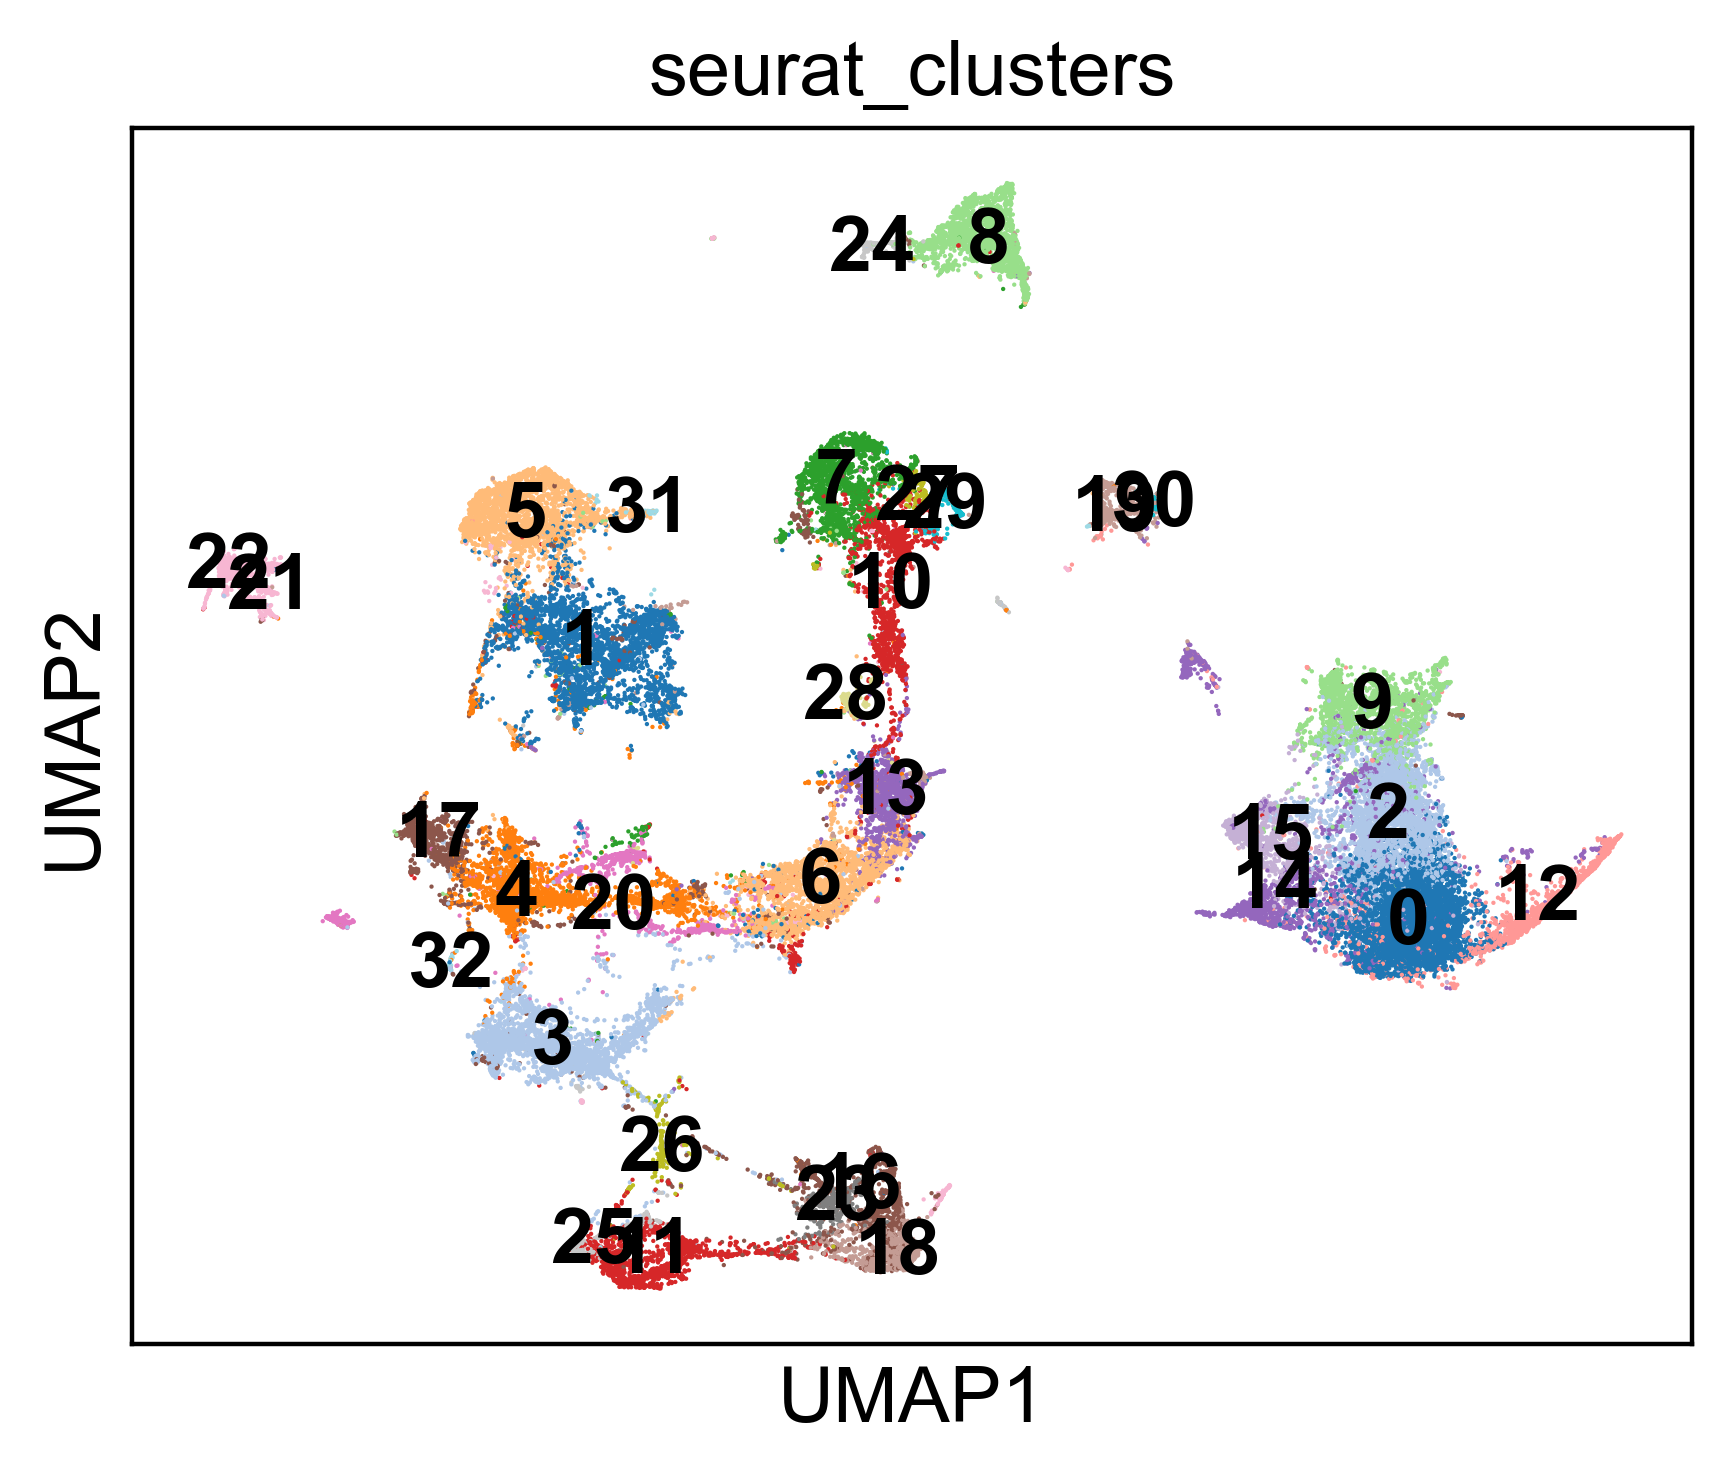

In [170]:
#Visualize clusters
sc.pl.umap(adata, color=['seurat_clusters'],palette='tab20',legend_loc='on data')

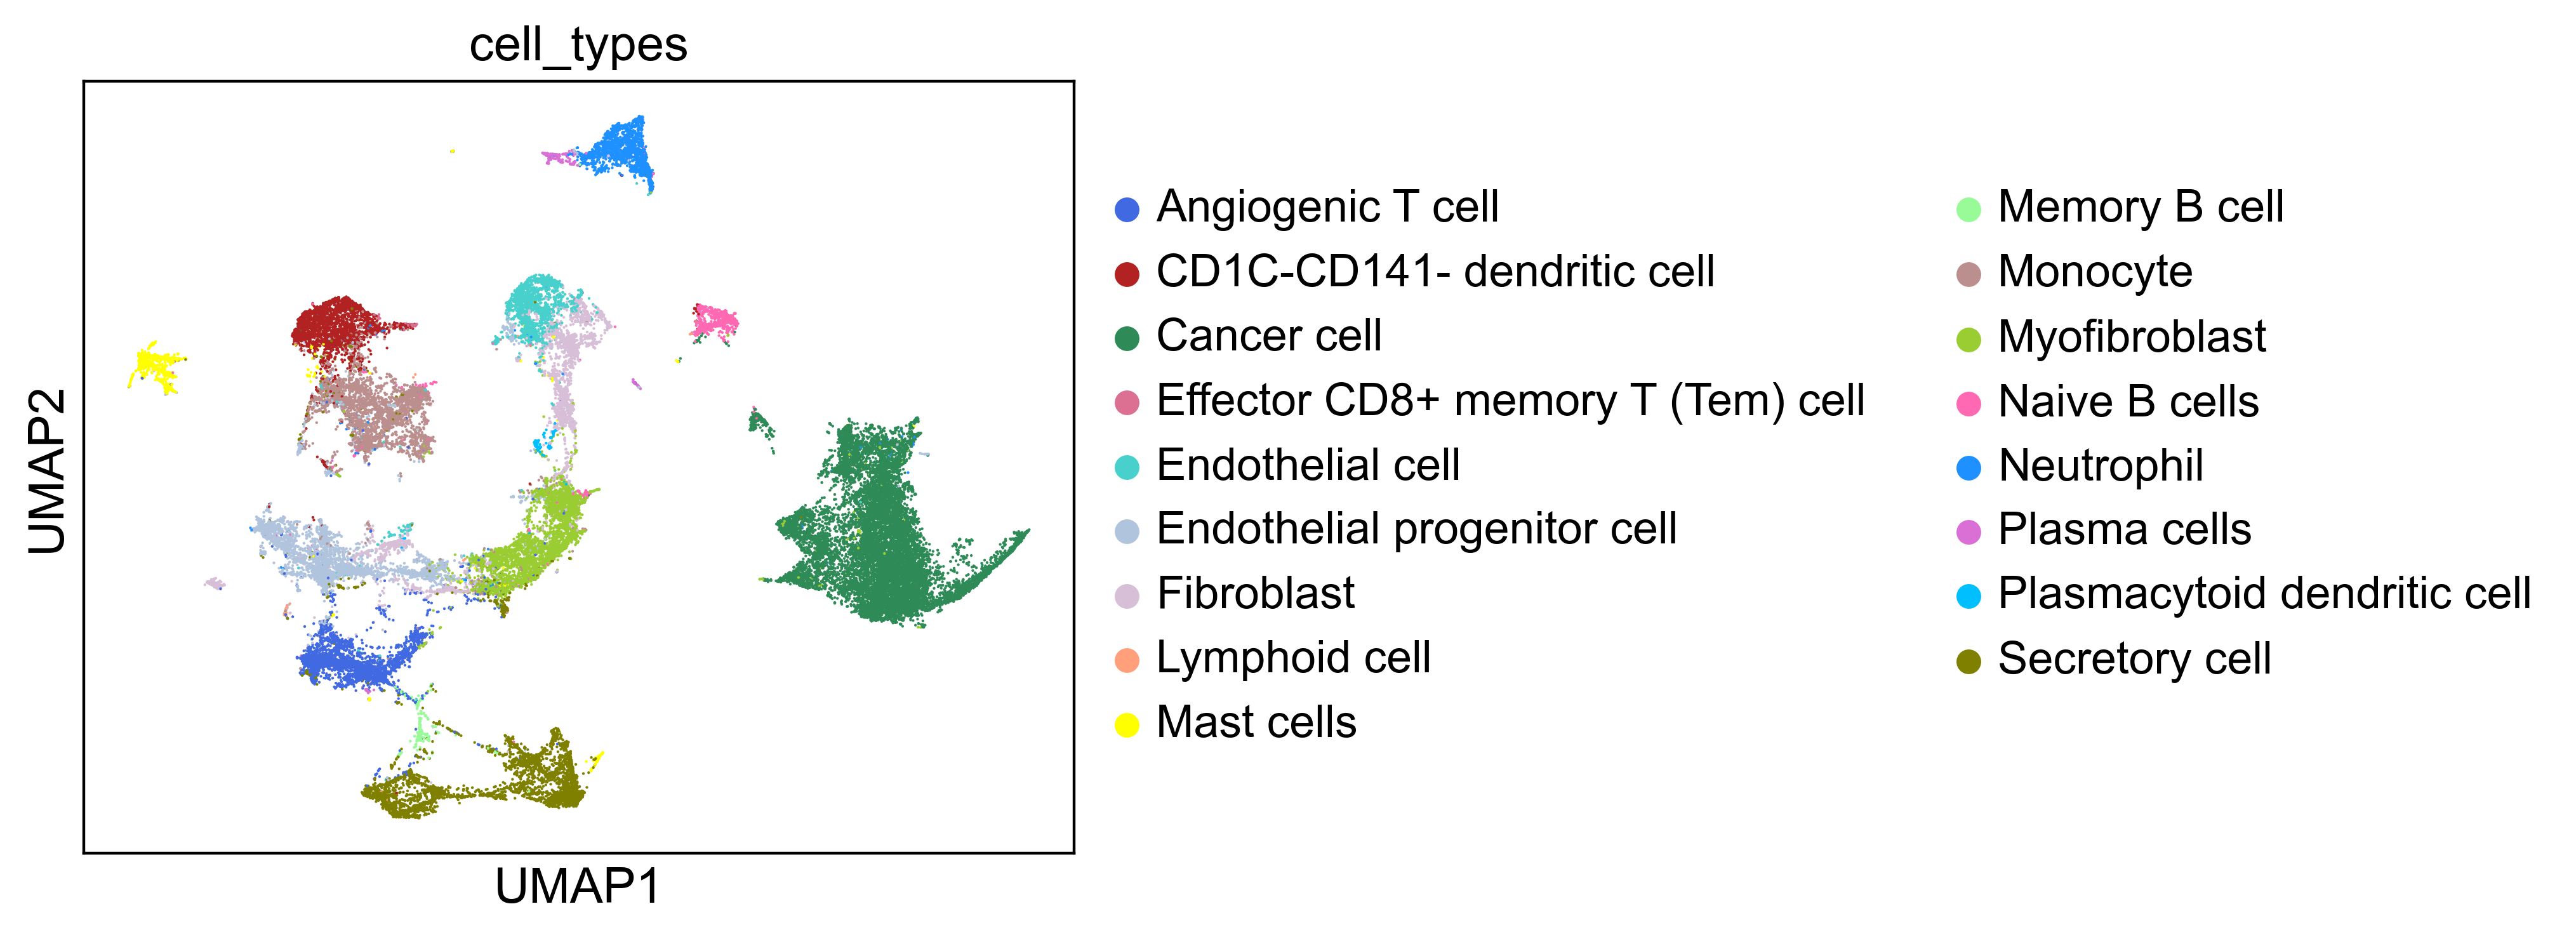

In [171]:
#Visualize cell types
sc.pl.umap(adata, color=['cell_types'],palette=palette)

In [172]:
#Count how many cells we have per cell type
x=adata.obs.cell_types.value_counts()

In [173]:
x

Cancer cell                          14737
Secretory cell                        4826
Endothelial progenitor cell           4366
Myofibroblast                         4362
Monocyte                              3733
Angiogenic T cell                     3256
Fibroblast                            3161
CD1C-CD141- dendritic cell            2974
Endothelial cell                      2268
Neutrophil                            2254
Mast cells                            1486
Naive B cells                         1149
Plasma cells                           341
Memory B cell                          275
Plasmacytoid dendritic cell            196
Effector CD8+ memory T (Tem) cell       99
Lymphoid cell                           85
Name: cell_types, dtype: int64

In [174]:
#create a dataframe
x=pd.DataFrame(x)

In [175]:
x

cell_types
Cancer cell                             14737
Secretory cell                           4826
Endothelial progenitor cell              4366
Myofibroblast                            4362
Monocyte                                 3733
Angiogenic T cell                        3256
Fibroblast                               3161
CD1C-CD141- dendritic cell               2974
Endothelial cell                         2268
Neutrophil                               2254
Mast cells                               1486
Naive B cells                            1149
Plasma cells                              341
Memory B cell                             275
Plasmacytoid dendritic cell               196
Effector CD8+ memory T (Tem) cell          99
Lymphoid cell                              85

In [176]:
adata

AnnData object with n_obs × n_vars = 49568 × 980
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1.5', 'seurat_clusters', 'cellid', 'cell_types'
    var: 'SCT_features', 'features'
    uns: 'seurat_clusters_colors', 'cell_types_colors'
    obsm: 'X_umap'
    layers: 'SCT'

In [177]:
len(adata.obs.index)

49568

In [178]:
#Calculate proportions
x['prop']=(x['cell_types']/len(adata.obs.index))*100

In [179]:
x

cell_types       prop
Cancer cell                             14737  29.730875
Secretory cell                           4826   9.736120
Endothelial progenitor cell              4366   8.808102
Myofibroblast                            4362   8.800032
Monocyte                                 3733   7.531068
Angiogenic T cell                        3256   6.568754
Fibroblast                               3161   6.377098
CD1C-CD141- dendritic cell               2974   5.999839
Endothelial cell                         2268   4.575533
Neutrophil                               2254   4.547289
Mast cells                               1486   2.997902
Naive B cells                            1149   2.318028
Plasma cells                              341   0.687944
Memory B cell                             275   0.554793
Plasmacytoid dendritic cell               196   0.395416
Effector CD8+ memory T (Tem) cell          99   0.199726
Lymphoid cell                              85   0.171482

In [180]:
#Save data to visualize in Tissuumaps
x.to_csv('Celltype-prop.csv')

In [181]:
adata

AnnData object with n_obs × n_vars = 49568 × 980
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1.5', 'seurat_clusters', 'cellid', 'cell_types'
    var: 'SCT_features', 'features'
    uns: 'seurat_clusters_colors', 'cell_types_colors'
    obsm: 'X_umap'
    layers: 'SCT'

In [182]:
adata.write('Celltyping-all.h5ad')